# Julia juypter notebook for TITLE (http://...)

## Ran using Julia 1.6.2

# Basic dynamics plot (determinisitc)

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 1.0 : ones(4)
h(1,0)

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [6]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [7]:
#solve with τ₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [8]:
#solve with τ₁ = 10
τ₁ = 10.0
lags = [τ₁]
prob_panel_b = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2026-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  10.0
   ⋮
 364.2512925952412
 364.3231782533725
 364.39506390388647
 364.466949551544
 364.5388351963451
 364.61072083828964
 364.6826064773777
 364.75449211837014
 364.8263777565061
 364.89826340130713
 364.9701490432517
 365.0
u: 2026-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3

## Panel c

In [9]:
#solve with τ₁ = 50
τ₁ = 50.0
lags = [τ₁]
prob_panel_c = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 61-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 298.81872958596455
 300.0
 305.8328940253516
 310.9484744236442
 317.6921821292129
 324.2785929641402
 331.4271970890849
 338.4450005015858
 345.5349241874984
 352.4408109871918
 359.0814132898404
 365.0
u: 61-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372273145]
 [3.515

## Panel d

In [10]:
#solve with τ₁ = 365
τ₁ = 365.0
lags = [τ₁]
prob_panel_d = DDEProblem(dde_system,u0,h,tspan,p;constant_lags=lags)
sol_panel_d = solve(prob_panel_d,alg)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 35-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658734178686916
   0.6178687107454937
   1.0821047745271066
   1.6841306003991123
   2.4317868938108327
   3.3457984635632845
   4.446346083730195
   5.765250476321567
   7.347365035501882
   9.262303706455713
  11.620621114648774
   ⋮
 112.08121128158379
 133.41601612639033
 159.42186225156118
 191.64642067117916
 234.4977658739547
 269.2358080692991
 285.8424753492777
 301.1547005123996
 317.0853514642827
 333.9599065613273
 351.6206096167115
 365.0
u: 35-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.049937684670211, 500.00059895308914, 228758.1697693897, 0.0015506139550585689]
 [1.2371657460757373, 500.0025892819727, 228758.1667743292, 0.0073924819999076925]
 [1.625830100813976, 500.00581217656213, 228758.15337768738, 0.019676596661356113]
 [2.2977543746170803, 500.00973019024576, 228758.12112892728, 0.04142480372

## Plot

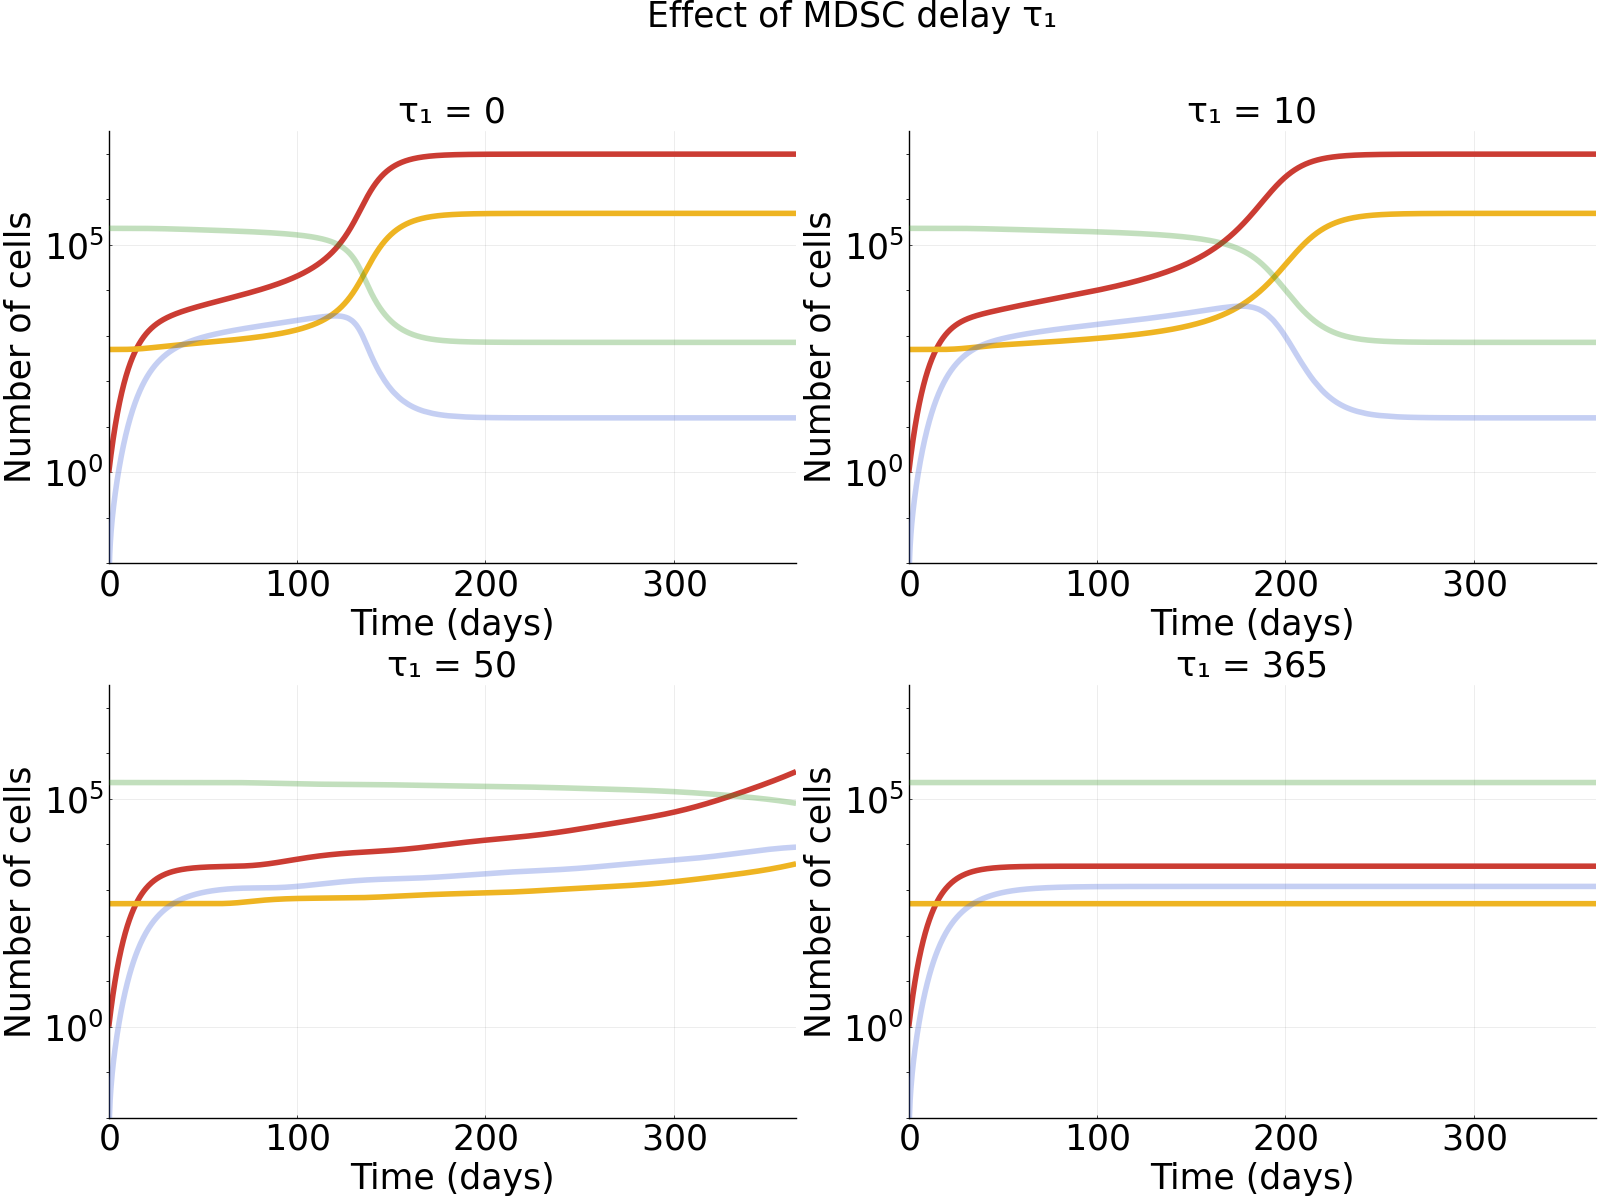

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


In [11]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
d = plot(sol_panel_d, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of MDSC delay τ₁", font = "Ariel",titlefontsize=25)

# G calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [2]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [3]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel a

In [4]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [5]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.8111559703245904

In [6]:
#solve with α₁₁ = 0
prob_panel_a = ODEProblem(ode_system,u0,tspan,p)
sol_panel_a = solve(prob_panel_a,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 445-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 187.9672031342375
 190.03999794557305
 192.9080599208194
 196.63918381898029
 201.59464423824605
 208.01413758737382
 216.52337407060975
 227.97513152798126
 244.3682518224029
 270.40390772927594
 323.1263863026601
 365.0
u: 445-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044955, 500.00288952088306, 228758.16653464, 0.00739247487097743]
 [1.625829025487545, 500.0075401967587, 228758.15023991073, 0.01967656172997377]
 [2.2977508055193923, 500.01551776993205, 228758.10325701066, 0.041424678823349784

## Panel b

In [7]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.81 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [8]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.0011559703245903608

In [9]:
#solve with α₁₁ = 0.81
prob_panel_b = ODEProblem(ode_system,u0,tspan,p)
sol_panel_b = solve(prob_panel_b,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 27-element Vector{Float64}:
   0.0
   0.06026319071061688
   0.6628950978167857
   2.6285563507918503
   5.9785643229107155
  10.373675099044792
  16.109939551683464
  23.215565882237463
  31.90797313693023
  42.32397405057573
  54.75053510371529
  69.53931614400449
  87.26506215695187
   ⋮
 169.37694402698244
 207.9560365954279
 224.99819092286128
 240.47382121311344
 256.3865307300418
 273.1677958174278
 290.7235835507921
 308.6951866908537
 326.70314494188835
 344.52985076279094
 362.1413674356732
 365.0
u: 27-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0000694553955596, 500.0005990356662, 228758.1697693517, 0.001513285657960967]
 [1.000741729712397, 500.0062106922454, 228758.15094540018, 0.016305754896854163]
 [1.0026763266292371, 500.02047415842446, 228757.91672691298, 0.060501600607488285]
 [1.0052223250076056, 500.0349925073917, 228757.16607628966, 0.12330240840409104]
 [1.0

## Panel c

In [10]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 1.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [11]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

-0.18884402967540959

In [12]:
#solve with α₁₁ = 1.0
prob_panel_c = ODEProblem(ode_system,u0,tspan,p)
sol_panel_c = solve(prob_panel_c,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 32-element Vector{Float64}:
   0.0
   0.06026285200529721
   0.3944160223209874
   1.078806968028187
   2.0557432958986555
   3.337174330481057
   5.001938595430361
   7.095683273187781
   9.703612466765511
  12.904649021266206
  16.800268473726167
  21.502002041122203
  27.13381760282179
   ⋮
 137.88449346412898
 167.86024977581516
 206.66432488902862
 239.00781590327495
 256.236104148281
 271.9554932962574
 287.7578627320467
 304.2223382184734
 321.46307402630424
 339.2576101320652
 357.24988365522677
 365.0
u: 32-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [0.9887180655940915, 500.0005956158799, 228758.1697699825, 0.001504657762530663]
 [0.9295698153294281, 500.00365479194215, 228758.1632240973, 0.009436322127571218]
 [0.8243815042201627, 500.00877832044097, 228758.12453758088, 0.02370693382645528]
 [0.704046843869449, 500.0139620361686, 228758.02670666427, 0.04022150305314154]
 [0

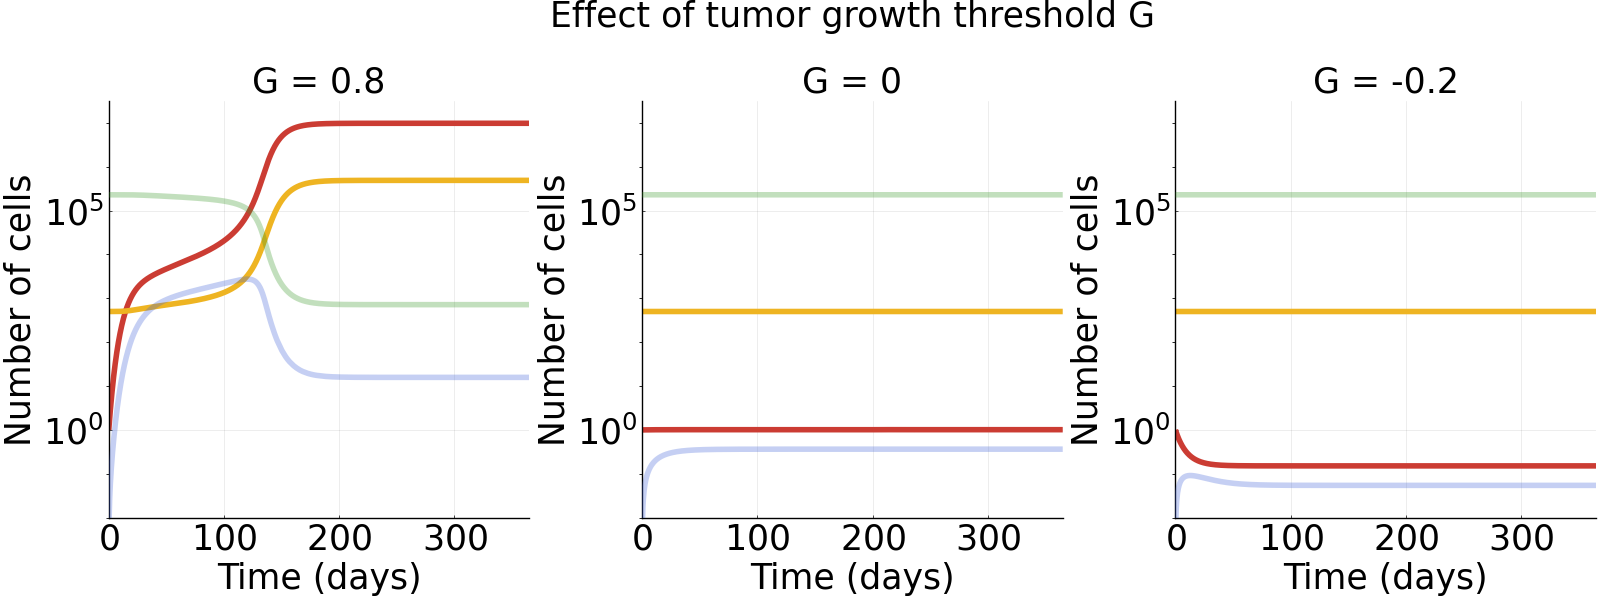

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


In [13]:
#plot results
l = @layout [a b c]
logocolors = Colors.JULIA_LOGO_COLORS
a = plot(sol_panel_a, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0.8",titlefontsize=25)
b = plot(sol_panel_b, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = 0",titlefontsize=25)
c = plot(sol_panel_c, lw = 4, yaxis=:log,size =(1600/3,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "G = -0.2",titlefontsize=25)
plot(a, b, c, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of tumor growth threshold G", font = "Ariel",titlefontsize=25)

# α₁₄ calculations

In [1]:
using DifferentialEquations
using Plots; pyplot()

Plots.PyPlotBackend()

In [44]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK #- β₁*NK*C 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T #- β₂*T*C
end

ode_system (generic function with 1 method)

In [45]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

## Panel e

In [46]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 303030.303030303
      0.0

In [47]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

0.5512035044897718

In [48]:
#solve with α₁₄ = 10⁻⁵
prob_panel_e = ODEProblem(ode_system,u0,tspan,p)
sol_panel_e = solve(prob_panel_e,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 34-element Vector{Float64}:
   0.0
   0.051937098115968826
   0.30114101634968166
   0.7941046672564865
   1.4933753240851284
   2.404452231851278
   3.5813180079056517
   5.069989759581608
   6.958171568649835
   9.376803851708914
  12.554206696876376
  17.074689464150353
  22.21975441947014
   ⋮
 160.5998736111142
 188.22633322162935
 205.79225135578923
 221.8954170745583
 238.07884607159136
 254.87881496294216
 272.3612387925267
 290.3035518623868
 308.39071006811736
 326.391405297754
 362.05106885829866
 365.0
u: 34-element Vector{Vector{Float64}}:
 [1.0, 500.0, 303030.303030303, 0.0]
 [1.0289652611841003, 500.0005241495828, 303030.30298921507, 0.001753038701961103]
 [1.1776436848819132, 500.00317893783176, 303030.3016124757, 0.010798732159090876]
 [1.523156500678104, 500.0092050581452, 303030.29261872265, 0.032163331612730627]
 [2.1482179395989767, 500.01993749141224, 303030.2630047568, 0.07211865414883481]

## Panel f

In [49]:
#set model parameters
n = 1.0

α₁ = 100.0 #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = (10.0^(-4.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate


γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 153508.77192982458
      0.0

In [50]:
#calculate growth condition G
growthcondition = α₇*log(α₈)-α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁

1.0745288633414463

In [51]:
#solve with α₁₄ = 10⁻⁴
prob_panel_f = ODEProblem(ode_system,u0,tspan,p)
sol_panel_f = solve(prob_panel_f,alg)

retcode: Success
Interpolation: automatic order switching interpolation
t: 117-element Vector{Float64}:
   0.0
   0.06518436440266683
   0.24648639916779402
   0.5287362306876748
   0.8837445469302025
   1.342545751479067
   1.8995929038201353
   2.5693983158460028
   3.3572241699367433
   4.276233391031249
   5.341080524532108
   6.573844974972305
   8.005273126873185
   ⋮
  88.07722582241064
  91.44466232621272
  95.51469598620972
 100.50929388375064
 106.77585776256481
 114.78699507982853
 125.34462353638523
 139.99187601808302
 162.3574422916657
 203.87447787513346
 355.98752742947227
 365.0
u: 117-element Vector{Vector{Float64}}:
 [1.0, 500.0, 153508.77192982458, 0.0]
 [1.0723094558498782, 500.0006708312075, 153508.7715980509, 0.0011375101049276245]
 [1.299031812723971, 500.0027534611287, 153508.7669467486, 0.004720865766016991]
 [1.7391278305152789, 500.0067503527972, 153508.74707249834, 0.01175535220447616]
 [2.481486435547817, 500.01346701584686, 153508.6945236708, 0.0238536385

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/utils.jl:95


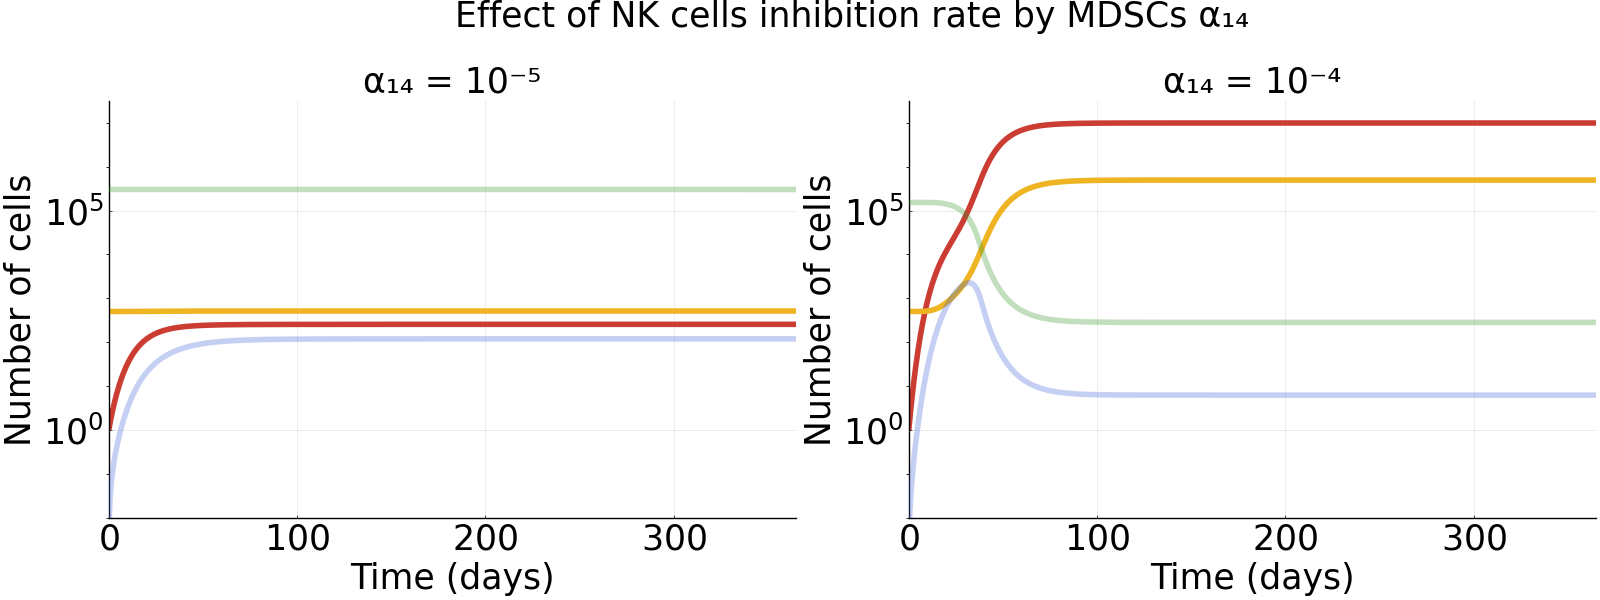

In [55]:
#plot results
l = @layout [e f]
logocolors = Colors.JULIA_LOGO_COLORS
e = plot(sol_panel_e, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁵",titlefontsize=25)
f = plot(sol_panel_f, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "α₁₄ = 10⁻⁴",titlefontsize=25)
plot(e, f, layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Effect of NK cells inhibition rate by MDSCs α₁₄", font = "Ariel",titlefontsize=25)

# Morris global sensitivity analysis

In [1]:
using DiffEqSensitivity
using Statistics
using DiffEqCallbacks
using DifferentialEquations
using Plots; pyplot()
import Random

In [2]:
#define condition for simulation to end
function condition(u,t,integrator) 
  u[1] < 0.001 || u[2] < 0 || u[3] < 0 || u[4] < 0
end
floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [3]:
#define model without delay
function model(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end


n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate 
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃)
tspan = (0.0,1000.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]
prob = ODEProblem(model,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 1000.0)
u0: 4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

In [4]:
#set up function for sensitivity analysis
f = function (p)
  prob_func(prob,i,repeat) = remake(prob;p=p[:,i])
  ensemble_prob = EnsembleProblem(prob,prob_func=prob_func)
  sol = solve(ensemble_prob,DynamicSS(Tsit5()),maxiters=10^8,callback=floor_event,EnsembleThreads(),trajectories=size(p,2))
  out = zeros(2,size(p,2))
  for i in 1:size(p,2)
    out[1,i] = last(sol[i][1,:])
    out[2,i] = maximum(sol[i][1,:])
  end
  out
end

#1 (generic function with 1 method)

In [5]:
#perform sensitivity analysis (with set random seed for reproducibility)
Random.seed!(1212)
m = gsa(f,Morris(total_num_trajectory=1000,num_trajectory=100),[[0.0,10.0^(3.0)],[10.0^(7.0),10.0^(9.0)],[0.0,1.0],[10.0^(-2.0),5*10.0^(-1.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(-7.0),10.0^(-6.0)],[10.0^(-7.0),10.0^(-6.0)],[0.0,0.1],[10.0^(3.0),10.0^(5.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-5.0),10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(-7.0),10.0^(-6.0)],[5*10.0^(-2.0),10.0^(-1.0)],[5*10.0^(-5.0),5*10.0^(-4.0)],[10.0^(-2.0),10.0^(-1.0)],[10.0^(9.0),10.0^(11.0)],[10.0^(6.0),10.0^(8.0)],[10.0^(6.0),10.0^(8.0)]],batch=true)

┌ Warning: Global Sensitivity Analysis has been moved to separate package GlobalSensitivity.jl (https://github.com/SciML/GlobalSensitivity.jl)
└ @ DiffEqSensitivity /Users/jessekreger/.julia/packages/DiffEqSensitivity/eq2wv/src/DiffEqSensitivity.jl:72


GlobalSensitivity.MorrisResult{Matrix{Float64}, Vector{Any}}([103.8344696972894 0.0827234381305023 … 3.43520352514367e-12 3.864730468167913e-12; 23.99386085502517 0.07978665228079046 … -6.538736768136621e-11 1.763852828175646e-10], [103.8344696972894 0.0827234381305023 … 3.5575649834085354e-12 5.020748309829591e-12; 24.00262445135873 0.07978665228079046 … 2.0523419684445813e-10 3.756531700540055e-10], [395551.26973389264 0.18519426437397224 … 2.9741082793698587e-22 3.3041444666551567e-22; 13191.366782654715 0.18509742400401089 … 2.5567647335860817e-19 1.316709347296986e-18], Any[[[0.00122219789028167, 0.0012214294876903224], [11.420257052578092, 11.738437334429536], [0.02151705019176006, 0.006817683063447474], [0.02113438016921281, 0.017145777314901346], [0.0314140431135891, 0.03326208841055612], [0.03141372667998092, 0.033653234280646024], [0.3243185933902859, 0.2085295208394527], [0.6330489314608274, 0.645588459972292], [0.0003285761028528231, 0.0003285735212266463], [0.0002791138049

In [6]:
#sensitivity analysis values
m.means

2×19 Matrix{Float64}:
 103.834   0.0827234  -2.78136e6  6.98486e7  …   3.4352e-12   3.86473e-12
  23.9939  0.0797867  -2.7827e6   6.9854e7      -6.53874e-11  1.76385e-10

In [7]:
#sensitivity analysis values
means1 = m.means[1,:]

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
    -2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
    -3.827662636775198e11
    -2.508288726318143e11
    -1.948159310844262e8
   -11.616760749003136
   -11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
    -6.598099691387153e11
    -4.11374612215201
     6.603439419340407e8
 26002.62770892652
    -9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [8]:
#sensitivity analysis values
means2 = m.means[2,:]

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
    -2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
    -3.905575324244998e11
    -1.7302749621476126e11
    -1.9479733474026015e8
   -11.613518093310768
   -11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
    -6.616862226515463e11
    -5.139156942357431
     4.293746076578792e8
 26058.330557225483
    -9.518827315020692e-6
    -6.538736768136621e-11
     1.763852828175646e-10

In [9]:
#sensitivity analysis values
m.variances

2×19 Matrix{Float64}:
     3.95551e5  0.185194  7.63618e13  1.61362e16  …  2.97411e-22  3.30414e-22
 13191.4        0.185097  7.63527e13  1.61354e16     2.55676e-19  1.31671e-18

In [10]:
#using absolute value for plotting
for i = 1:length(means1)
   means1[i] = abs(means1[i]) 
   means2[i] = abs(means2[i]) 
end

In [11]:
#sensitivity analysis values
means1

19-element Vector{Float64}:
   103.8344696972894
     0.0827234381305023
     2.781361929210716e6
     6.984862308510308e7
     0.6295350447383077
     3.827662636775198e11
     2.508288726318143e11
     1.948159310844262e8
    11.616760749003136
    11.916890272520474
     1.5450483612850195e10
     1.02022025334263e7
     6.598099691387153e11
     4.11374612215201
     6.603439419340407e8
 26002.62770892652
     9.691851005675228e-6
     3.43520352514367e-12
     3.864730468167913e-12

In [12]:
#sensitivity analysis values
means2

19-element Vector{Float64}:
    23.99386085502517
     0.07978665228079046
     2.7827002064856687e6
     6.98540132622206e7
     0.6295622309949296
     3.905575324244998e11
     1.7302749621476126e11
     1.9479733474026015e8
    11.613518093310768
    11.462813290549066
     1.5450344489022335e10
     1.020969971758107e7
     6.616862226515463e11
     5.139156942357431
     4.293746076578792e8
 26058.330557225483
     9.518827315020692e-6
     6.538736768136621e-11
     1.763852828175646e-10

┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots /Users/jessekreger/.julia/packages/Plots/S30zV/src/args.jl:1617


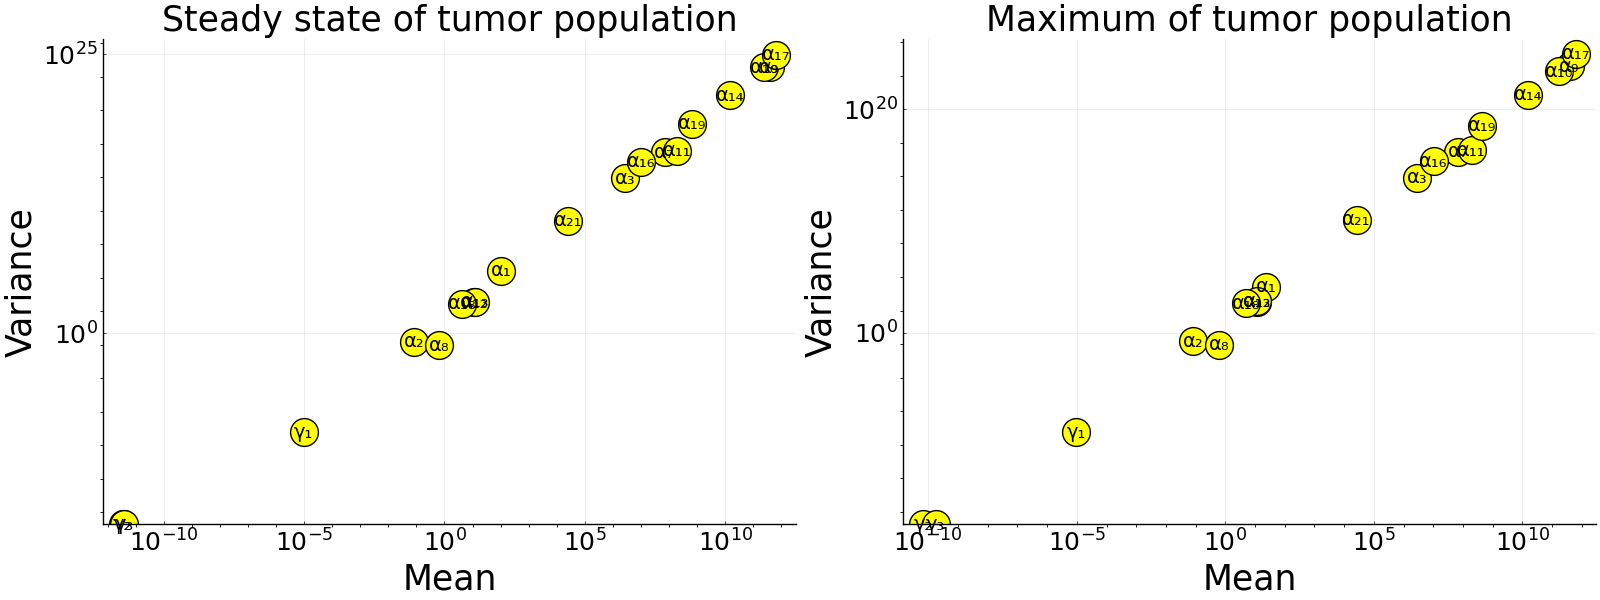

In [13]:
#plot results
l = @layout [a b]
plot1 = scatter(means1, m.variances[1,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],seriescolor=[:yellow :red :green],xscale=:log,yscale=:log,markersize=20,legend=false, title = "Steady state of tumor population", xlabel = "Mean", ylabel = "Variance")
plot2 = scatter(means2, m.variances[2,:],series_annotations=[:α₁,:α₂,:α₃,:α₇,:α₈,:α₉,:α₁₀,:α₁₁,:α₁₂,:α₁₃,:α₁₄,:α₁₆,:α₁₇,:α₁₈,:α₁₉,:α₂₁,:γ₁,:γ₂,:γ₃],color=:yellow,xscale=:log,yscale=:log,markersize=20,legend=false, title = "Maximum of tumor population", xlabel = "Mean", ylabel = "Variance")
plot(plot1, plot2, layout = l,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25))

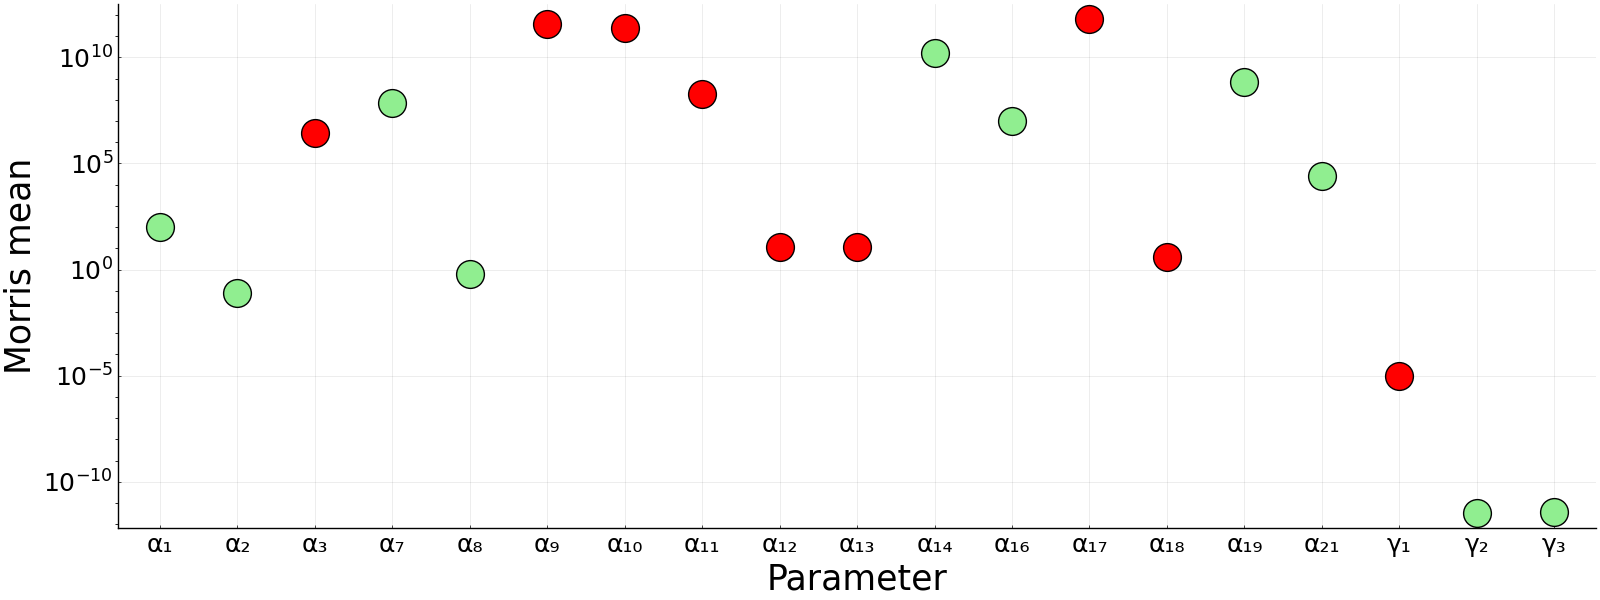

In [15]:
#plot results
plot_justmean = scatter(["α₁","α₂","α₃","α₇","α₈","α₉","α₁₀","α₁₁","α₁₂","α₁₃","α₁₄","α₁₆","α₁₇","α₁₈","α₁₉","α₂₁","γ₁","γ₂","γ₃"],means1,color=[:lightgreen, :lightgreen, :red, :lightgreen, :lightgreen, :red, :red, :red, :red, :red, :lightgreen, :lightgreen, :red, :red, :lightgreen, :lightgreen, :red, :lightgreen, :lightgreen],yscale=:log10,markersize=20,legend=false, title = "", xlabel = "Parameter", ylabel = "Morris mean") #mean of tumor population
plot(plot_justmean,size =(1600,600),xtickfont=font(18),ytickfont=font(18),guidefont=font(25),legendfont=font(25),titlefont=font(25), xticks = :all)

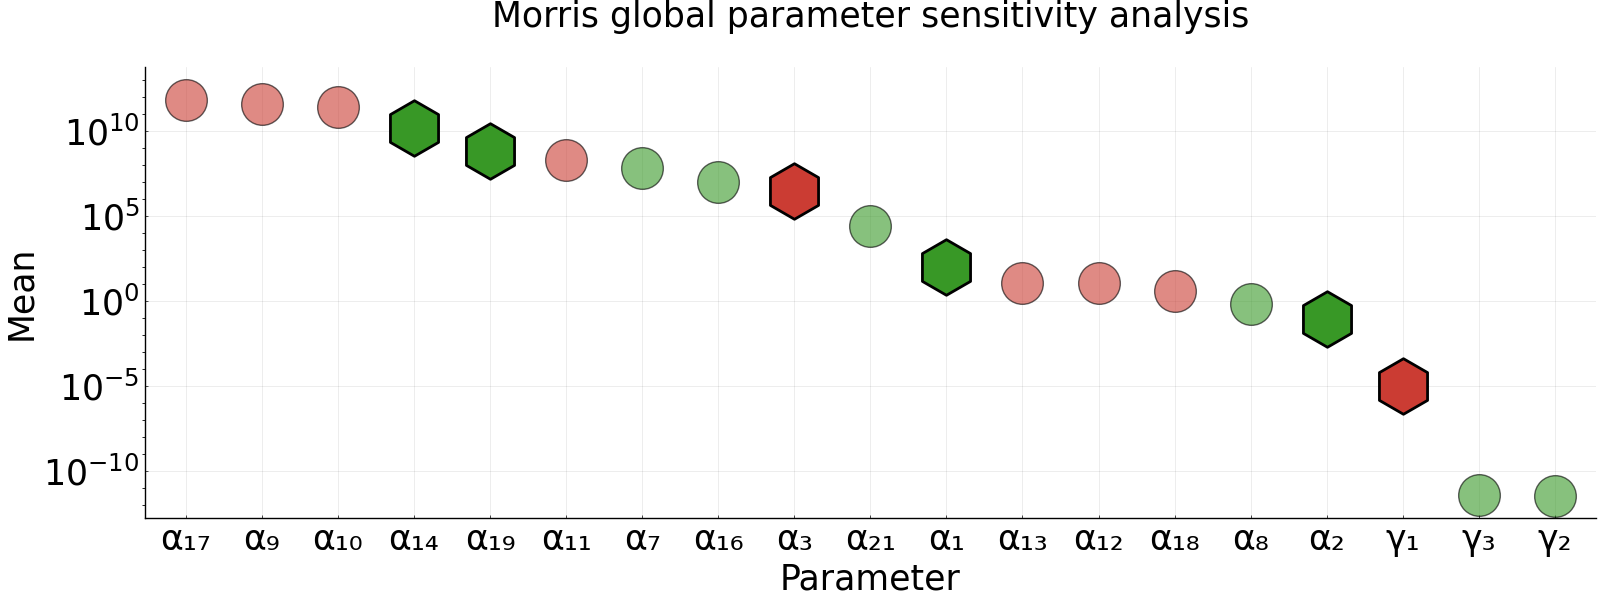

In [71]:
#plot results
vector_1 = ["α₁₇", "α₉", "α₁₀", "α₁₄", "α₁₉", "α₁₁", "α₇", "α₁₆", "α₃", "α₂₁", "α₁", "α₁₃", "α₁₂", "α₁₈", "α₈", "α₂", "γ₁", "γ₃", "γ₂"]
vector_2 = [6.60E+11,3.83E+11,2.51E+11,1.55E+10,6.60E+08,1.95E+08,6.98E+07,1.02E+07,2.78E+06,26002.62771,103.8344697,11.91689027,11.61676075,4.113746122,0.629535045,0.082723438,9.69E-06,3.86E-12,3.44E-12]

non_MDSC_size = 30
MDSC_size = 40

non_MDSC_alpha = 0.6
MDSC_alpha = 1

non_MDSC_strokewidth = 1
MDSC_strokewidth = 2

color_positive = [95,177,42]
color_negative = [226,58,52]

logocolors = Colors.JULIA_LOGO_COLORS

vector_size = [non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,non_MDSC_size,MDSC_size,MDSC_size,non_MDSC_size,non_MDSC_size]
vector_alpha = [non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha,MDSC_alpha,MDSC_alpha,non_MDSC_alpha,non_MDSC_alpha]
vector_color = [logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.red, logocolors.red, logocolors.green, logocolors.green, logocolors.red, logocolors.green, logocolors.green]
vector_strokewidth = [non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth,MDSC_strokewidth,MDSC_strokewidth,non_MDSC_strokewidth,non_MDSC_strokewidth]
vector_shape = [:circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle, :circle, :hexagon, :circle, :hexagon, :circle, :circle, :circle, :circle, :hexagon, :hexagon, :circle, :circle]

plot_justmean = scatter(vector_1,vector_2,color=vector_color,yscale=:log10,markersize=vector_size, alpha = vector_alpha, markerstrokewidth = vector_strokewidth, markershape = vector_shape, legend=false, title = "", xlabel = "Parameter", ylabel = "Mean", ylims = [10^(-12), 10^13])
plot(plot_justmean,size =(1600,600),font = "Ariel",xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25),xticks = :all,plot_title="Morris global parameter sensitivity analysis",titlefontsize=25)

# Basic dynamics stochastic successful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics
import Random

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 2.0 : ones(4).+ 1
h(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [6]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [7]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1.0
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

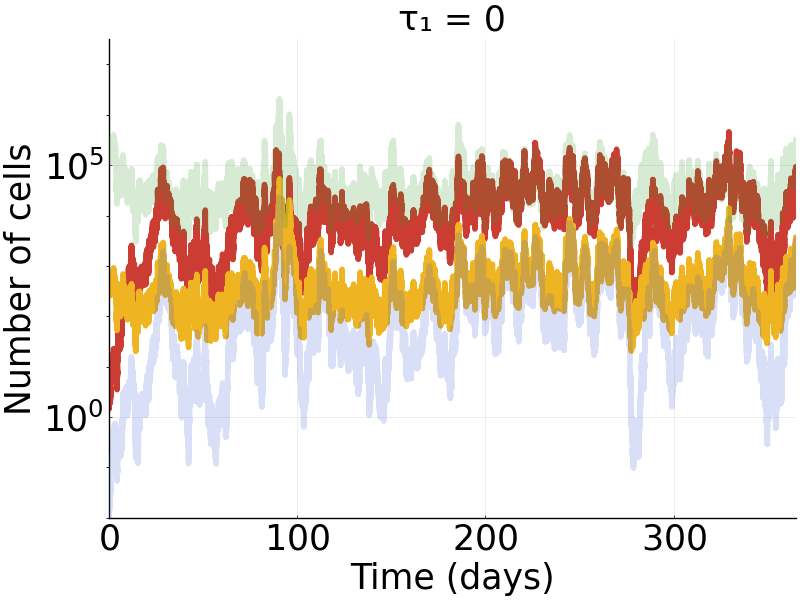

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


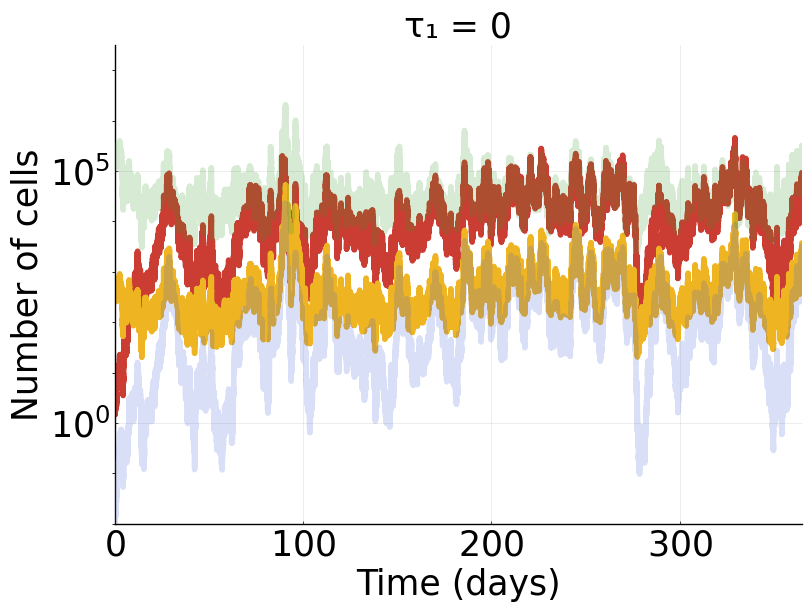

100.0
13917.114726692322

In [9]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
sol = solve(prob_nodelay,SOSRI(),callback=floor_event)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    a = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

    display(a)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    display(plot1)
end
    
print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


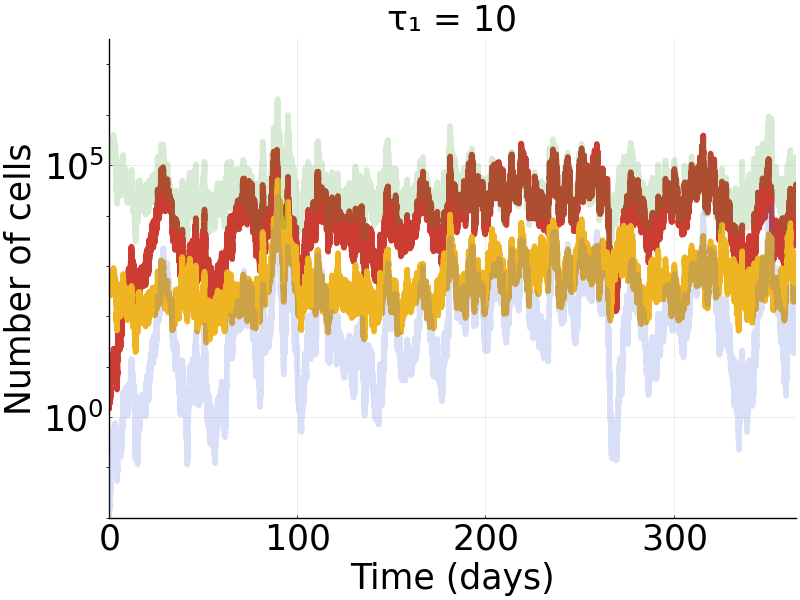

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


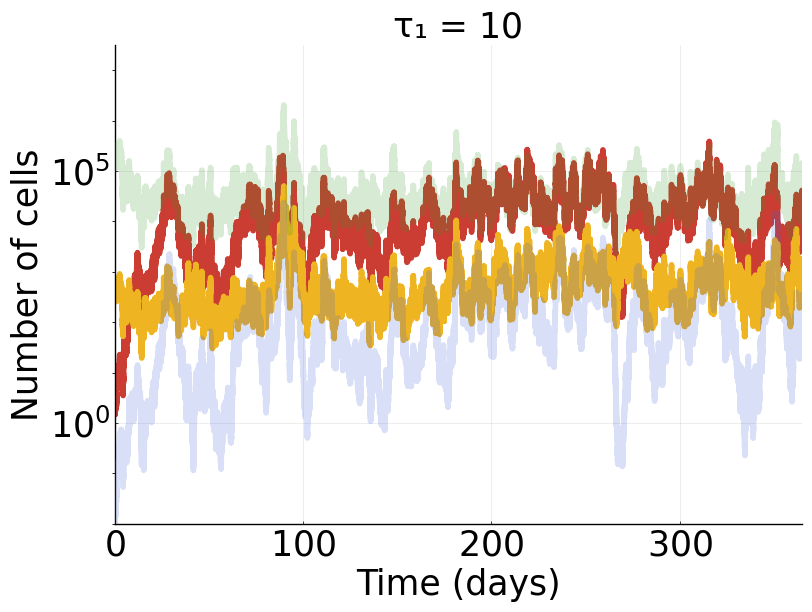

100.0
13841.3649855231

In [10]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1236)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
    
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    b = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

    display(b)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
    display(plot1)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


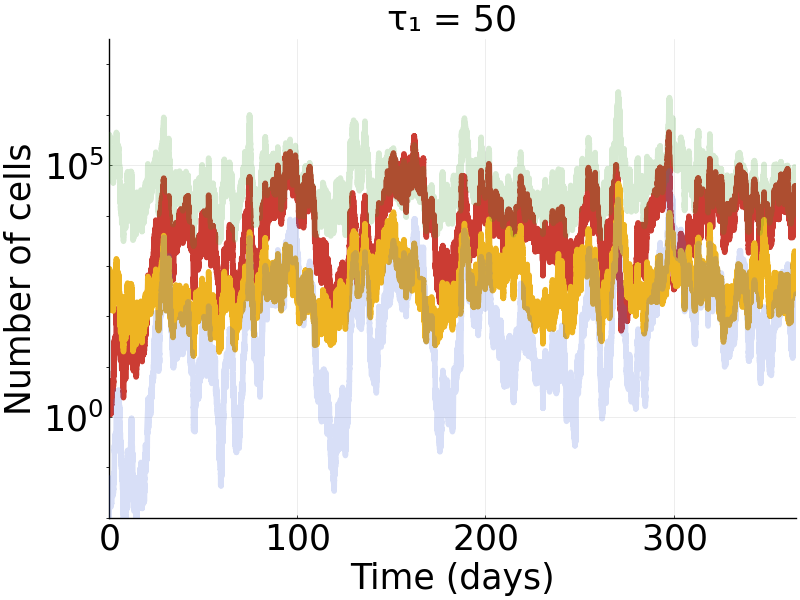

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


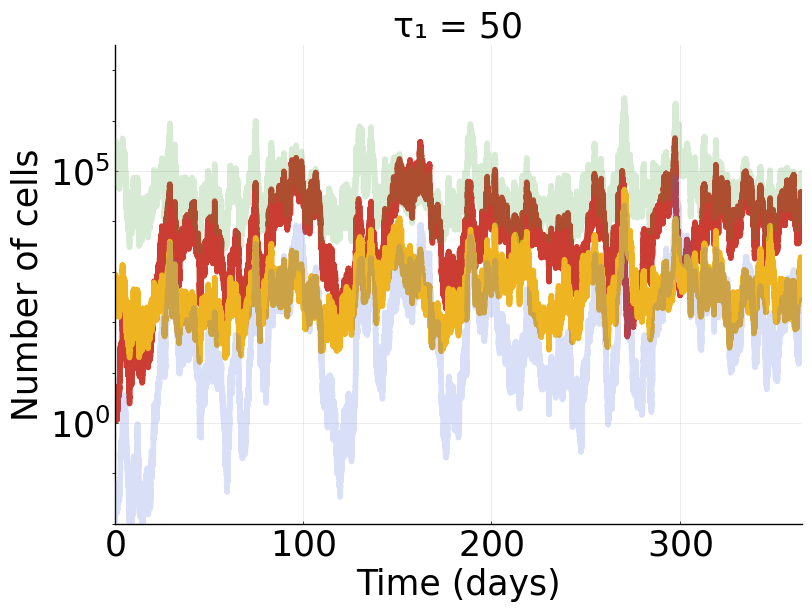

100.0
10707.268745950272

In [11]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    c = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

    display(c)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
    display(plot1)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


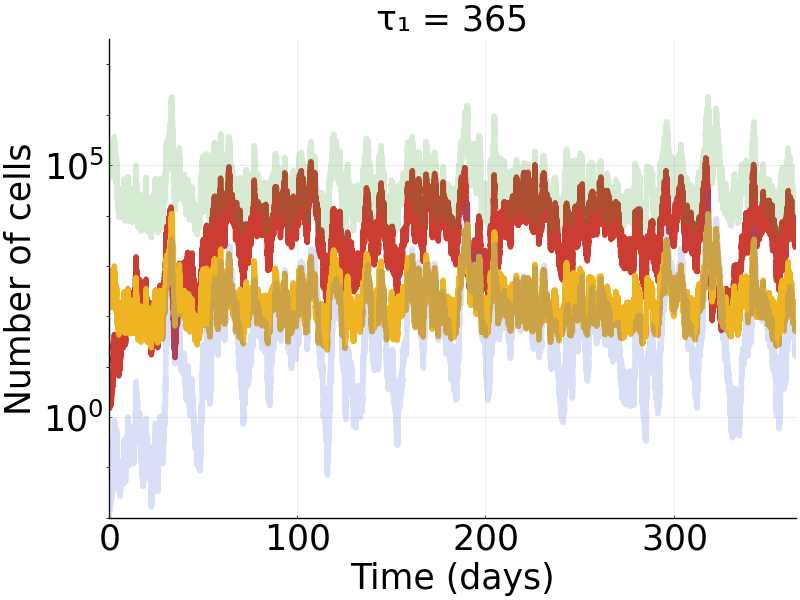

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


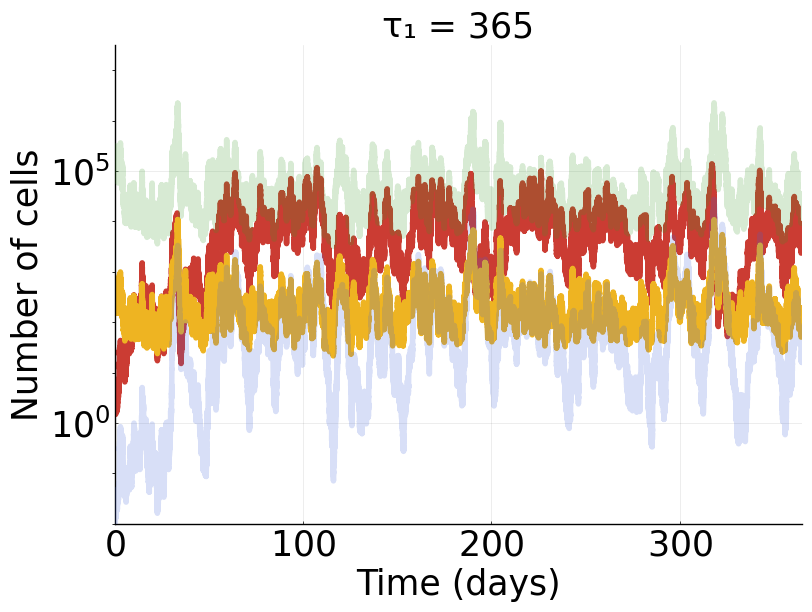

100.0
7103.147271711539

In [12]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1244)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
 
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    d = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

    display(d)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end
    plot1 = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
    display(plot1)
end


print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


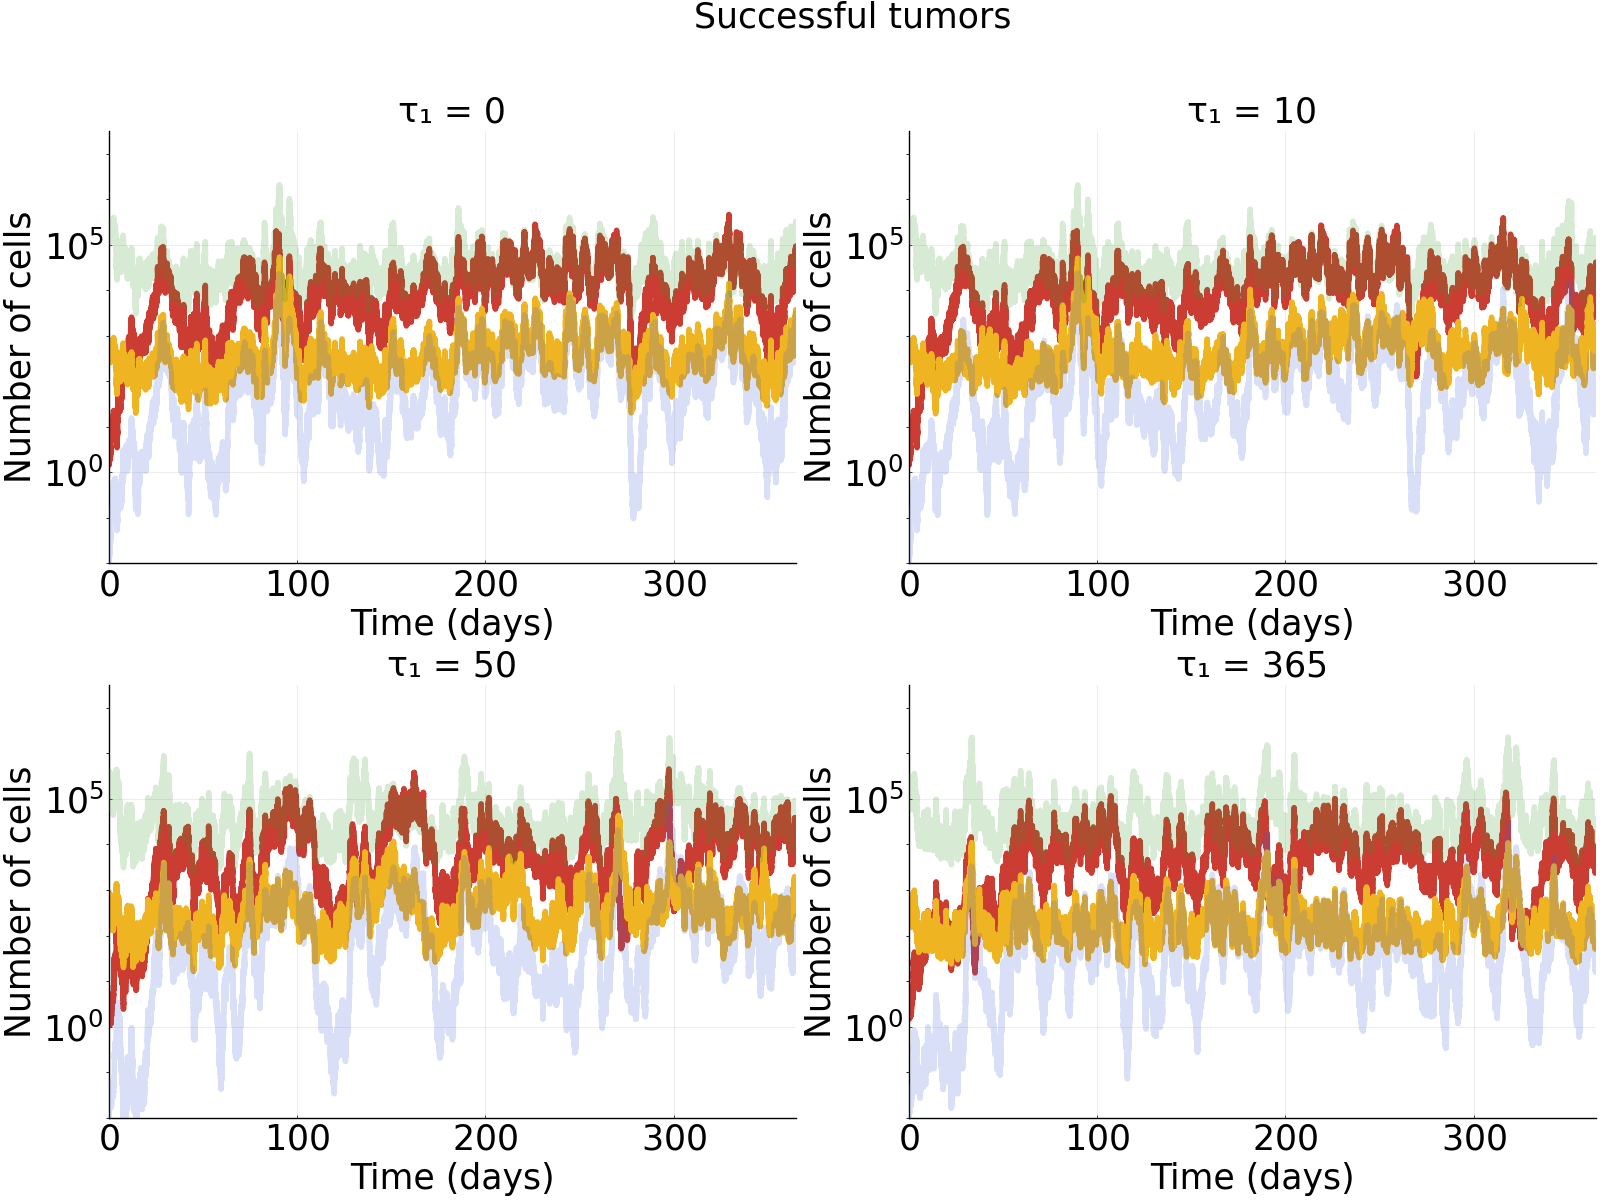

In [13]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Successful tumors", font = "Ariel",titlefontsize=25)

# Basic dynamics stochastic unsuccessful tumors

In [1]:
using DifferentialEquations
using Plots; pyplot()
using StochasticDelayDiffEq
using DiffEqCallbacks
using Statistics 
import Random

In [2]:
#define model with delay
function dde_system(du,u,h,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
    histC_MDSC = h(p, t-τ₁; idxs=1)
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*histC_MDSC/(γ₁+(histC_MDSC^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T
end

dde_system (generic function with 1 method)

In [3]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁ = p
   
# Cancer cells (tumor)
    du[1] = dC = α₇*C*log(α₈/C) - α₉*C*NK - α₁₀*C*T - α₁₁*C
 # MDSC 
    du[2] = dMₘ = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = dNK = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK
 # T cells
    du[4] = dT = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [4]:
#define initial number of tumor cells for delay model
h(p, t; idxs=nothing) = typeof(idxs) <: Number ? 2.0 : ones(4).+ 1
h(1,0)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [5]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁)
tspan = (0.0,365.0)
u0 = [2.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      2.0
    500.0
 228758.1699346405
      0.0

In [6]:
#define stochastic noise
W = WienerProcess(0.0,0.0,0.0)

function σfunction(du,u,h,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

function σfunction_nodelay(du,u,p,t)
  du[1] = u[1]
  du[2] = u[2]
  du[3] = u[3]
  du[4] = u[4]
end

σfunction_nodelay (generic function with 1 method)

In [28]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] < 1.0
end

function floor_aff!(integrator)
    integrator.u[1]=1.0
end

function terminate_affect!(integrator)
    terminate!(integrator)
end

floor_event = DiscreteCallback(condition, terminate!)
floor_event2 = DiscreteCallback(condition, floor_aff!)

DiscreteCallback{typeof(condition), typeof(floor_aff!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, floor_aff!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

## Panel a

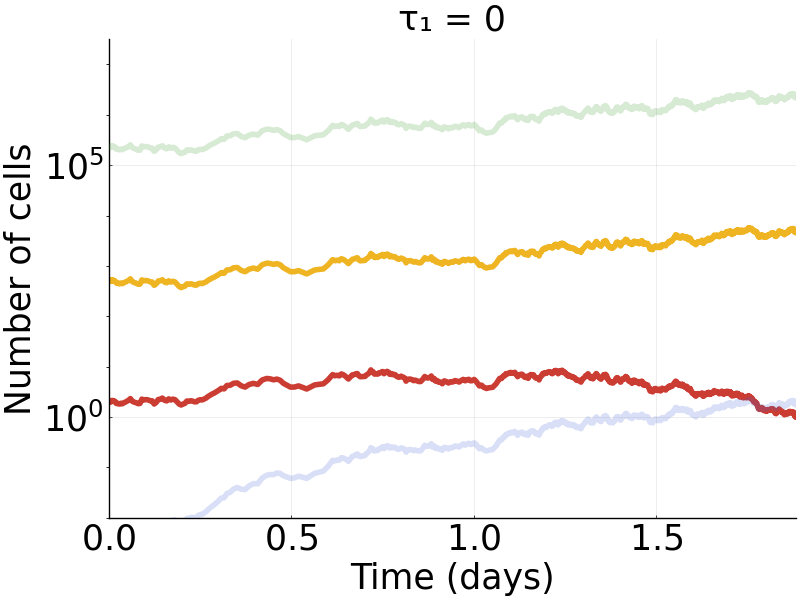

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


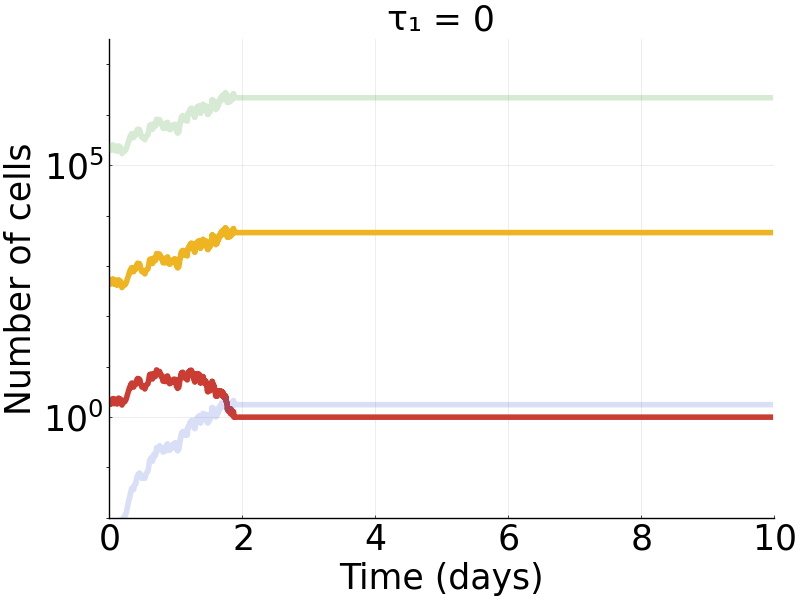

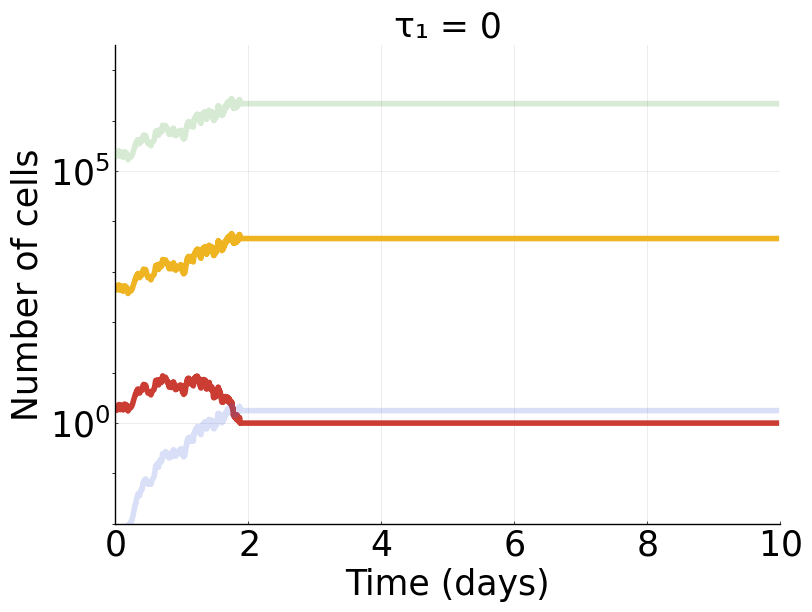

0.0
NaN

In [29]:
#solve with τ₁ = 0 (with set random seed for reproducibility)
runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1234)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob_nodelay = SDEProblem(ode_system,σfunction_nodelay,u0,tspan,p,noise=W)
sol = solve(prob_nodelay,SOSRI(),callback=floor_event)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    for i in sol.t[BB]:0.1:10.0
        push!(sol.t,i)
        push!(sol,sol[:,BB])
    end

    a = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    a_extended = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 0",titlefontsize=25)
    display(a)
    display(a_extended)
end
    
print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel b

10.0


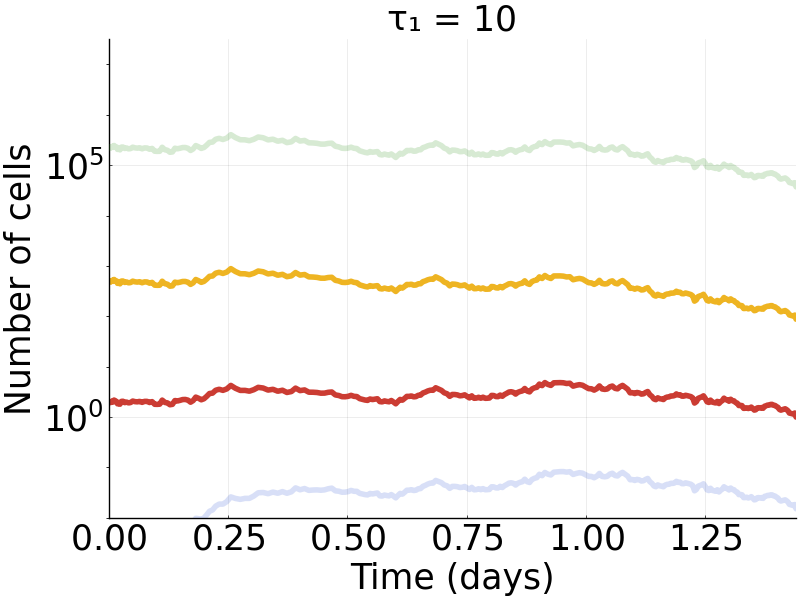

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


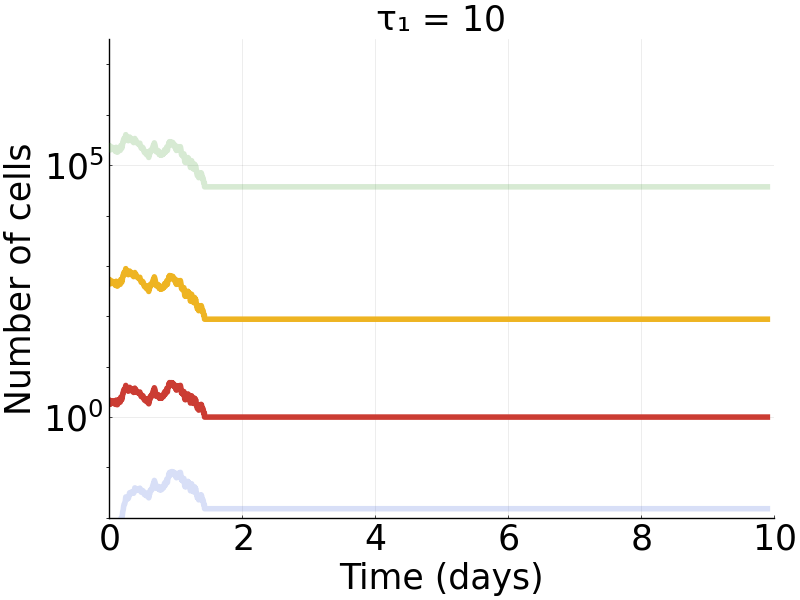

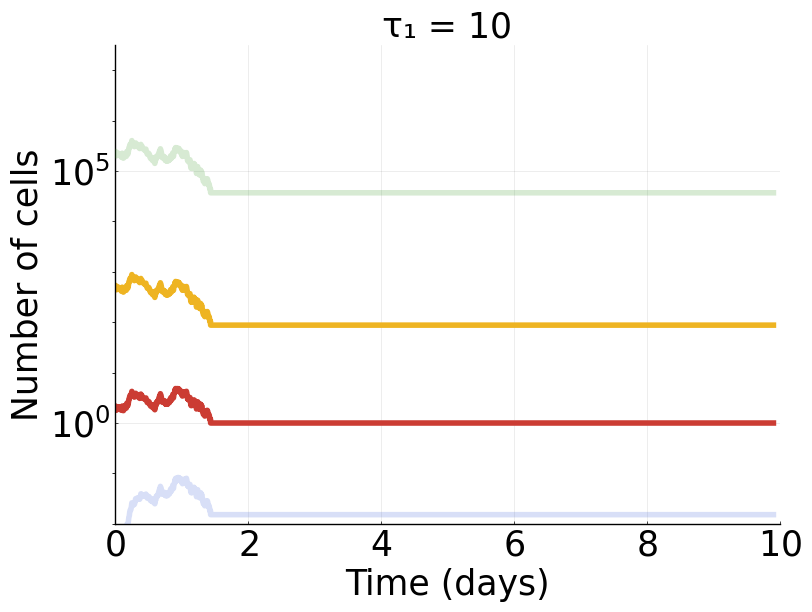

0.0
NaN

In [37]:
#solve with τ₁ = 10 (with set random seed for reproducibility)
τ₁ = 10.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1230)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:10.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    b = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)
    b_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 10",titlefontsize=25)

    display(b)
    display(b_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel c

50.0


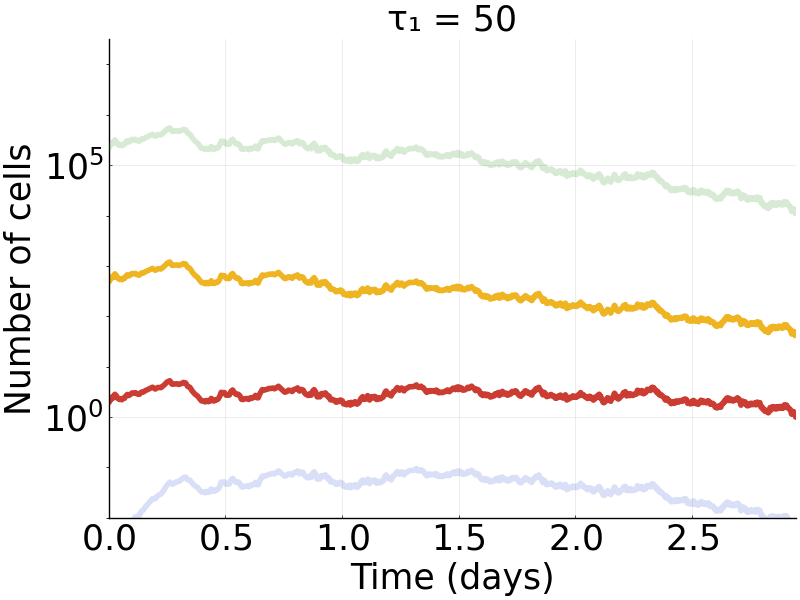

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


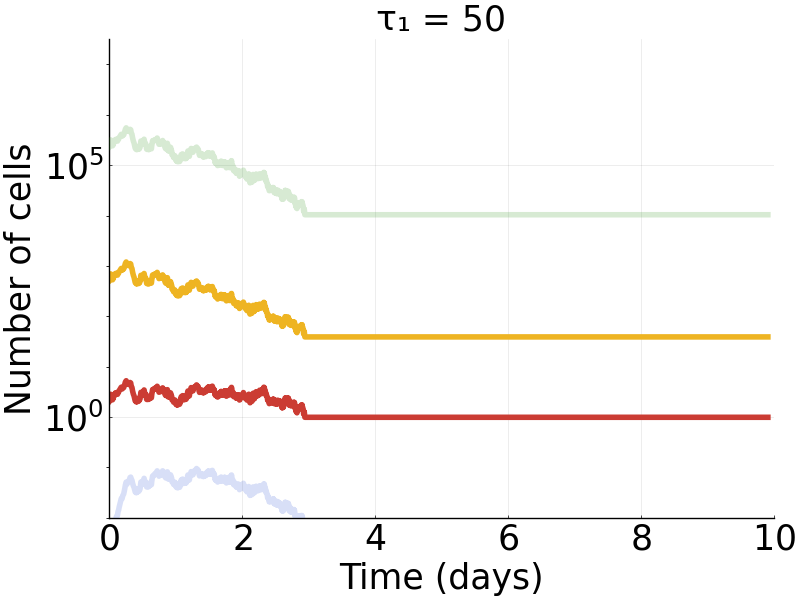

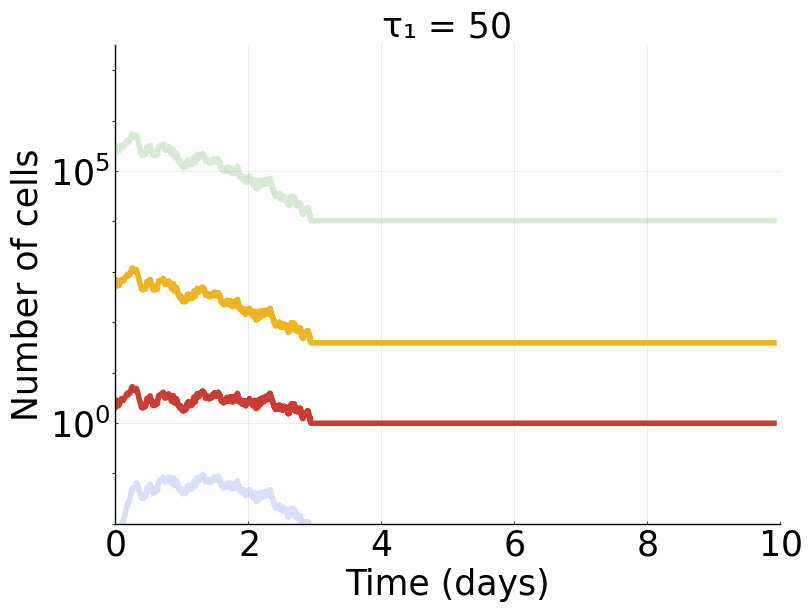

0.0
NaN

In [38]:
#solve with τ₁ = 50 (with set random seed for reproducibility)
τ₁ = 50.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1269)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS
  
prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

    time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:10.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    c = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)
    c_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 50",titlefontsize=25)

    display(c)
    display(c_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

## Panel d

365.0


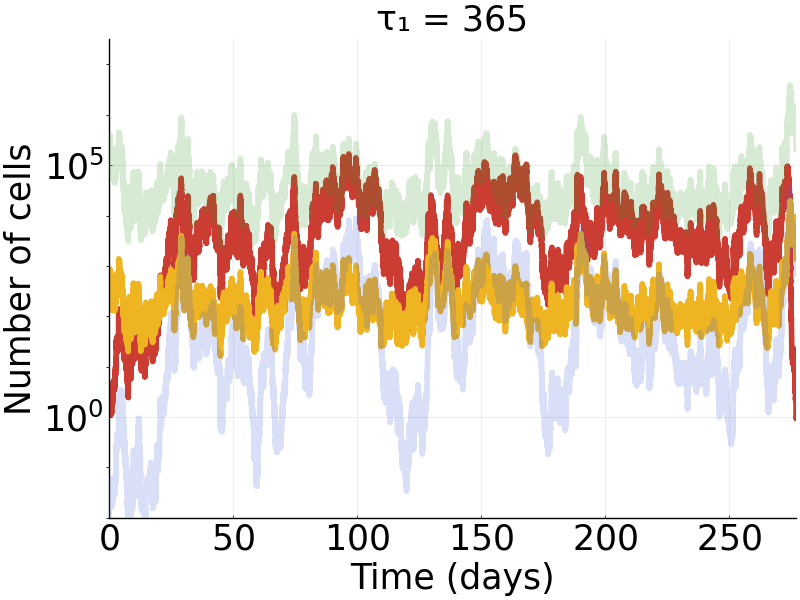

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


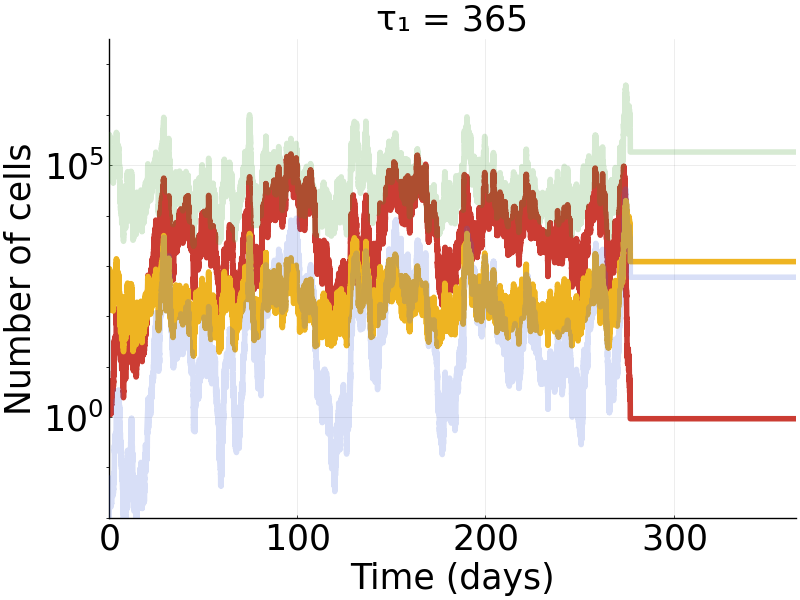

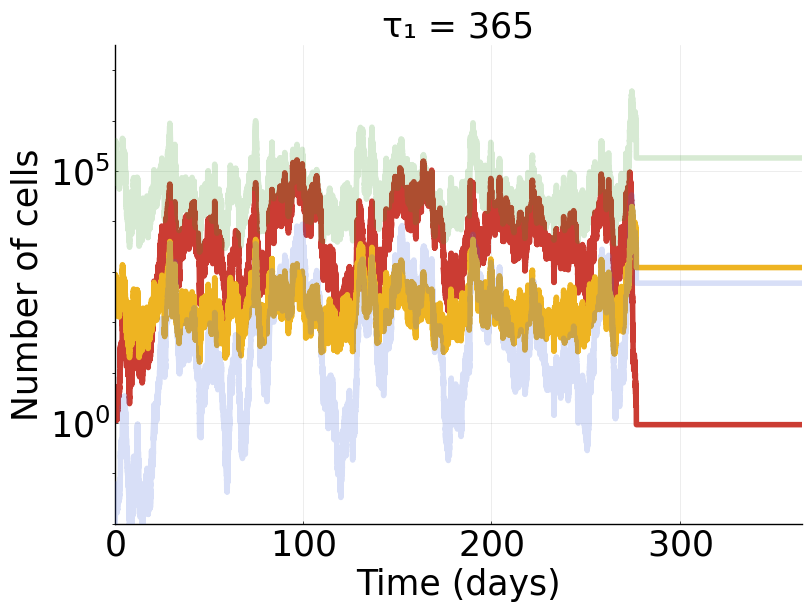

0.0
NaN

In [42]:
#solve with τ₁ = 365 (with set random seed for reproducibility)
τ₁ = 365.0
lags = [τ₁]

print(τ₁, "\n")

runs = 1.0
tumorsuccess = 0.0
threshold = 1.0

Random.seed!(1238)

meanofsuccessfulltumors = 0.0;

logocolors = Colors.JULIA_LOGO_COLORS

prob1 = SDDEProblem(dde_system,σfunction,u0,h,tspan,p; constant_lags=lags,noise=W)
sol = solve(prob1,SOSRI(),maxiters=10^8,callback=floor_event2)

A = minimum(sol[1,:])    

if A ≥ threshold
    tumorsuccess = tumorsuccess + 1
    meanofsuccessfulltumors = meanofsuccessfulltumors + mean(sol[1,:])
    plot1 = plot(sol, lw = 4, yaxis=:log, size =(800,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25) 

    display(plot1)
else
    for j in 1:length(sol[1,:])
        global BB = j
        if sol[1,j] < threshold
            break
        end
    end

     time_vector = sol.t[1:BB]   
    sol1 = sol[:,1:BB]
    for i in sol.t[BB]:0.1:365.0
        push!(time_vector,i)
        sol1 = [sol1 sol[:,BB]]
    end

    d = plot(sol, lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,sol.t[BB]), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)
    d_extended = plot(time_vector, transpose(sol1), lw = 4, yaxis=:log,size =(800,600), font = "Ariel", xlims = (0,365.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.2 0.2], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "τ₁ = 365",titlefontsize=25)

    display(d)
    display(d_extended)
end

print(100*tumorsuccess/runs, "\n")

print(meanofsuccessfulltumors/tumorsuccess)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


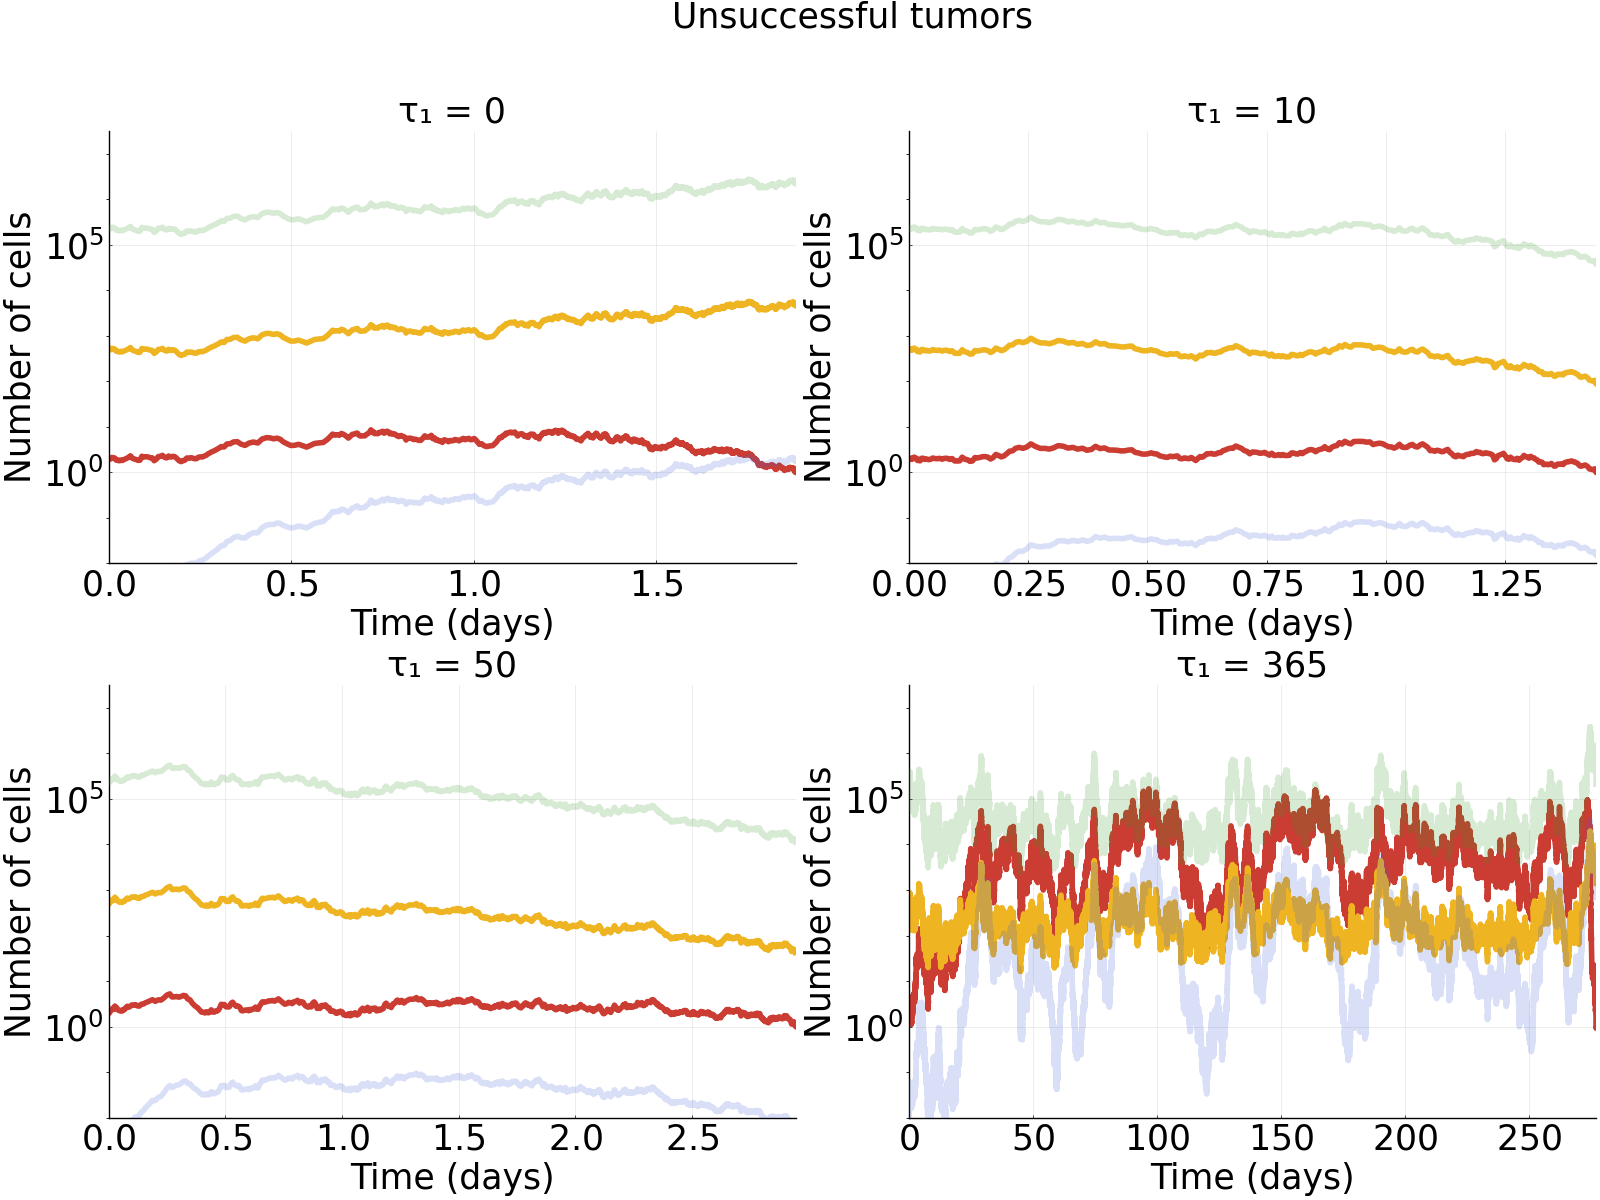

In [43]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a, b, c, d, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Unsuccessful tumors", font = "Ariel",titlefontsize=25)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


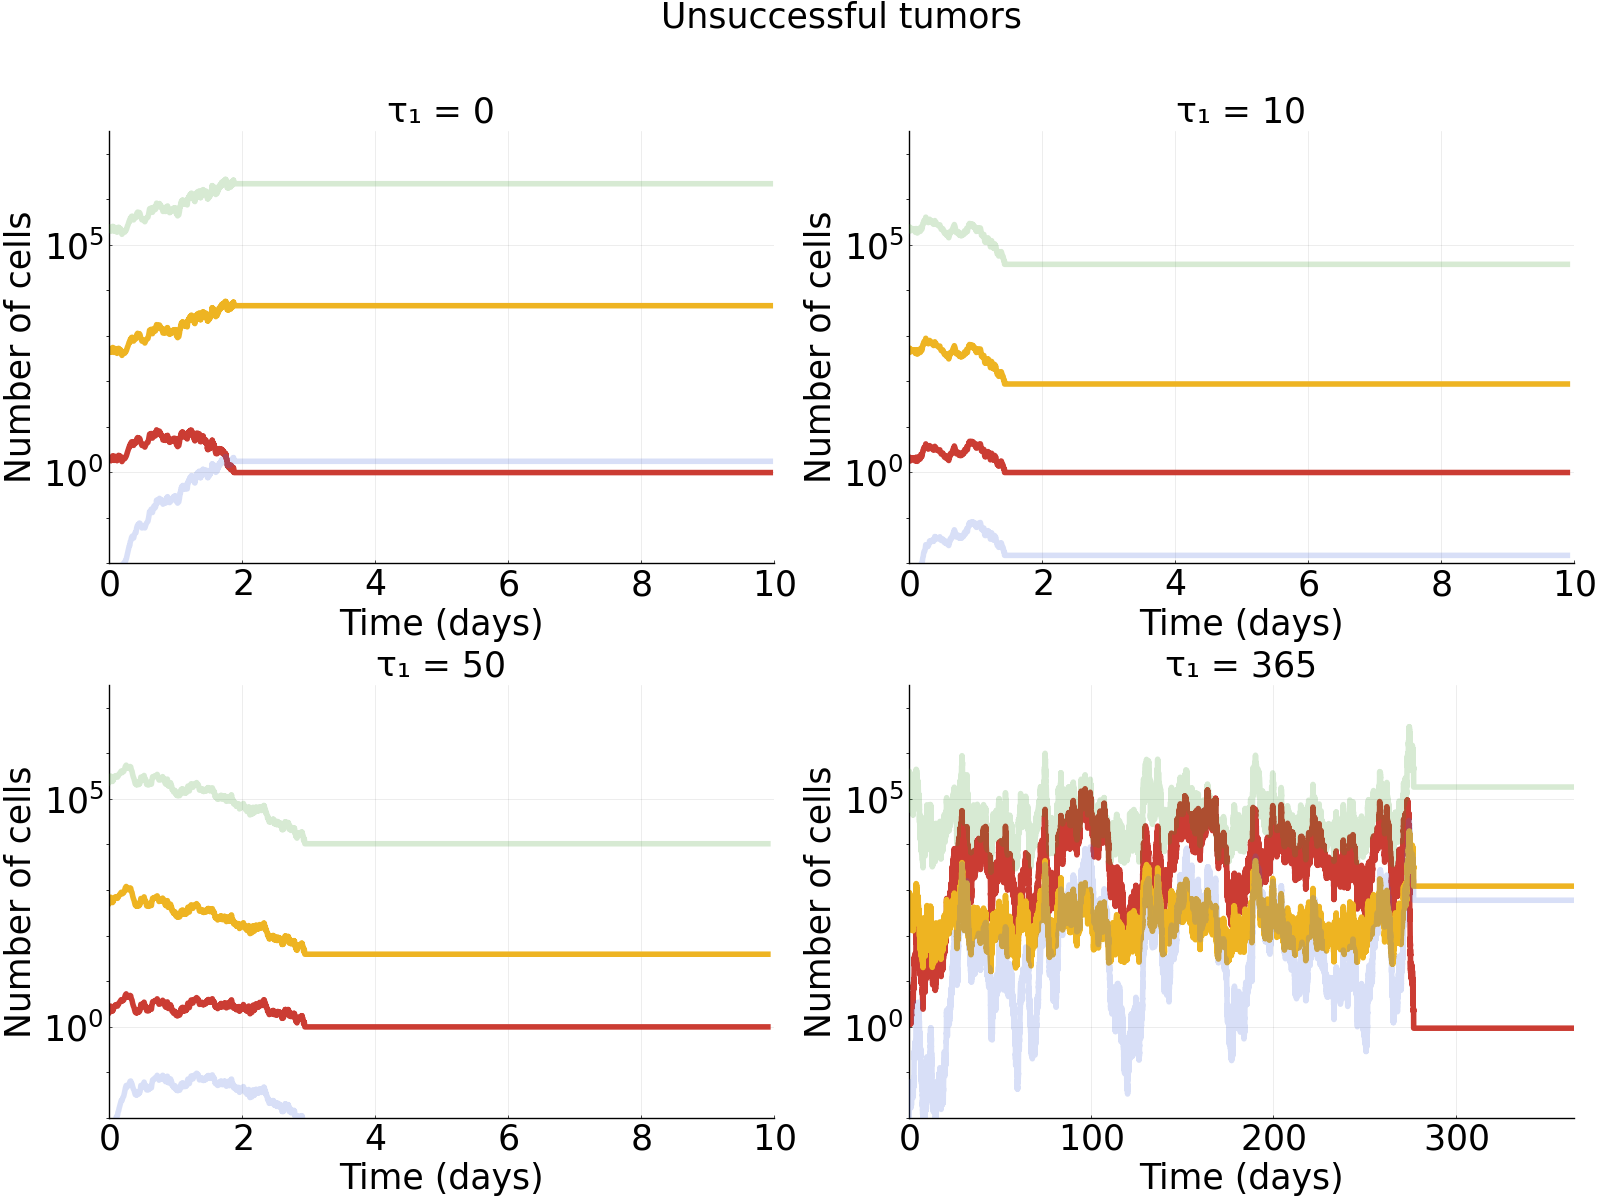

In [44]:
#plot results
l = @layout [a b; c d]
logocolors = Colors.JULIA_LOGO_COLORS
plot(a_extended, b_extended, c_extended, d_extended, layout = l,size =(1600,1200),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),plot_title="Unsuccessful tumors", font = "Ariel",titlefontsize=25)

# Delay plots

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

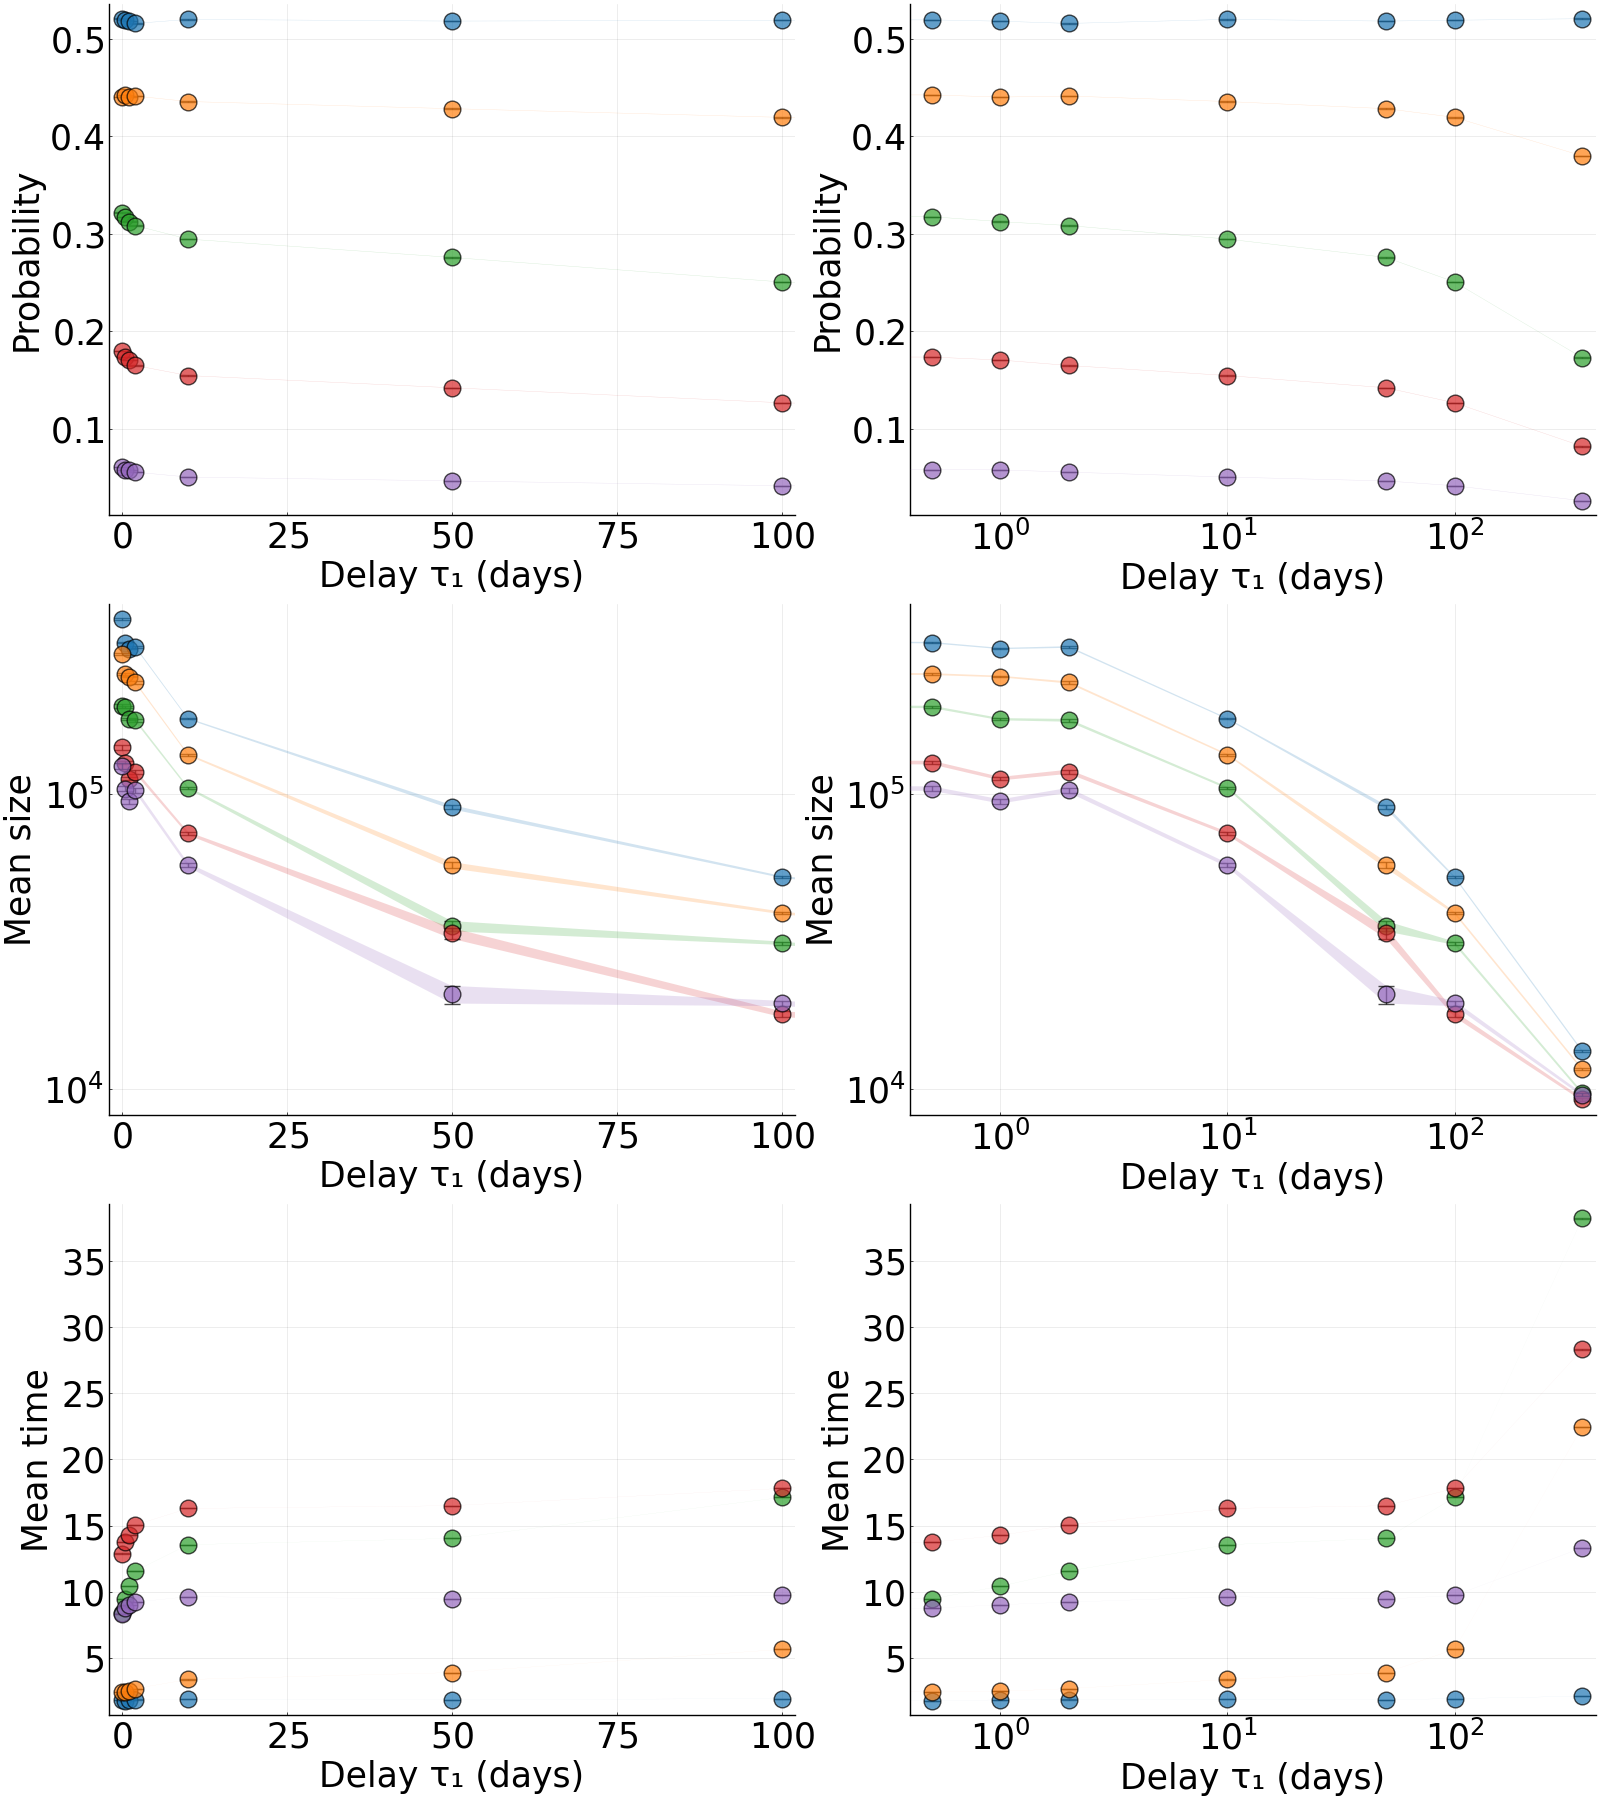

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [2]:
#plot for α₁
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success200 = [0.52067,0.51936,0.51802,0.51573,0.51987,0.51813,0.51899,0.5206]
prob_sigma200 = [0.499575,0.499628,0.499678,0.499755,0.499608,0.499674,0.499642,0.499578]
mean200 = [390917,325657,311041,314798,179711,90063.8,52208,13398.2]
mean_sigma200 = [6.57092*10^6,4.59642*10^6,3.87981*10^6,4.90952*10^6,2.29257*10^6,3.62887*10^6,1.01787*10^6,276487]
number_of_sims200 = [sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000),sqrt(100000)]
time200 = [1.8359,1.79055,1.87445,1.8974,1.93117,1.88062,1.96586,2.14636]
time_sigma200 =[7.96526,7.4512,8.39377,8.61256,9.12563,8.11352,9.15333,11.7485]

prob_success150 = [0.440281,0.442417,0.440206,0.441288,0.435629,0.428312,0.419405,0.379864]
prob_sigma150 = [0.496423,0.496676,0.496414,0.496543,0.495841,0.494836,0.493464,0.485355]
mean150 = [297352,254711,249961,238555,135733,57244.9,39425.7,11631.9]
mean_sigma150 = [5.20893*10^6,4.16001*10^6,3.57743*10^6,5.68132*10^6,1.59068*10^6,1.02464*10^6,1.32366*10^6,190806]
number_of_sims150 = [sqrt(120230),sqrt(104311),sqrt(105696),sqrt(104816),sqrt(105459),sqrt(108540),sqrt(110218),sqrt(126453)]
time150 = [2.43575,2.47981,2.51275,2.72231,3.409,3.92847,5.68224,22.4496]
time_sigma150 =[12.7222,13.0423,12.9583,15.0331,18.4065,18.3952,22.9263,67.3271]

prob_success100 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma100 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean100 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma100 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims100 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time100 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma100 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success50 = [0.179698,0.17358,0.170547,0.164953,0.154619,0.142073,0.126716,0.0820594]
prob_sigma50 = [0.383937,0.37875,0.376114,0.37114,0.361543,0.349127,0.332656,0.274456]
mean50 = [143826.,127601.,112551.,118862.,73341.7,33654.7,17877.6,9187.57]
mean_sigma50 = [2.15731*10^6,2.31411*10^6,1.63087*10^6,2.63169*10^6,1.08651*10^6,659450.,176773.,2301.57]
number_of_sims50 = [sqrt(134175),sqrt(100029),sqrt(103086),sqrt(103381),sqrt(102730),sqrt(105664),sqrt(108487),sqrt(121473)]
time50 = [12.9067,13.7628,14.2784,15.0591,16.3064,16.512,17.8204,28.2929]
time_sigma50 =[49.884,51.9084,52.5574,54.2098,55.9658,54.2856,54.3863,71.7908]

prob_success0 = [0.0609653,0.0580386,0.0579275,0.0555649,0.0505348,0.0465496,0.0416369,0.0262047]
prob_sigma0 = [0.239267,0.233818,0.233607,0.22908,0.219047,0.210673,0.199759,0.159744]
mean0 = [124420.,104145.,94199.3,102888.,57298.3,20862.6,19442.7,9534.08]
mean_sigma0 = [3.38188*10^6,2.07578*10^6,1.06524*10^6,1.47331*10^6,1.12906*10^6,149171.,352002.,2386.96]
number_of_sims0 = [sqrt(1342140),sqrt(104999),sqrt(152501),sqrt(148007),sqrt(105175),sqrt(134244),sqrt(137114),sqrt(104981)]
time0 = [8.35639,8.78197,9.04973,9.23944,9.65523,9.46847,9.74487,13.3427]
time_sigma0 =[39.5505,40.7133,41.3733,41.7399,42.4668,40.7554,40.3345,49.0281]


prob_success = [prob_success200 prob_success150 prob_success100 prob_success50 prob_success0]
prob_sigma = [prob_sigma200/number_of_sims200 prob_sigma150/number_of_sims150 prob_sigma100/number_of_sims100 prob_sigma50/number_of_sims50 prob_sigma0/number_of_sims0]

mean = [mean200 mean150 mean100 mean50 mean0]
mean_sigma = [mean_sigma200/number_of_sims200 mean_sigma150/number_of_sims150 mean_sigma100/number_of_sims100 mean_sigma50/number_of_sims50 mean_sigma0/number_of_sims0]

time = [time200 time150 time100 time50 time0]
time_sigma = [time_sigma200/number_of_sims200 time_sigma150/number_of_sims150 time_sigma100/number_of_sims100 time_sigma50/number_of_sims50 time_sigma0/number_of_sims0]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chan

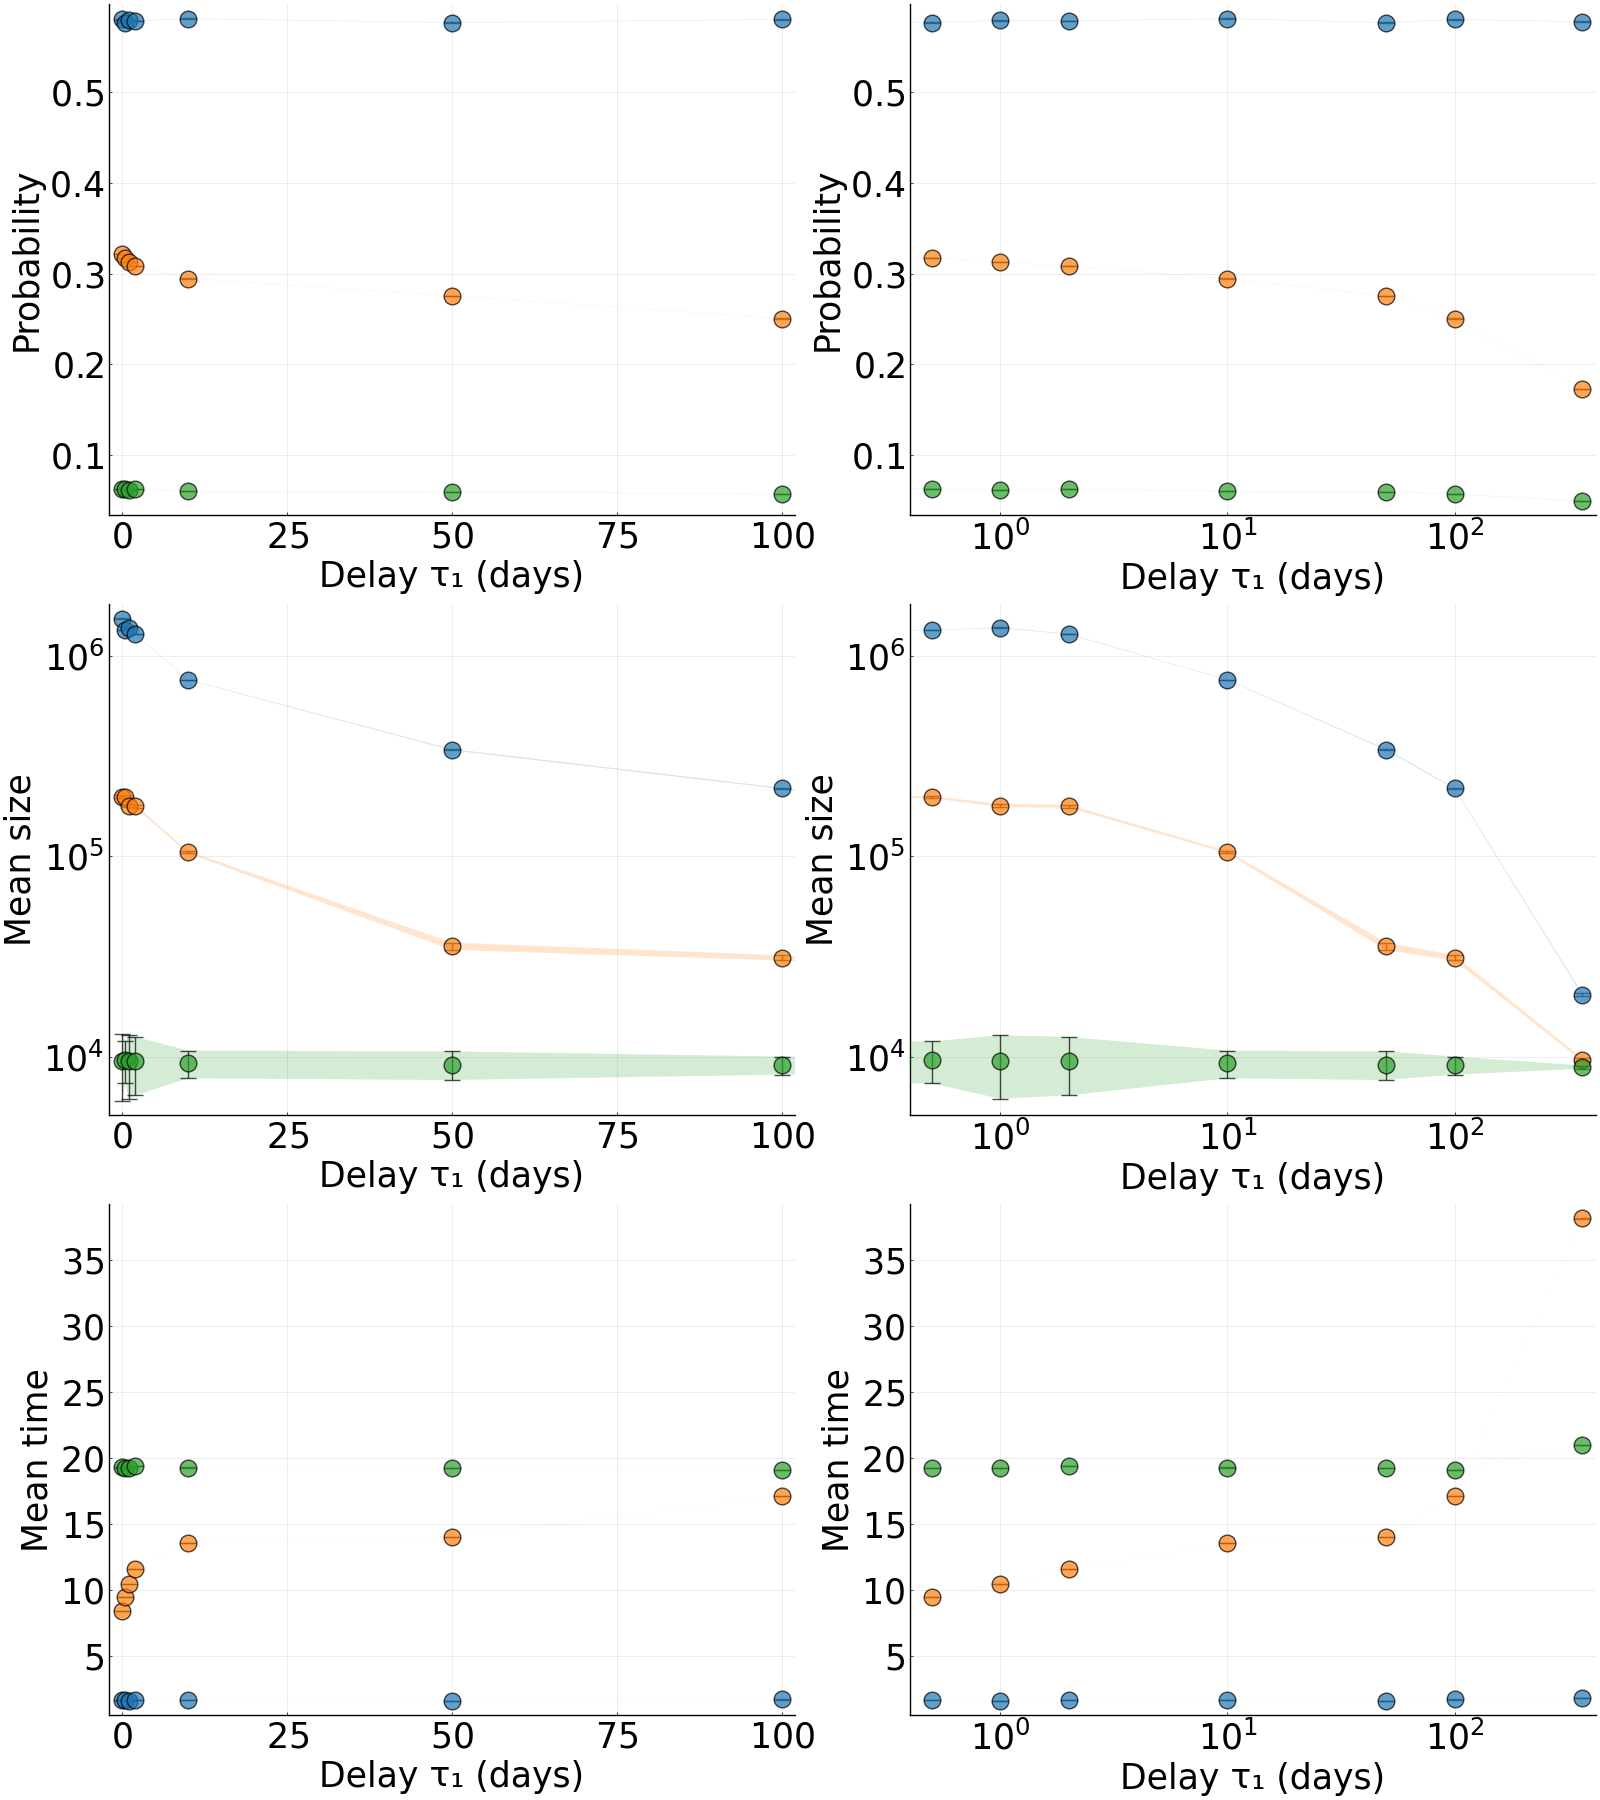

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2q

In [2]:
#plot for α₁₄
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success10n4 = [0.580016,0.576499,0.578837,0.578279,0.580816,0.576478,0.579891,0.577501]
prob_sigma10n4 = [0.493557,0.494116,0.493748,0.493837,0.493428,0.494119,0.493578,0.493959]
mean10n4 = [1.53191*10^6,1.34259*10^6,1.38166*10^6,1.28288*10^6,759544,340114,217968,20408.3]
mean_sigma10n4 = [1.13528*10^7,7.40251*10^6,1.08067*10^7,9.9858*10^6,4.75756*10^6,4.85713*10^6,3.0557*10^6,527350]
number_of_sims10n4 = [sqrt(256731),sqrt(106538),sqrt(105705),sqrt(105501),sqrt(105617),sqrt(114105),sqrt(121666),sqrt(143418)]
time10n4 = [1.64546,1.67286,1.62925,1.68716,1.68003,1.61089,1.71913,1.86218]
time_sigma10n4 =[7.9846,8.53064,8.04551,8.79182,8.63927,7.44698,8.66009,10.9508]

prob_success4t10n5 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma4t10n5 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean4t10n5 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma4t10n5 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims4t10n5 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time4t10n5 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma4t10n5 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success10n5 = [0.0626245,0.0630946,0.0618317,0.0630908,0.0603281,0.0597871,0.0571256,0.0498191]
prob_sigma10n5 = [0.242287,0.243134,0.240851,0.243127,0.238095,0.237093,0.232084,0.217572]
mean10n5 = [9489.89,9626.14,9471.38,9471.57,9255.95,9130.65,9068.35,8862.56]
mean_sigma10n5 = [4057.02,5268.35,2538.75,4847.29,2827.06,2398.44,2381.86,2249.34]
number_of_sims10n5 = [sqrt(127490),sqrt(100595),sqrt(100434),sqrt(101140),sqrt(102357),sqrt(104454),sqrt(106257),sqrt(119934)]
time10n5 = [19.3006,19.2903,19.2524,19.4266,19.2971,19.2389,19.1301,21.0142]
time_sigma10n5 =[60.0717,60.0054,60.2217,60.0074,59.8518,59.5921,58.7898,61.7948]


prob_success = [prob_success10n4 prob_success4t10n5 prob_success10n5]
prob_sigma = [prob_sigma10n4/number_of_sims10n4 prob_sigma4t10n5/number_of_sims4t10n5 prob_sigma10n5/number_of_sims10n5]

mean = [mean10n4 mean4t10n5 mean10n5]
mean_sigma = [mean_sigma10n4/number_of_sims10n4 mean_sigma4t10n5/number_of_sims4t10n5 mean_sigma10n5/number_of_sims10n5]

time = [time10n4 time4t10n5 time10n5]
time_sigma = [time_sigma10n4/number_of_sims10n4 time_sigma4t10n5/number_of_sims4t10n5 time_sigma10n5/number_of_sims10n5]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may chan

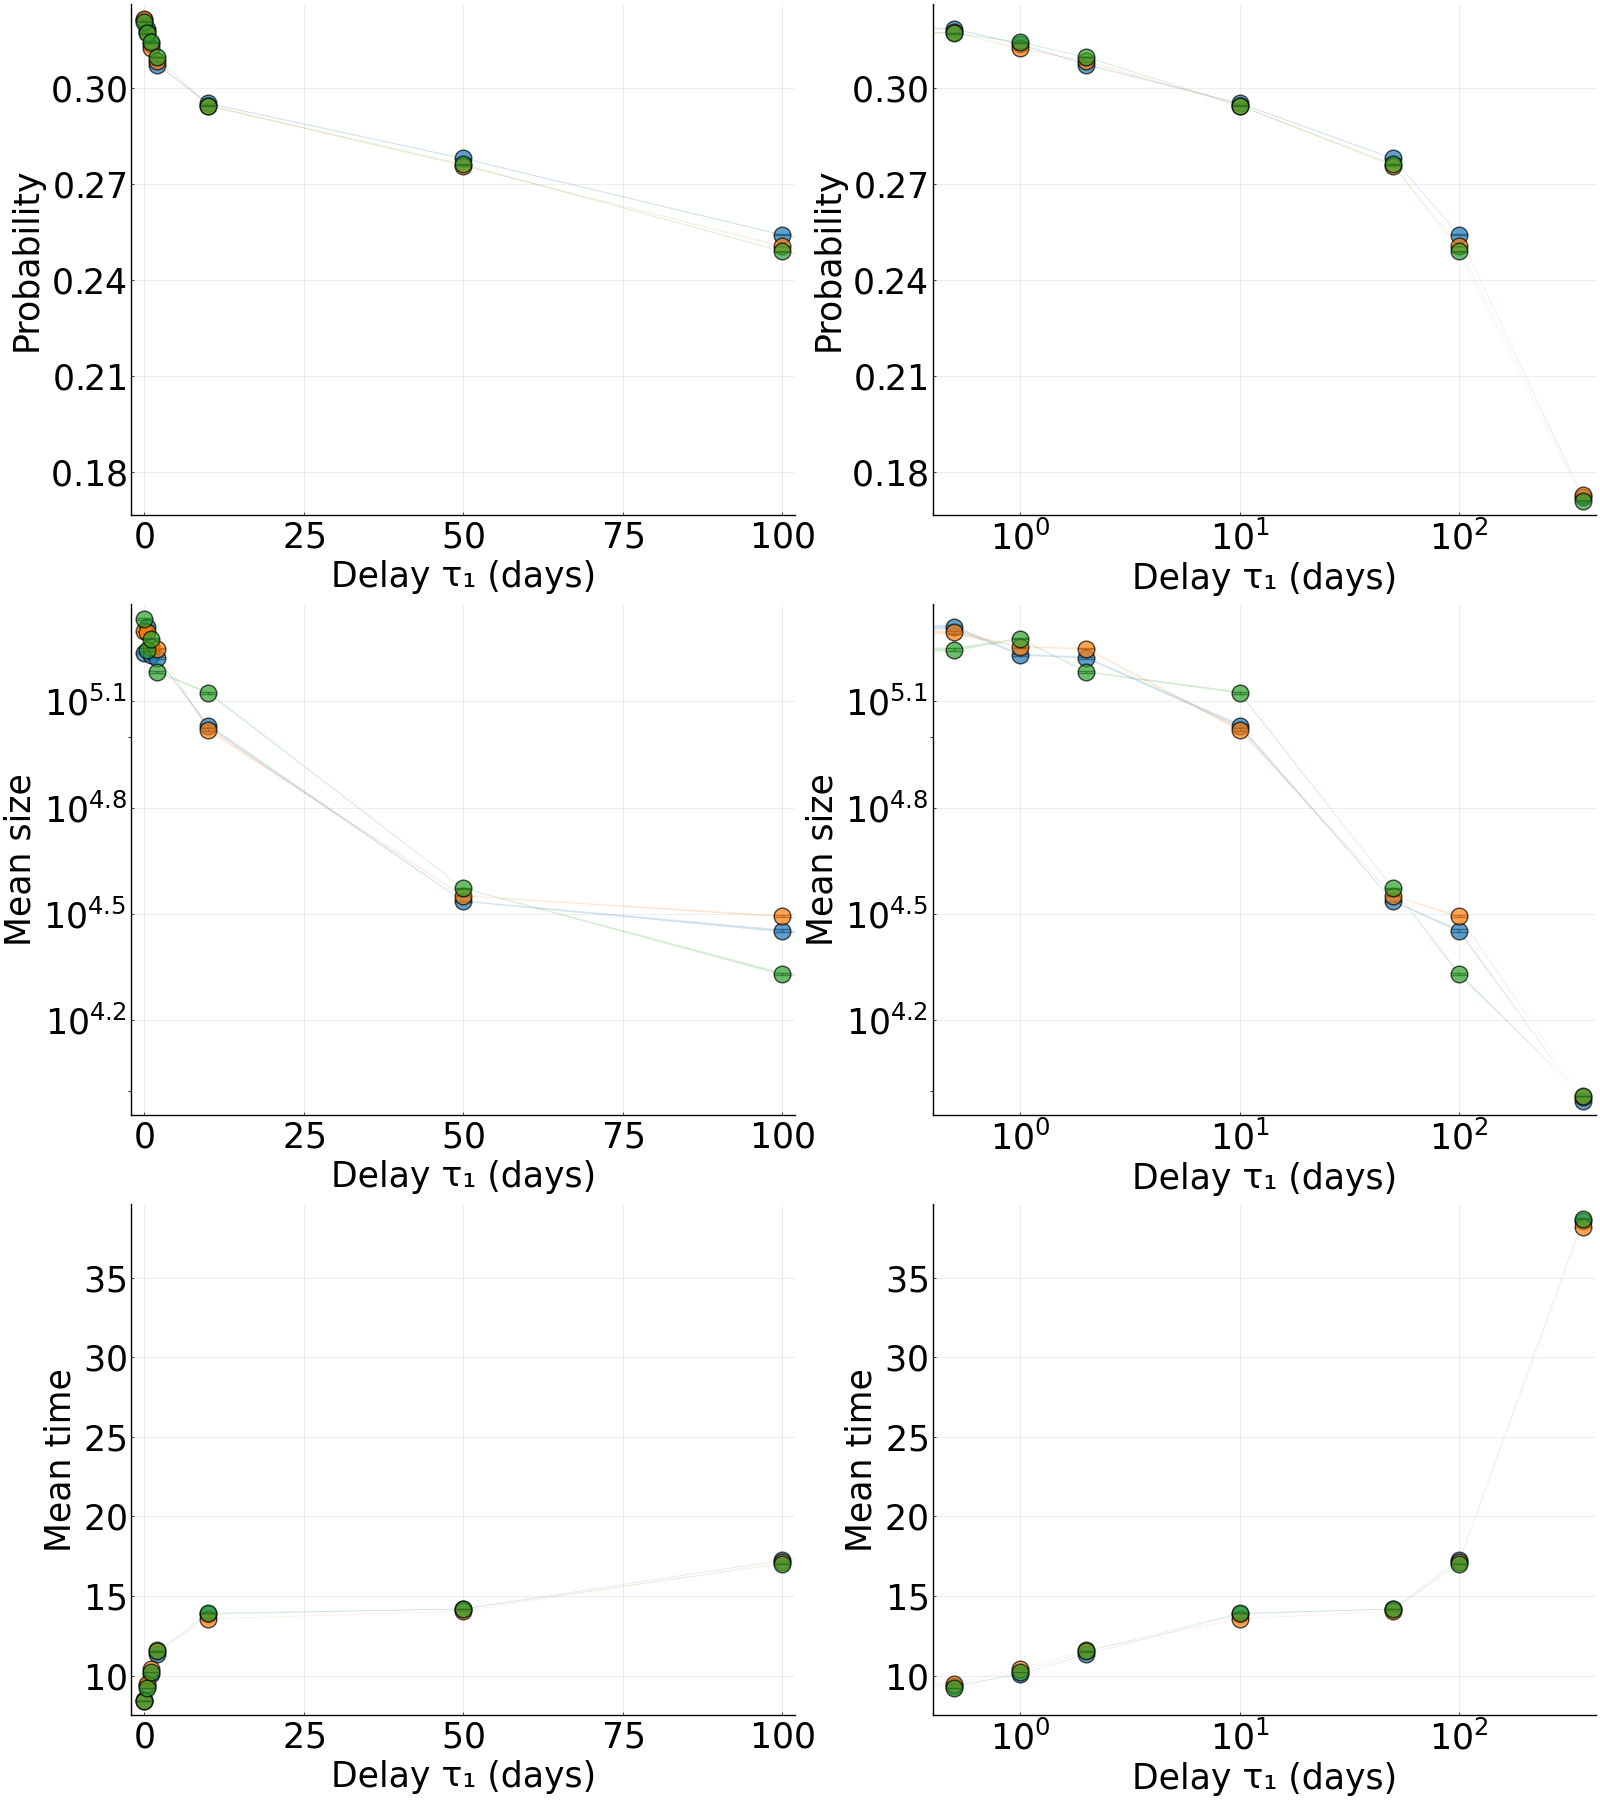

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 0.7)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
┌ Warning: Invalid negative or zero value 0.0 found at series index 2 for log10 based xscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2q

In [2]:
#plot for α₁₉
l = @layout [a b; c d; e f]
delays = [0,0.5,1,2,10,50,100,365]

prob_success5t10n4 = [0.321253,0.318637,0.313757,0.307416,0.295281,0.278051,0.254158,0.172117]
prob_sigma5t10n4 = [0.466959,0.46595,0.464021,0.461425,0.456171,0.448041,0.435389,0.377483]
mean5t10n4 = [172414,204083,170563,167353,107548,34361.6,28335.5,9377.94]
mean_sigma5t10n4 = [3.2732*10^6,6.77102*10^6,2.42371*10^6,2.44056*10^6,2.74728*10^6,323682,609004,2387.1]
number_of_sims5t10n4 = [sqrt(217738),sqrt(124518),sqrt(125441),sqrt(124395),sqrt(125589),sqrt(127980),sqrt(129805),sqrt(146017)]
time5t10n4 = [8.46267,9.37942,10.072,11.3366,13.8726,14.1926,17.2497,38.5379]
time_sigma5t10n4 =[39.0201,41.382,43.2191,46.4694,51.5219,48.7865,50.8526,83.7162]

prob_success10n4 = [0.321711,0.317475,0.3125,0.30843,0.294564,0.275741,0.250585,0.172958]
prob_sigma10n4 = [0.467133,0.465496,0.463514,0.461847,0.455848,0.446889,0.433351,0.378212]
mean10n4 = [198535.,197124.,179085.,177517.,104698.,35567.,31121.6,9651.81]
mean_sigma10n4 = [3.93484*10^6,6.08296*10^6,3.69632*10^6,6.68483*10^6,3.79012*10^6,351135.,1.0642*10^6,2443.94]
number_of_sims10n4 = [sqrt(634443),sqrt(150188),sqrt(147523),sqrt(140800),sqrt(148501),sqrt(152400),sqrt(156390),sqrt(173221)]
time10n4 = [8.4226,9.49264,10.4432,11.5911,13.5737,14.048,17.1391,38.1711]
time_sigma10n4 =[38.7737,41.7508,44.3292,46.8041,50.5953,48.1733,50.771,83.0854]

prob_success5t10n5 = [0.320807,0.317287,0.314393,0.309786,0.294581,0.276185,0.249058,0.171064]
prob_sigma5t10n5 = [0.466787,0.465423,0.464276,0.462408,0.455856,0.447112,0.43247,0.376566]
mean5t10n5 = [214865,176308,189249,152551,133333,37374.8,21412,9684.41]
mean_sigma5t10n5 = [5.89724*10^6,2.21887*10^6,3.03558*10^6,1.87603*10^6,3.96456*10^6,548492,194234,2452.99]
number_of_sims5t10n5 = [sqrt(431599),sqrt(102144),sqrt(101599),sqrt(100876),sqrt(101439),sqrt(102663),sqrt(106449),sqrt(118903)]
time5t10n5 = [8.42075,9.23028,10.2403,11.52,13.9203,14.1769,17.0167,38.684]
time_sigma5t10n5 =[38.8021,40.6315,43.6771,46.7931,51.5811,48.3473,49.916,84.0469]


prob_success = [prob_success5t10n4 prob_success10n4 prob_success5t10n5]
prob_sigma = [prob_sigma5t10n4/number_of_sims5t10n4 prob_sigma10n4/number_of_sims10n4 prob_sigma5t10n5/number_of_sims5t10n5]

mean = [mean5t10n4 mean10n4 mean5t10n5]
mean_sigma = [mean_sigma5t10n4/number_of_sims5t10n4 mean_sigma10n4/number_of_sims10n4 mean_sigma5t10n5/number_of_sims5t10n5]

time = [time5t10n4 time10n4 time5t10n5]
time_sigma = [time_sigma5t10n4/number_of_sims5t10n4 time_sigma10n4/number_of_sims10n4 time_sigma5t10n5/number_of_sims5t10n5]

p1 = plot(delays,prob_success,yerror=prob_sigma,ribbon=prob_sigma,fillalpha= 0.2,grid=true,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel") #xlims = (-15,380)
p3 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p2 = plot(delays,prob_success,yerror=prob_sigma,grid=true,ribbon=prob_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Probability", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p4 = plot(delays,mean,yerror=mean_sigma,grid=true,ribbon=mean_sigma,fillalpha= 0.2,yaxis=:log,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean size", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
p5 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (-2,102),markersize = 12,font = "Ariel")
p6 = plot(delays,time,yerror=time_sigma,grid=true,ribbon=time_sigma,fillalpha= 0.2,xaxis=:log,palette=:tab10,align="center",alpha=0.7,label = "",xlabel = "Delay τ₁ (days)",ylabel = "Mean time", seriestype =:scatter,xlims = (0.4,420),markersize = 12,font = "Ariel")
plot(p1, p2, p3, p4, p5, p6, layout = l,size =(1600,1800),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25))

# Time plot

In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

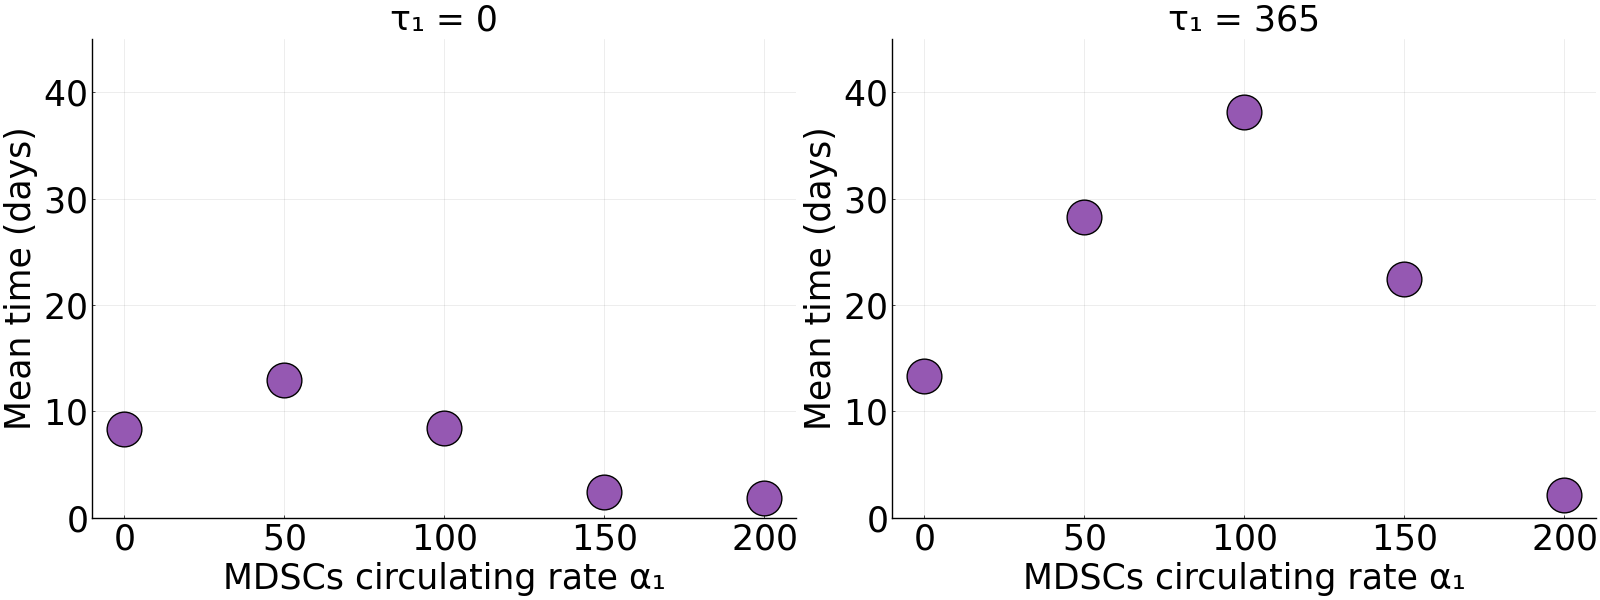

In [3]:
#time to extinction plot
l = @layout [a b]
delays = [0,0.5,1,2,10,50,100,365]
alpha1 = [0,50,100,150,200]
times0 = [8.35639,12.9067,8.4226,2.43575,1.8359]
times365 = [13.3427,28.2929,38.1711,22.4496,2.14636]

logocolors = Colors.JULIA_LOGO_COLORS

p1 = plot(alpha1,times0,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 0",xlabel = "MDSCs circulating rate α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
p2 = plot(alpha1,times365,grid=true,color=logocolors.purple,align="center",title = "τ₁ = 365",xlabel = "MDSCs circulating rate α₁",ylabel = "Mean time (days)",legend = false,seriestype =:scatter,markersize = 25,font = "Ariel",xlims = (-10,210),ylims = (0,45))
plot(p1,p2,layout = l,size =(1600,600),xtickfont=font(25),ytickfont=font(25),guidefont=font(25),legendfont=font(25),titlefont=font(25))

# Stochastic Gillespie simulations

In [1]:
using Catalyst
using DifferentialEquations
using ModelingToolkit
using Plots; pyplot()
using Statistics
using ParameterizedFunctions
using DiffEqJump
using DelimitedFiles
using CSV
using DataFrames
using Random
logocolors = Colors.JULIA_LOGO_COLORS

(red = RGB{N0f8}(0.796,0.235,0.2), green = RGB{N0f8}(0.22,0.596,0.149), blue = RGB{N0f8}(0.251,0.388,0.847), purple = RGB{N0f8}(0.584,0.345,0.698))

In [2]:
# model definition 
system = @reaction_network begin
  α₇*C*log(α₈/C),  0 --> C
  α₁, 0 --> M
  α₉*NK, C --> 0
  α₁₀*T, C --> 0
  α₁₁, C --> 0
  α₂*C/(γ₁+(C)), 0 --> M
  α₃, M --> 0
  α₁₂, 0 --> NK
  α₁₃*(C^2)/(γ₂+(C^2)), 0 --> NK
  α₁₄*M, NK --> 0
  α₁₆, NK --> 0
  α₁₇*C*NK, 0 --> T
  α₁₈*(C^2)/(γ₃+(C^2)), 0 --> T
  α₁₉*M, T --> 0
  α₂₁, T --> 0
end α₁ α₂ α₃ α₇ α₈ α₉ α₁₀ α₁₁ α₁₂ α₁₃ α₁₄ α₁₆ α₁₇ α₁₈ α₁₉ α₂₁ γ₁ γ₂ γ₃

Model ##ReactionSystem#257 with 15 equations
States (4):
  C(t)
  M(t)
  NK(t)
  T(t)
Parameters (19):
  α₁
  α₂
  α₃
  α₇
  α₈
  α₉
⋮

In [3]:
fullsystem = convert(ODESystem, system)

Model ##ReactionSystem#257 with 4 equations
States (4):
  C(t)
  M(t)
  NK(t)
  T(t)
Parameters (19):
  α₁
  α₂
  α₃
  α₇
  α₈
  α₉
⋮

In [4]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁,α₂,α₃,α₇,α₈,α₉,α₁₀,α₁₁,α₁₂,α₁₃,α₁₄,α₁₆,α₁₇,α₁₈,α₁₉,α₂₁,γ₁,γ₂,γ₃)
tspan = (0.0,365.0)
u0 = [1.0;α₁/α₃;α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆);0.0]

4-element Vector{Float64}:
      1.0
    500.0
 228758.1699346405
      0.0

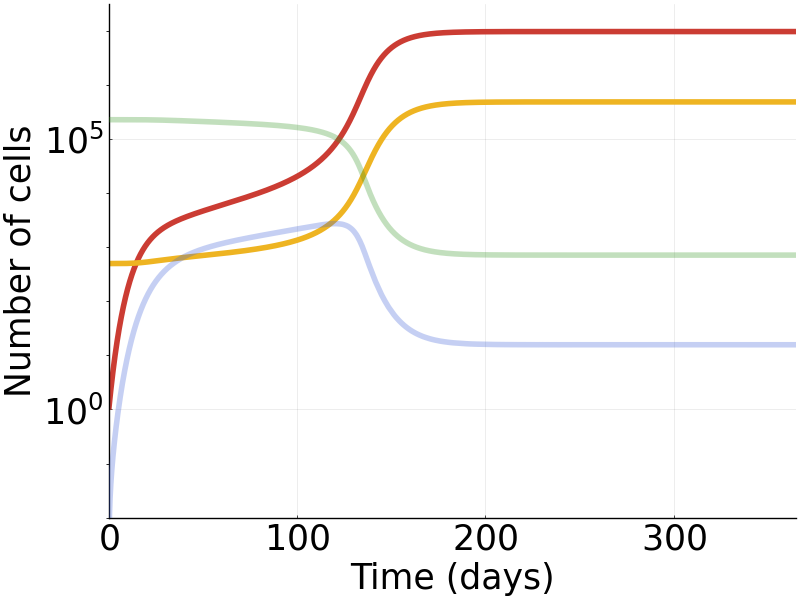

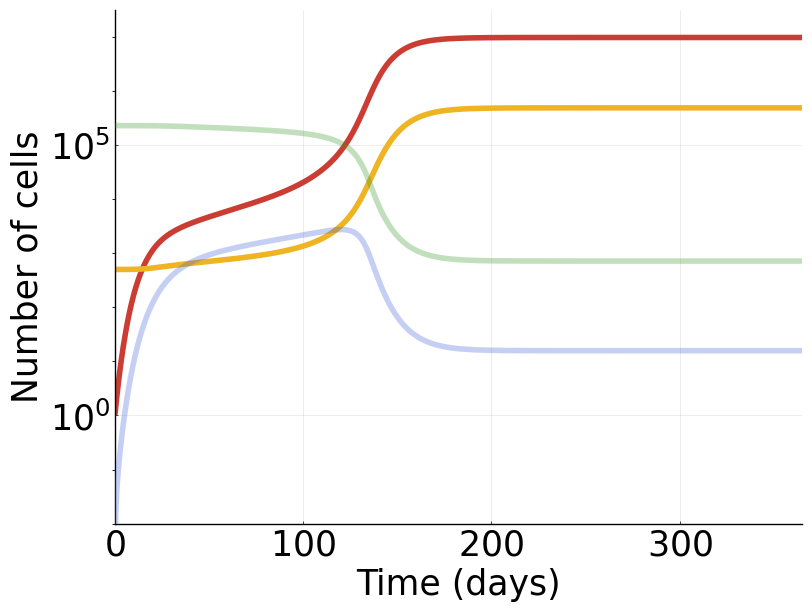

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2929-element Vector{Float64}:
   0.0
   0.060256944660698405
   0.2658731855330636
   0.6178678412300449
   1.08210261861819
   1.684126310943165
   2.4317786018601573
   3.34578128252542
   4.446307229515896
   5.765151525342025
   7.3470861647998404
   9.261456882988949
  11.618070929491504
   ⋮
 364.2352349769921
 364.3071204329561
 364.3790058955852
 364.4508913553578
 364.52277680751314
 364.594662256812
 364.666547712776
 364.7384331754051
 364.8103186351777
 364.8822040920938
 364.95408954615345
 365.0
u: 2929-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [1.0499376846703614, 500.0006138318529, 228758.1697666647, 0.0015506139550194307]
 [1.2371655191044952, 500.00288952088306, 228758.16653464, 0.007392474870977418]
 [1.6258290254875443, 500.0075401967587, 228758.15023991073, 0.019676561729973757]
 [2.2977508055193905, 500.01551776993205, 228758.10325701066, 0.04142467882334979

In [5]:
# deterministic simulation of system
op    = ODEProblem(system, u0, tspan, p)
sol   = solve(op, Tsit5()) 
plot2 = plot(sol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot2)
sol

In [9]:
#define conditions for simulation to end
function condition(u,t,integrator) 
  u[1] <= 0 
end
floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

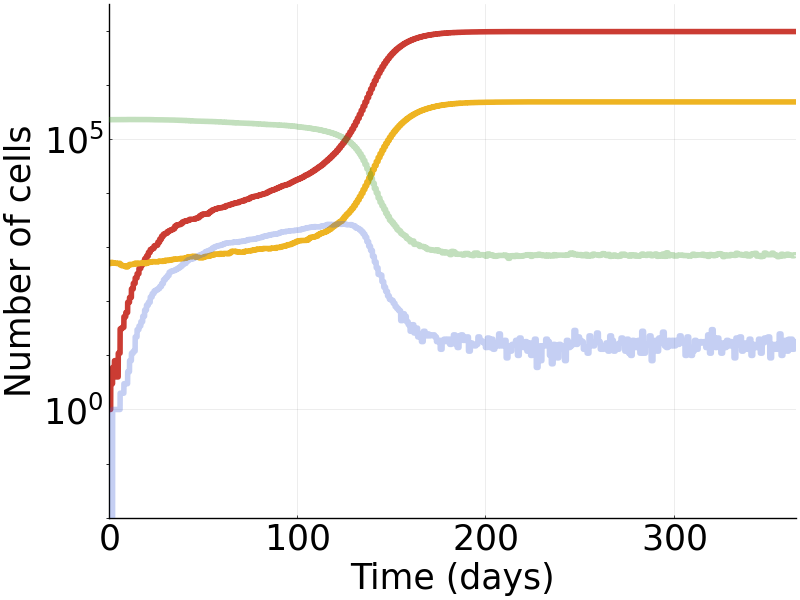

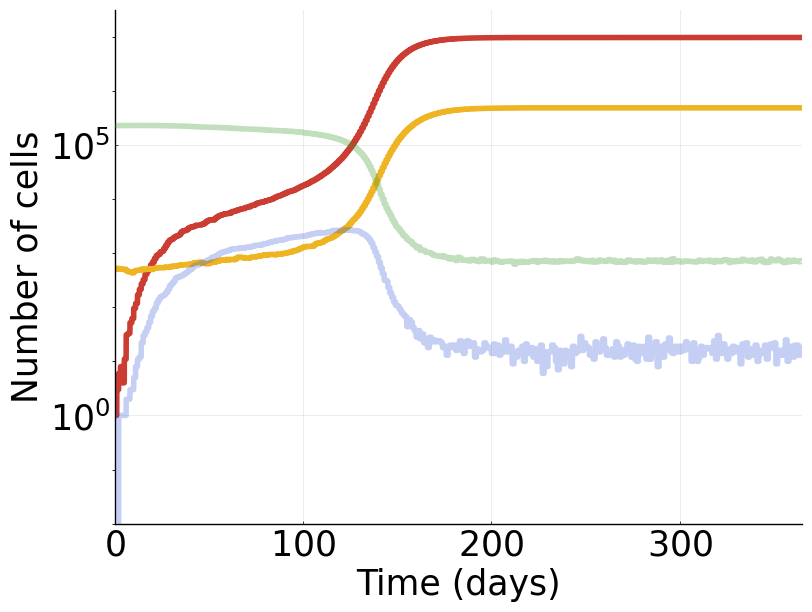

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Default
Interpolation: Piecewise constant interpolation
t: 366-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 366-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [3.0, 525.0, 228734.1699346405, 0.0]
 [6.0, 513.0, 228512.1699346405, 1.0]
 [8.0, 508.0, 228586.1699346405, 1.0]
 [4.0, 502.0, 228423.1699346405, 1.0]
 [11.0, 505.0, 228620.1699346405, 1.0]
 [31.0, 472.0, 228689.1699346405, 2.0]
 [33.0, 454.0, 229092.1699346405, 2.0]
 [52.0, 452.0, 229596.1699346405, 3.0]
 [62.0, 432.0, 229832.1699346405, 3.0]
 [96.0, 460.0, 230319.1699346405, 5.0]
 [118.0, 482.0, 230543.1699346405, 8.0]
 [170.0, 482.0, 230679.1699346405, 11.0]
 ⋮
 [9.752449e6, 487974.0, 712.169934640493, 16.0]
 [9.75248e6, 487980.0, 670.169934640493, 13.0]
 [9.752752e6, 487866.0, 685.169934640493, 25.0]
 [9.752697e6, 488129.0, 744.1699

In [41]:
# stochastic simulation of system - successful tumor
Random.seed!(1234)

dprob = DiscreteProblem(system, u0, tspan, p)
jprob = JumpProblem(system, dprob, Direct(), save_positions=(false,false)) 
jsol = solve(jprob, SSAStepper(), saveat=1.0, callback=floor_event)
plot1 = plot(jsol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot1)

jsol

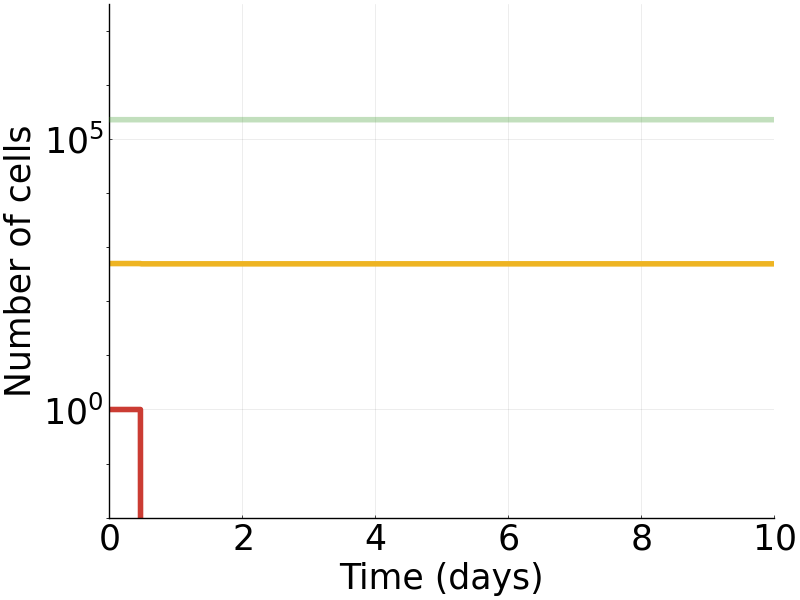

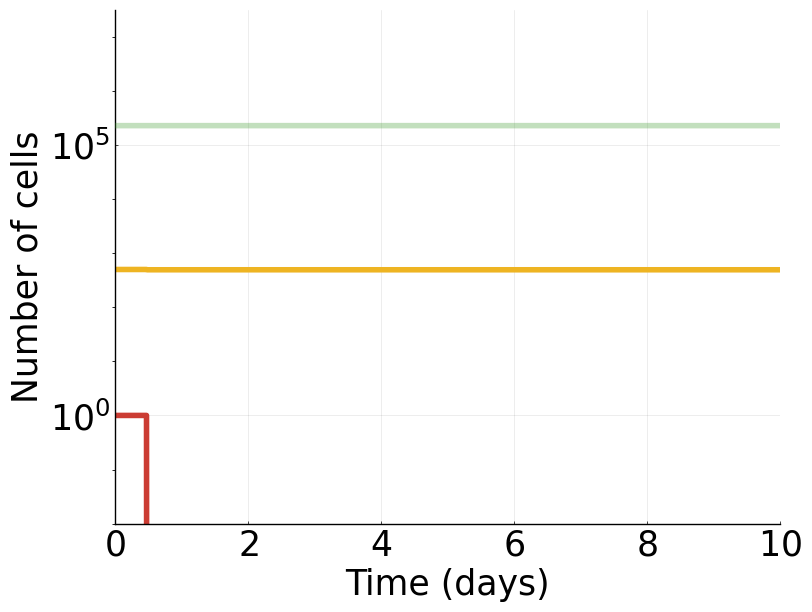

┌ Warning: Invalid negative or zero value 0.0 found at series index 50 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:95


retcode: Terminated
Interpolation: Piecewise constant interpolation
t: 368-element Vector{Float64}:
   0.0
   0.4781712957391987
   0.4781712957391987
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
   ⋮
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
 365.0
u: 368-element Vector{Vector{Float64}}:
 [1.0, 500.0, 228758.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 ⋮
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 [0.0, 494.0, 228612.1699346405, 0.0]
 

In [42]:
# stochastic simulation of system - unsuccessful tumor

Random.seed!(1240)

dprob = DiscreteProblem(system, u0, tspan, p)
jprob = JumpProblem(system, dprob, Direct(), save_positions=(false,false)) 
jsol = solve(jprob, SSAStepper(), saveat=1.0, callback=floor_event)
plot1 = plot(jsol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", xlims = (0.0,10.0), ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

display(plot1)

jsol

In [34]:
#parameters
α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells

1 / (α₇*1.0*log(α₈/1.0) / (α₉*228758.1699346405))

0.49674205446450365

In [44]:
df = DataFrame(CSV.File("gillespie.csv"))
list = Matrix(df)
list2 = zeros(length(list))
for i = 1:length(list)
    list2[i] = mean(list[1:i])
end
vector = LinRange(1, length(list2), length(list2)) 

25030-element LinRange{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,…,25027.0,25028.0,25029.0,25030.0

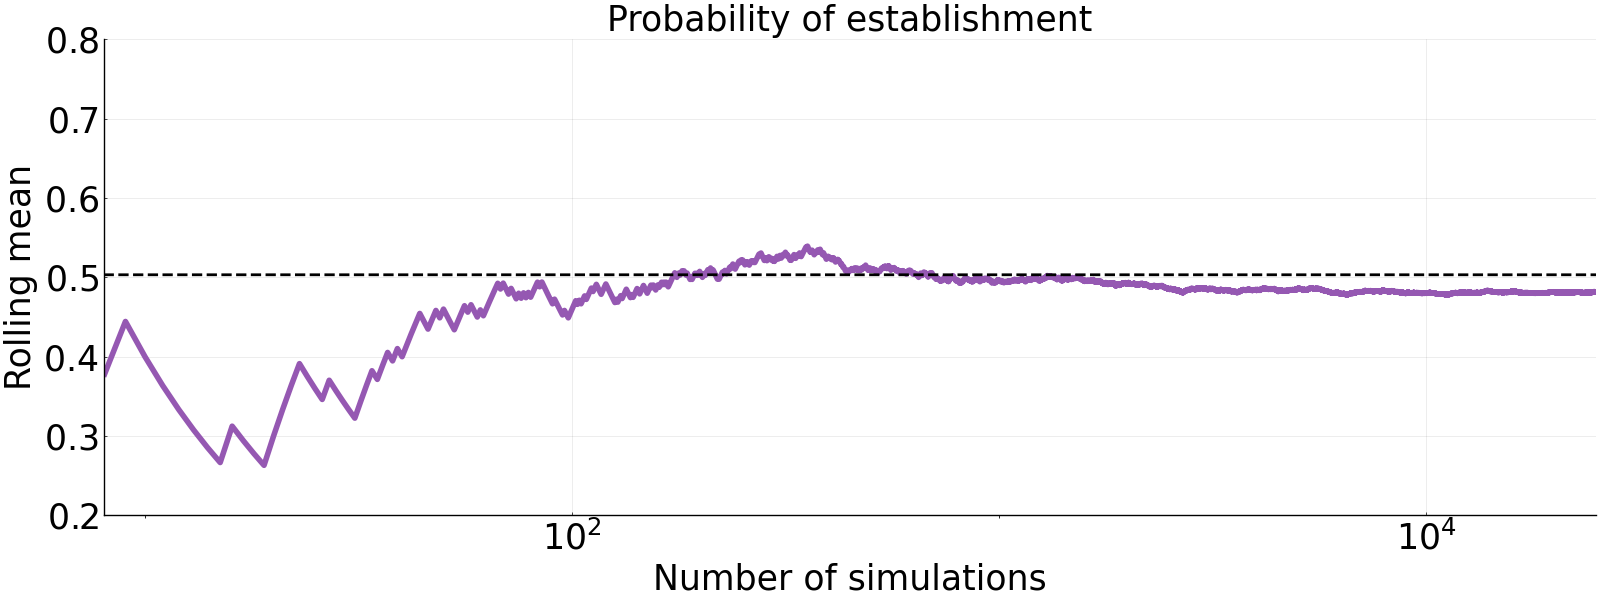

┌ Warning: Indices Base.OneTo(1) of attribute `seriesalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `linealpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `fillalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markeralpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `markerstrokealpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/Plots/Xv2qA/src/utils.jl:132
┌ Warning: Indices Base.OneTo(1) of attribute `seriesalpha` does not match data indices 1:25030.
└ @ Plots /Users/jessekreger/.julia/packages/P

In [45]:
#plot
plot()

success = 1 - (1 / (α₇*log(α₈) / (α₉*(α₃*α₁₂/(α₁*α₁₄+α₃*α₁₆))-α₁₁)))

plot!(vector, list2, xlims = (8, 25000), ylims = (0.2,0.8), xaxis = :log, lw = 4, size =(1600,600), font = "Ariel", color = logocolors.purple, alpha = [1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of simulations",xguidefontsize=25,ylabel="Rolling mean",yguidefontsize=25,title = "Probability of establishment",titlefontsize=25)
plot!(vector, [success], lw = 2, linestyle = :dash, size =(1600,600), font = "Ariel", color = "Black", alpha = [1], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Number of simulations",xguidefontsize=25,ylabel="Rolling mean",yguidefontsize=25,title = "Probability of establishment",titlefontsize=25)

# Tumor fitting using Bayesian parameter estimation

In [1]:
using Turing, Distributions, DifferentialEquations
using MCMCChains, Plots, StatsPlots
using Plots; pyplot()

using Random
Random.seed!(14);

logocolors = Colors.JULIA_LOGO_COLORS

using KernelDensity

In [2]:
color1 = RGBA(113/255,46/255,103/255,1)
color2 = RGBA(38/255,117/255,146/255,1)
color3 = RGBA(95/255,177/255,42/255,1)
color4 = RGBA(199/255,200/255,0/255,1)
color5 = RGBA(255/255,121/255,23/255,1)
color6 = RGBA(226/255,58/255,52/255,1)

## Data

In [71]:
#tumor data

time_1 = [0.0,39.0,82.0,124.0,165.0,249.0,292.0,334.0,277.0]

tumor_1 = [24565000000.0,29160000000.0,20480000000.0,3645000000.0,2560000000.0,3645000000.0,1715000000.0,1715000000.0,1715000000.0]
for i = 2:convert(Int64, length(tumor_1))
    tumor_1[i] = (tumor_1[i]-tumor_1[1])./tumor_1[1]
end
tumor_1[1] = 0.0


time_2 = [0.0,43.0,84.0,127.0,169.0,211.0,253.0,295.0,344.0]

tumor_2 = [5.5296E+11,1.9652E+11,1.9652E+11,1.9652E+11,1.0976E+11,78125000000.0,78125000000.0,87880000000.0,1.0976E+11]
for i = 2:convert(Int64, length(tumor_2))
    tumor_2[i] = (tumor_2[i]-tumor_2[1])./tumor_2[1]
end
tumor_2[1] = 0.0


time_3 = [0.0,41.0,83.0,125.0,167.0,210.0,251.0,293.0,334.0,442.0,377.0]

tumor_3 = [1.37313E+12,1.37313E+12,4.8668E+11,4.8668E+11,3.2E+11,3.44605E+11,2.7436E+11,2.7436E+11,3.97535E+11,4.55625E+11,4.2592E+11]
for i = 2:convert(Int64, length(tumor_3))
    tumor_3[i] = (tumor_3[i]-tumor_3[1])./tumor_3[1]
end
tumor_3[1] = 0.0

time_4 = [0.0,42.0,84.0,127.0,169.0,211.0,253.0]

tumor_4 = [3.2E+11,2.96595E+11,2.14375E+11,2.14375E+11,3.2E+11,3.2E+11,3.44605E+11]
for i = 2:convert(Int64, length(tumor_4))
    tumor_4[i] = (tumor_4[i]-tumor_4[1])./tumor_4[1]
end
tumor_4[1] = 0.0

time_5 = [0.0,41.0,83.0,125.0,167.0,210.0,251.0,293.0,335.0,393.0,461.0]

tumor_5 = [1.0976E+11,1.0976E+11,1.35E+11,1.79685E+11,1.79685E+11,2.7436E+11,3.44605E+11,3.7044E+11,4.8668E+11,5.5296E+11,5.5296E+11]
for i = 2:convert(Int64, length(tumor_5))
    tumor_5[i] = (tumor_5[i]-tumor_5[1])./tumor_5[1]
end
tumor_5[1] = 0.0

time_6 = [0.0,55.0,90.0,118.0,167.0]

tumor_6 = [3.97535E+11,5.19115E+11,6.25E+11,6.25E+11,1.37313E+12]
for i = 2:convert(Int64, length(tumor_6))
    tumor_6[i] = (tumor_6[i]-tumor_6[1])./tumor_6[1]
end
tumor_6[1] = 0.0

0.0

In [72]:
#remove first data point from each tumor (baseline)
popfirst!(tumor_1)
popfirst!(time_1)
popfirst!(tumor_2)
popfirst!(time_2)
popfirst!(tumor_3)
popfirst!(time_3)
popfirst!(tumor_4)
popfirst!(time_4)
popfirst!(tumor_5)
popfirst!(time_5)
popfirst!(tumor_6)
popfirst!(time_6)

0.0

In [73]:
tumor_1

8-element Vector{Float64}:
  0.18705475269692654
 -0.16629350702218604
 -0.8516181559128841
 -0.8957866883777732
 -0.8516181559128841
 -0.9301852228780786
 -0.9301852228780786
 -0.9301852228780786

In [74]:
tumor_2

8-element Vector{Float64}:
 -0.6446035879629629
 -0.6446035879629629
 -0.6446035879629629
 -0.8015046296296297
 -0.8587149160879629
 -0.8587149160879629
 -0.8410734953703703
 -0.8015046296296297

In [75]:
tumor_3

10-element Vector{Float64}:
  0.0
 -0.6455688827714783
 -0.6455688827714783
 -0.7669557871432421
 -0.7490368719640529
 -0.8001937180019372
 -0.8001937180019372
 -0.7104899026312148
 -0.6681850953660615
 -0.6898181526876552

In [76]:
tumor_4

6-element Vector{Float64}:
 -0.073140625
 -0.330078125
 -0.330078125
  0.0
  0.0
  0.076890625

In [77]:
tumor_5

10-element Vector{Float64}:
 0.0
 0.22995626822157433
 0.6370717930029155
 0.6370717930029155
 1.4996355685131195
 2.1396228134110786
 2.375
 3.434037900874636
 4.037900874635569
 4.037900874635569

In [79]:
tumor_6

4-element Vector{Float64}:
 0.30583470637805477
 0.5721886123234432
 0.5721886123234432
 2.4541109587835033

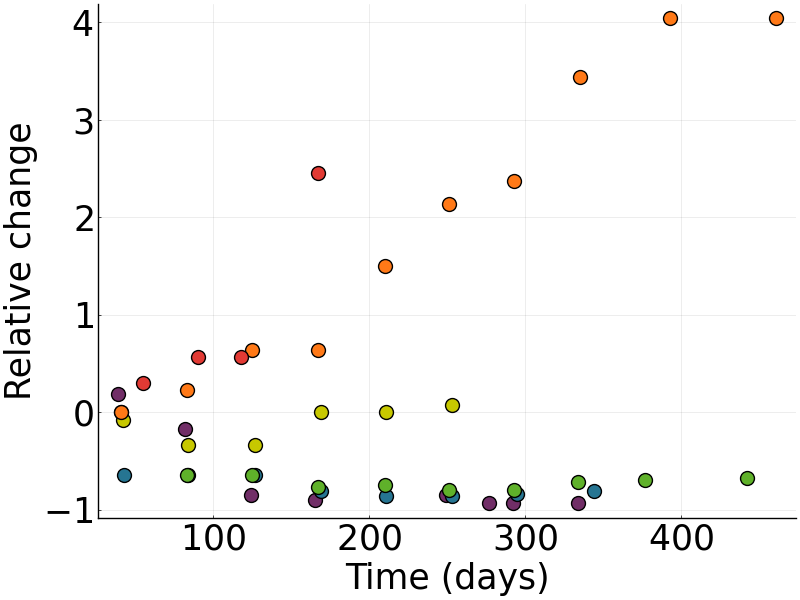

In [81]:
#plot tumor data relative change
scatter()
scatter!(time_1, tumor_1, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color1, color1],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_2, tumor_2, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color2, color2],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_3, tumor_3, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color3, color3],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_4, tumor_4, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color4, color4],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_5, tumor_5, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color5, color5],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_6, tumor_6, markersize = 10, size =(1600/2,600), font = "Ariel", color_palette = palette([color6, color6],2), legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

## Model

In [82]:
#define model without delay
function ode_system(du,u,p,t)
    C,Mₘ,NK,T = u
    α₁₄, α₁₇, α₇ = p 
   
# Cancer cells (tumor)
    du[1] = α₇*C*log(abs(α₈/C)) - α₉*C*NK - α₁₀*C*T - α₁₁*C #log(abs(α₈/C))
 # MDSC 
    du[2] = α₁ + α₂*C/(γ₁+(C^n)) - α₃*Mₘ 
 # NK cells
    du[3] = α₁₂ + α₁₃*(C^2)/(γ₂+(C^2)) - α₁₄*Mₘ*NK - α₁₆*NK 
 # T cells
    du[4] = α₁₇*C*NK + α₁₈*(C^2)/(γ₃+(C^2)) - α₁₉*Mₘ*T - α₂₁*T 
end

ode_system (generic function with 1 method)

In [83]:
#set numerical solution algorithm
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5, NLFunctional{Rational{Int64}, Rational{Int64}}, false}(Tsit5(), NLFunctional{Rational{Int64}, Rational{Int64}}(1//100, 1//5, 10))

In [84]:
#define condition for simulation to end
function condition(u,t,integrator) 
  u[1] < 0.0 || u[2] < 0.0 || u[3] < 0.0 || u[4] < 0.0
end

floor_event = DiscreteCallback(condition, terminate!)

DiscreteCallback{typeof(condition), typeof(terminate!), typeof(DiffEqBase.INITIALIZE_DEFAULT), typeof(DiffEqBase.FINALIZE_DEFAULT)}(condition, SciMLBase.terminate!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

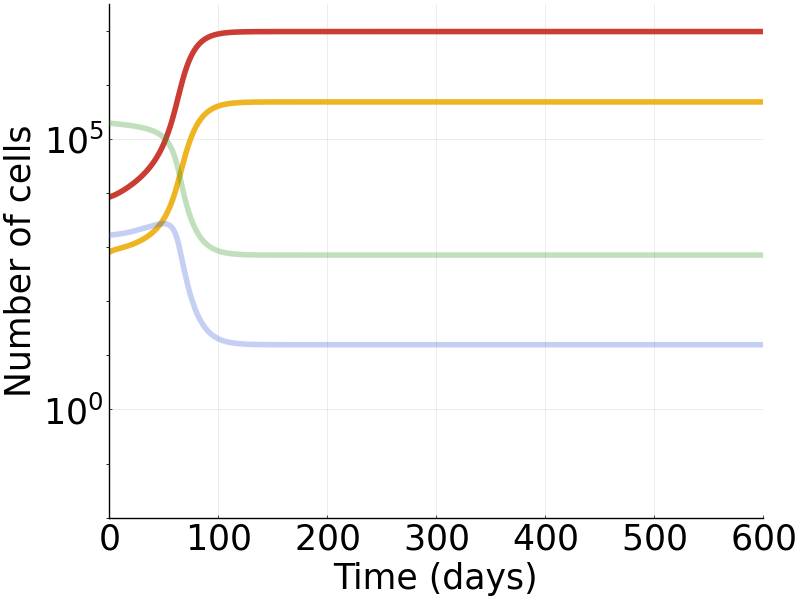

In [85]:
#set model parameters
n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₇ = 10.0^(-1.0) #tumor growth rate
α₈ = 10.0^7.0 #tumor maximum size 
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₄ = 4*(10.0^(-5.0)) #4*(10.0^(-5.0)) #NK cells inactivation rate by M-MDSCs
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #(10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁₄, α₁₇, α₇) 

tspan = (0.0,600.0)
u0 = [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226] #100

prob1 = ODEProblem(ode_system,u0,tspan,p)
sol = solve(prob1,alg,saveat=0.1,callback=floor_event)
plot(sol, lw = 4, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [1 1 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)

In [86]:
sol

retcode: Success
Interpolation: 1st order linear
t: 6001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 598.9
 599.0
 599.1
 599.2
 599.3
 599.4
 599.5
 599.6
 599.7
 599.8
 599.9
 600.0
u: 6001-element Vector{Vector{Float64}}:
 [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226]
 [8409.322769759292, 806.3689447928673, 197515.62561503315, 1656.0451022156317]
 [8423.310448374805, 808.635158137783, 197464.07266011802, 1657.6435846504921]
 [8437.335287298156, 810.8703643080235, 197411.12639749824, 1659.2143607493174]
 [8451.401343192872, 813.0752158872804, 197356.82223281093, 1660.7580832581473]
 [8465.512475445648, 815.25035630204, 197301.1945533594, 1662.2754096788485]
 [8479.672443673388, 817.3964203029312, 197244.27705712392, 1663.7669929953026]
 [8493.884911492849, 819.5140339769426, 197186.1027652246, 1665.233481314969]
 [8508.153446520653, 821.6038147474236, 197126.70402192144, 166

## Fitting

In [87]:
Threads.nthreads()

10

In [88]:
#set model parameters
α₈ = 10.0^(5.0)
α₈

100000.0

In [90]:
time_to_fit1 = time_1
tumor_to_fit1 = tumor_1
tumor_curve_fit1 = zeros(length(tumor_to_fit1))
for i = 1:convert(Int64, length(tumor_to_fit1))
    tumor_curve_fit1[i] = tumor_to_fit1[i].*u0[1]+u0[1]
end

In [91]:
#fit tumor 1
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit1))
        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit1.+1), prob1) 

@time chain1 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

141.311975 seconds (7.93 G allocations: 357.070 GiB, 46.20% gc time, 1.61% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 139.14 seconds
Compute duration  = 517.96 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0001    0.0000     0.0000    0.0000   168.1063    1.0349     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   603.2183    1.0121     ⋯
          α₇    0.1788    0.0622     0.0007    0.0033   237.2295    1.0216     ⋯
           σ    1.2494    0.3697     0.0041    0.0150   518.4695    1.0081     ⋯
                                                      

In [92]:
time_to_fit2 = time_2
tumor_to_fit2 = tumor_2
tumor_curve_fit2 = zeros(length(tumor_to_fit2))
for i = 1:convert(Int64, length(tumor_to_fit2))
    tumor_curve_fit2[i] = tumor_to_fit2[i].*u0[1]+u0[1]
end

In [93]:
#fit tumor 2
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit2,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit2)) 
        data[i] ~ Normal(log.(predicted[i][1].+1), σ)
    end

end

model = fitlv(log.(tumor_curve_fit2.+1), prob1) 

@time chain2 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

136.289426 seconds (7.57 G allocations: 340.968 GiB, 46.22% gc time, 6.88% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 134.26 seconds
Compute duration  = 491.96 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0000    0.0000     0.0000    0.0000    82.0227    1.0727     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   193.0018    1.0216     ⋯
          α₇    0.2160    0.0496     0.0006    0.0035   112.9700    1.0525     ⋯
           σ    0.6375    0.1917     0.0021    0.0062   783.1029    1.0048     ⋯
                                                      

In [94]:
time_to_fit3 = time_3
tumor_to_fit3 = tumor_3
tumor_curve_fit3 = zeros(length(tumor_to_fit3))
for i = 1:convert(Int64, length(tumor_to_fit3))
    tumor_curve_fit3[i] = tumor_to_fit3[i].*u0[1]+u0[1]
end

In [95]:
#fit tumor 3
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit3,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    

    for i = 1:min(length(predicted),length(tumor_curve_fit3))
        data[i] ~ Normal(log.(predicted[i][1].+1), σ)
    end

end

model = fitlv(log.(tumor_curve_fit3.+1), prob1) 

@time chain3 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

164.729736 seconds (8.77 G allocations: 395.204 GiB, 45.95% gc time, 5.46% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 162.56 seconds
Compute duration  = 588.36 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0000    0.0000     0.0000    0.0000    67.7877    1.0432     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   428.9738    1.0161     ⋯
          α₇    0.2511    0.0487     0.0005    0.0034    83.0623    1.0388     ⋯
           σ    0.5809    0.1637     0.0018    0.0070   544.6715    1.0110     ⋯
                                                      

In [96]:
time_to_fit4 = time_4
tumor_to_fit4 = tumor_4
tumor_curve_fit4 = zeros(length(tumor_to_fit4))
for i = 1:convert(Int64, length(tumor_to_fit4))
    tumor_curve_fit4[i] = tumor_to_fit4[i].*u0[1]+u0[1]
end

In [97]:
#fit tumor 4
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit4,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    

    for i = 1:min(length(predicted),length(tumor_curve_fit4))
        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit4.+1), prob1) 

@time chain4 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

197.889792 seconds (10.19 G allocations: 458.256 GiB, 44.49% gc time, 0.34% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 195.75 seconds
Compute duration  = 663.08 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0000    0.0000     0.0000    0.0000   102.0726    1.0279     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   262.2693    1.0079     ⋯
          α₇    0.2818    0.0872     0.0010    0.0056   130.6043    1.0214     ⋯
           σ    0.6122    0.2490     0.0028    0.0108   394.2230    1.0075     ⋯
                                                      

In [98]:
time_to_fit5 = time_5
tumor_to_fit5 = tumor_5
tumor_curve_fit5 = zeros(length(tumor_to_fit5))
for i = 1:convert(Int64, length(tumor_to_fit5))
    tumor_curve_fit5[i] = tumor_to_fit5[i].*u0[1]+u0[1]
end

In [99]:
#fit tumor 5
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit5,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit5)) 
        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit5.+1), prob1) 

@time chain5 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

434.151509 seconds (22.52 G allocations: 1011.079 GiB, 45.83% gc time, 2.08% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 432.09 seconds
Compute duration  = 1429.54 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000   20.2392    1.9063      ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   38.6983    1.1808      ⋯
          α₇    0.1648    0.0900     0.0010    0.0085   27.7388    1.4115      ⋯
           σ    0.4900    0.1621     0.0018    0.0154   25.4963    1.5241      ⋯
                                                     

In [100]:
time_to_fit6 = time_6
tumor_to_fit6 = tumor_6
tumor_curve_fit6 = zeros(length(tumor_to_fit6))
for i = 1:convert(Int64, length(tumor_to_fit6))
    tumor_curve_fit6[i] = tumor_to_fit6[i].*u0[1]+u0[1]
end

In [101]:
#fit tumor 6
Turing.setadbackend(:forwarddiff)

@model function fitlv(data, prob1)
    
    α₁₄ ~ truncated(Normal(4.0*10.0^(-5.0),10.0^(-4.0)),0.0,10.0^(-2.0))
    α₁₇ ~ truncated(Normal(1.1*(10.0^(-7.0)),(10.0^(-6.0))),0.0,10.0^(-2.0))
    α₇ ~ truncated(Normal(10.0^(-1.0),3.0*10.0^(-1.0)),0.0,1.0)
    σ ~ InverseGamma(2, 3) 


    p = [α₁₄, α₁₇, α₇] 
    prob = remake(prob1, p=p)
    predicted = solve(prob,Tsit5(),saveat=time_to_fit6,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    

    for i = 1:min(length(predicted),length(tumor_curve_fit6)) 
        data[i] ~ Normal(log.(predicted[i][1].+1), σ) 
    end

end

model = fitlv(log.(tumor_curve_fit6.+1), prob1) 

@time chain6 = sample(model, NUTS(0.65), MCMCThreads(), 2000, 4, progress=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/jessekreger/.julia/packages/AdvancedHMC/kB7Xa/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

205.635455 seconds (11.48 G allocations: 515.491 GiB, 48.24% gc time, 1.54% compilation time)


Chains MCMC chain (2000×16×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 203.54 seconds
Compute duration  = 753.87 seconds
parameters        = α₁₇, σ, α₁₄, α₇
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

         α₁₄    0.0001    0.0001     0.0000    0.0000    63.8924    1.0987     ⋯
         α₁₇    0.0000    0.0000     0.0000    0.0000   187.1751    1.0418     ⋯
          α₇    0.2938    0.1424     0.0016    0.0088    92.8733    1.0737     ⋯
           σ    0.9697    0.5379     0.0060    0.0240   324.8998    1.0217     ⋯
                                                      

In [102]:
chain_array1 = Array(chain1)

8000×4 Matrix{Float64}:
 1.82489e-5   1.68686e-6  0.244336   1.77781
 7.65434e-6   2.09193e-7  0.231019   1.21527
 7.58528e-6   1.74226e-6  0.291978   1.39485
 9.67143e-7   8.78992e-7  0.249382   0.973163
 1.02477e-5   1.26303e-6  0.172911   2.25416
 9.36574e-7   6.26205e-7  0.253868   1.74452
 4.93362e-5   1.49779e-6  0.175181   1.09725
 1.97573e-5   1.32163e-6  0.21126    0.945166
 7.91402e-5   4.85456e-7  0.130607   1.4024
 7.91402e-5   4.85456e-7  0.130607   1.4024
 6.71558e-5   1.43704e-7  0.163351   1.76774
 3.39088e-5   1.65149e-7  0.156448   1.67151
 4.49275e-5   9.62731e-8  0.17654    1.60098
 ⋮                                   
 0.000145701  8.44318e-7  0.0909387  1.17319
 0.000145701  8.44318e-7  0.0909387  1.17319
 0.000145701  8.44318e-7  0.0909387  1.17319
 0.000145701  8.44318e-7  0.0909387  1.17319
 0.000147243  9.92814e-7  0.0862407  1.07144
 0.000147243  9.92814e-7  0.0862407  1.07144
 0.000147243  9.92814e-7  0.0862407  1.07144
 0.000147243  9.92814e-7  0.0862407  1

In [103]:
chain_array2 = Array(chain2)

8000×4 Matrix{Float64}:
 6.98169e-6  4.28815e-7  0.306481  1.02387
 4.77318e-6  2.45651e-7  0.250686  0.866051
 5.40735e-6  6.2533e-7   0.293377  0.763752
 1.09444e-5  3.83873e-7  0.234713  0.809801
 1.1466e-5   7.71928e-8  0.231823  0.766724
 9.56652e-7  1.84998e-6  0.283319  0.53141
 1.7573e-7   7.73047e-7  0.292865  0.47174
 2.23657e-7  1.58257e-6  0.287693  0.451584
 1.6552e-7   1.75475e-6  0.29974   0.448845
 5.21592e-7  9.38905e-7  0.285606  0.392775
 5.73343e-7  1.62942e-6  0.2884    0.347649
 3.8343e-7   8.19265e-7  0.275957  0.365886
 7.60293e-7  4.64361e-7  0.278016  0.345306
 ⋮                                 
 1.25912e-5  1.02265e-6  0.234925  1.15555
 1.96994e-6  1.88435e-7  0.262932  0.72358
 2.03598e-6  9.20947e-7  0.286772  0.907702
 2.49722e-6  8.96831e-7  0.264967  1.03105
 9.2061e-7   9.39986e-7  0.335517  0.900551
 1.01207e-6  6.6844e-7   0.277079  0.902454
 1.11913e-6  7.50256e-7  0.308313  0.831365
 5.58866e-6  5.42263e-7  0.298144  0.659872
 2.54243e-6  6.36498e-

In [104]:
chain_array3 = Array(chain3)

8000×4 Matrix{Float64}:
 1.97e-6     3.34205e-7  0.321034  0.702122
 2.72647e-6  5.65698e-7  0.345274  0.663201
 3.59097e-6  1.12872e-6  0.283232  0.489813
 3.5884e-6   9.58817e-7  0.299068  0.51344
 2.2299e-6   6.96256e-7  0.312436  0.600686
 1.31009e-6  7.41128e-7  0.32108   0.422232
 6.01597e-6  1.82851e-6  0.301075  0.35394
 9.68239e-7  2.29349e-7  0.321495  0.324322
 1.0769e-6   1.84123e-7  0.31704   0.381346
 1.96377e-5  5.23329e-8  0.270031  0.649914
 9.46479e-6  5.01853e-7  0.302909  0.509466
 5.71489e-6  5.32217e-7  0.282227  0.501917
 1.49646e-5  1.93488e-6  0.28186   0.504769
 ⋮                                 
 3.30447e-5  1.8062e-6   0.222306  0.705339
 3.30447e-5  1.8062e-6   0.222306  0.705339
 3.45806e-5  3.31277e-6  0.213374  0.749185
 2.69975e-5  2.47858e-6  0.226397  0.774754
 2.74292e-5  2.02653e-6  0.225824  0.751393
 2.61256e-5  1.81215e-6  0.230933  0.758507
 2.3591e-5   9.12949e-7  0.234884  0.624133
 2.38951e-5  1.46507e-6  0.243663  0.678199
 2.53755e-5  1.390

In [105]:
chain_array4 = Array(chain4)

8000×4 Matrix{Float64}:
 1.0093e-5    3.85147e-7  0.405427  0.652356
 6.1804e-6    7.85815e-7  0.381966  0.590334
 2.85454e-6   1.47938e-7  0.39358   0.417948
 3.46292e-6   1.78107e-7  0.438948  0.403588
 1.67297e-5   9.49538e-7  0.356795  0.490785
 1.22523e-5   1.14649e-6  0.34168   0.439021
 1.42157e-5   9.37739e-7  0.376011  0.505472
 6.45793e-6   1.05295e-6  0.361514  0.658236
 4.69061e-6   1.53305e-6  0.445048  0.530447
 5.29723e-6   1.59651e-6  0.434347  0.507132
 7.7602e-6    6.09765e-7  0.360412  0.449016
 1.46253e-5   1.98191e-7  0.331789  0.542525
 1.52029e-6   5.06177e-7  0.424259  0.508662
 ⋮                                  
 0.000140202  1.30923e-7  0.119258  0.760439
 0.000140202  1.30923e-7  0.119258  0.760439
 0.000131641  1.03586e-7  0.123861  0.903347
 0.000141177  1.01875e-7  0.122319  0.859347
 0.000141177  1.01875e-7  0.122319  0.859347
 0.000130842  8.67072e-8  0.117178  0.838151
 0.000121273  7.70903e-8  0.120386  0.751409
 0.000134222  8.48752e-8  0.117697  0.7

In [106]:
chain_array5 = Array(chain5)

8000×4 Matrix{Float64}:
 4.48874e-5   4.12653e-7  0.283056   0.580858
 4.16638e-5   4.34093e-7  0.272731   0.55939
 4.94657e-5   4.41128e-7  0.288897   0.496542
 5.01998e-5   4.46702e-7  0.285316   0.482944
 4.95164e-5   4.5535e-7   0.260065   0.484344
 5.25277e-5   4.5502e-7   0.247343   0.494577
 4.18393e-5   3.3922e-7   0.30072    0.535867
 3.47884e-5   5.09931e-7  0.379563   0.54231
 4.77775e-5   7.42831e-7  0.298026   0.943483
 3.7303e-5    3.42355e-7  0.343502   0.583937
 4.23062e-5   4.26316e-7  0.31809    0.577868
 2.3559e-5    5.16686e-7  0.390674   0.546407
 2.44113e-5   4.75951e-7  0.42027    0.524978
 ⋮                                   
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.33345e-7  0.0980964  0.250633
 0.000195117  2.3334

In [107]:
chain_array6 = Array(chain6)

8000×4 Matrix{Float64}:
 3.24454e-6  5.58073e-7  0.573798  0.942316
 1.50112e-5  1.90203e-7  0.420965  1.04447
 7.15424e-6  1.73393e-7  0.605045  1.00739
 4.84592e-5  5.81047e-7  0.31823   0.883627
 4.84592e-5  5.81047e-7  0.31823   0.883627
 1.5035e-5   8.21666e-7  0.454419  0.850569
 1.75894e-5  8.59691e-7  0.464845  0.855388
 2.1001e-5   1.73055e-6  0.332372  0.742802
 4.08564e-5  1.71219e-6  0.323389  1.11114
 2.7128e-5   1.96952e-6  0.321554  1.16241
 1.24279e-5  1.67577e-6  0.457345  1.09712
 3.6067e-5   1.29884e-6  0.35979   1.51803
 7.4925e-5   1.34812e-6  0.395692  1.86672
 ⋮                                 
 2.44656e-5  4.63746e-7  0.406628  1.07385
 1.79377e-5  1.39112e-6  0.45366   0.485564
 1.3288e-5   1.73599e-6  0.417596  0.559032
 7.55792e-6  8.05313e-7  0.546553  1.64014
 2.94585e-5  1.07684e-6  0.452081  1.34377
 1.00133e-5  1.32244e-7  0.404895  1.12444
 1.13594e-5  1.29024e-7  0.431861  1.07564
 1.07629e-5  1.03202e-7  0.623142  0.654831
 2.28063e-5  1.78684e-7  0.8

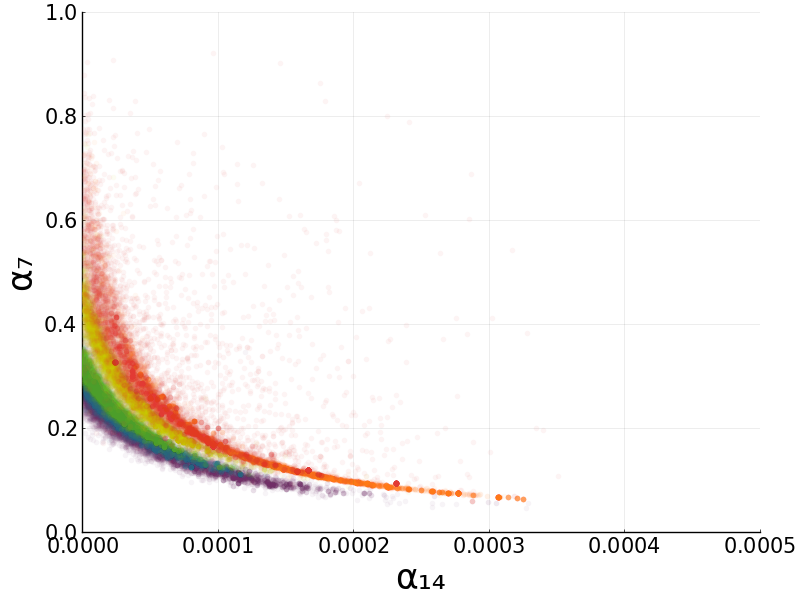

In [109]:
#plot joint posterior
scatter()
scatter!(chain_array1[:,1], chain_array1[:,3], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,1], chain_array2[:,3], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,1], chain_array3[:,3], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,1], chain_array4[:,3], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,1], chain_array5[:,3], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,1], chain_array6[:,3], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

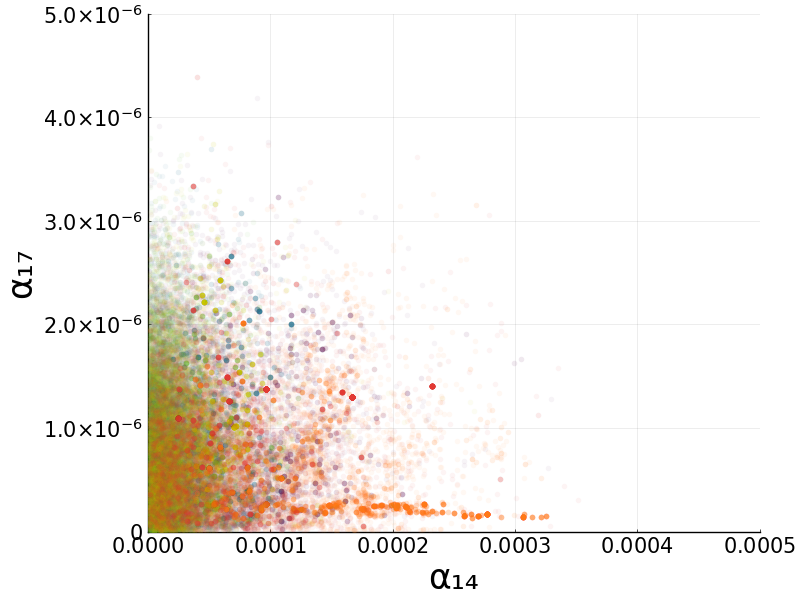

In [110]:
#plot joint posterior
scatter()
scatter!(chain_array1[:,1], chain_array1[:,2], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,1], chain_array2[:,2], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,1], chain_array3[:,2], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,1], chain_array4[:,2], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,1], chain_array5[:,2], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,1], chain_array6[:,2], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0, 0.0005), ylims = (0,5*10^(-6)), xlab = "α₁₄", ylab = "α₁₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

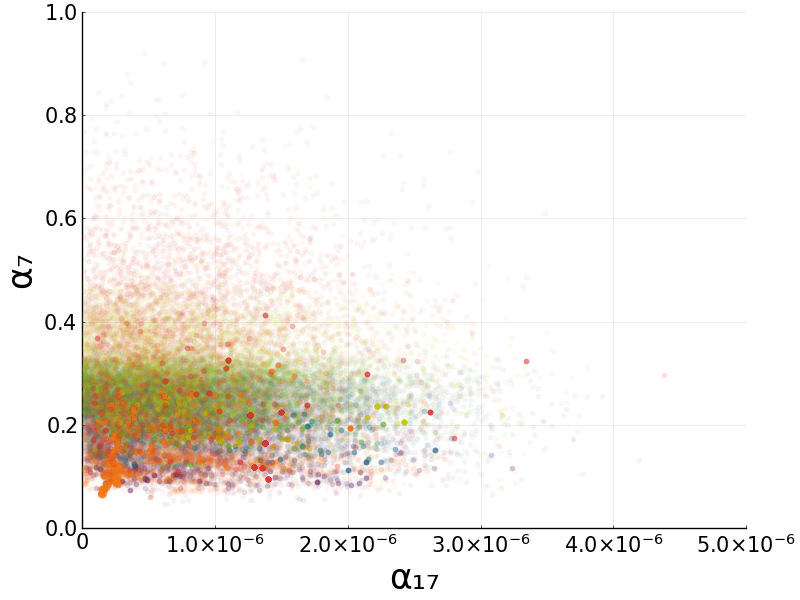

In [111]:
#plot joint posterior
scatter()
scatter!(chain_array1[:,2], chain_array1[:,3], markercolor = palette([color1, color1],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array2[:,2], chain_array2[:,3], markercolor = palette([color2, color2],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array3[:,2], chain_array3[:,3], markercolor = palette([color3, color3],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array4[:,2], chain_array4[:,3], markercolor = palette([color4, color4],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array5[:,2], chain_array5[:,3], markercolor = palette([color5, color5],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
scatter!(chain_array6[:,2], chain_array6[:,3], markercolor = palette([color6, color6],2), markerstrokewidth = 0, markeralpha = 0.05, xlims = (0,5*10^(-6)), ylims = (0,1), xlab = "α₁₇", ylab = "α₇", legend = :false, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

In [1]:
#kernel density estimation
kernel1 = kde((chain_array1[:,1], chain_array1[:,3]))
kernel2 = kde((chain_array2[:,1], chain_array2[:,3]))
kernel3 = kde((chain_array3[:,1], chain_array3[:,3]))
kernel4 = kde((chain_array4[:,1], chain_array4[:,3]))
kernel5 = kde((chain_array5[:,1], chain_array5[:,3]))
kernel6 = kde((chain_array6[:,1], chain_array6[:,3]))

LoadError: UndefVarError: chain_array1 not defined

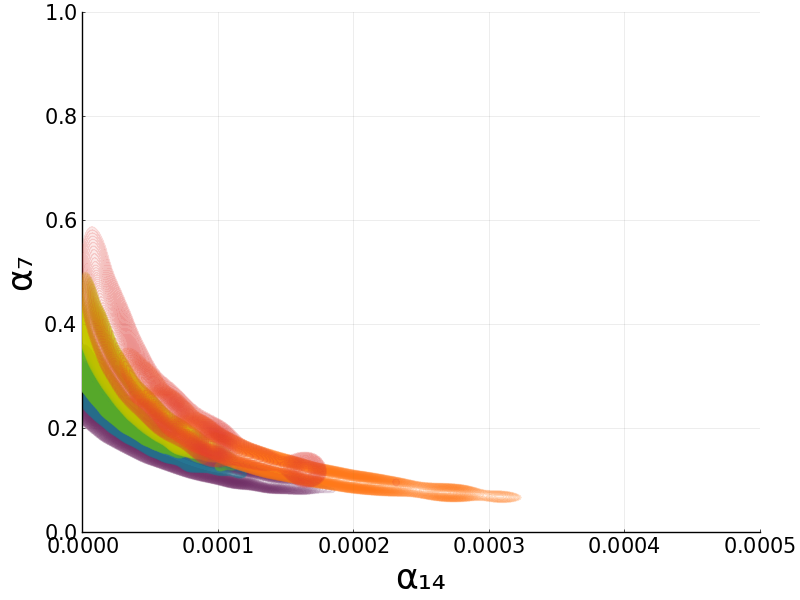

In [447]:
#plot kernel density estimation
contourf()
contourf!(kernel1, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color1, color1],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", colorbar = false, legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel2, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color2, color2],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel3, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color3, color3],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel4, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color4, color4],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel5, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color5, color5],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel6, alpha = 0.1, levels = 1.5*10^4:10^3:10^6, mode = :relative, color = palette([color6, color6],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

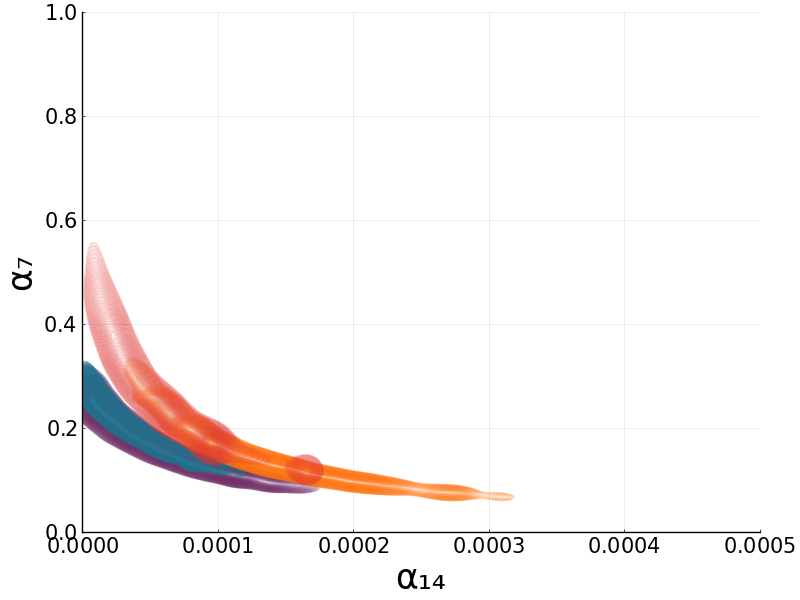

In [117]:
#plot kernel density estimation
contourf()
contourf!(kernel1, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color1, color1],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", colorbar = false, legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel2, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color2, color2],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel5, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color5, color5],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)
contourf!(kernel6, alpha = 0.1, levels = 2*10^4:10^3:10^6, mode = :relative, color = palette([color6, color6],2), xlims = (0, 0.0005), ylims = (0,1), xlab = "α₁₄", ylab = "α₇", legend = :none, size = (1600/2,600), font = "Ariel", xtickfontsize=15,ytickfontsize=15,xguidefontsize=25,yguidefontsize=25,titlefontsize=25)

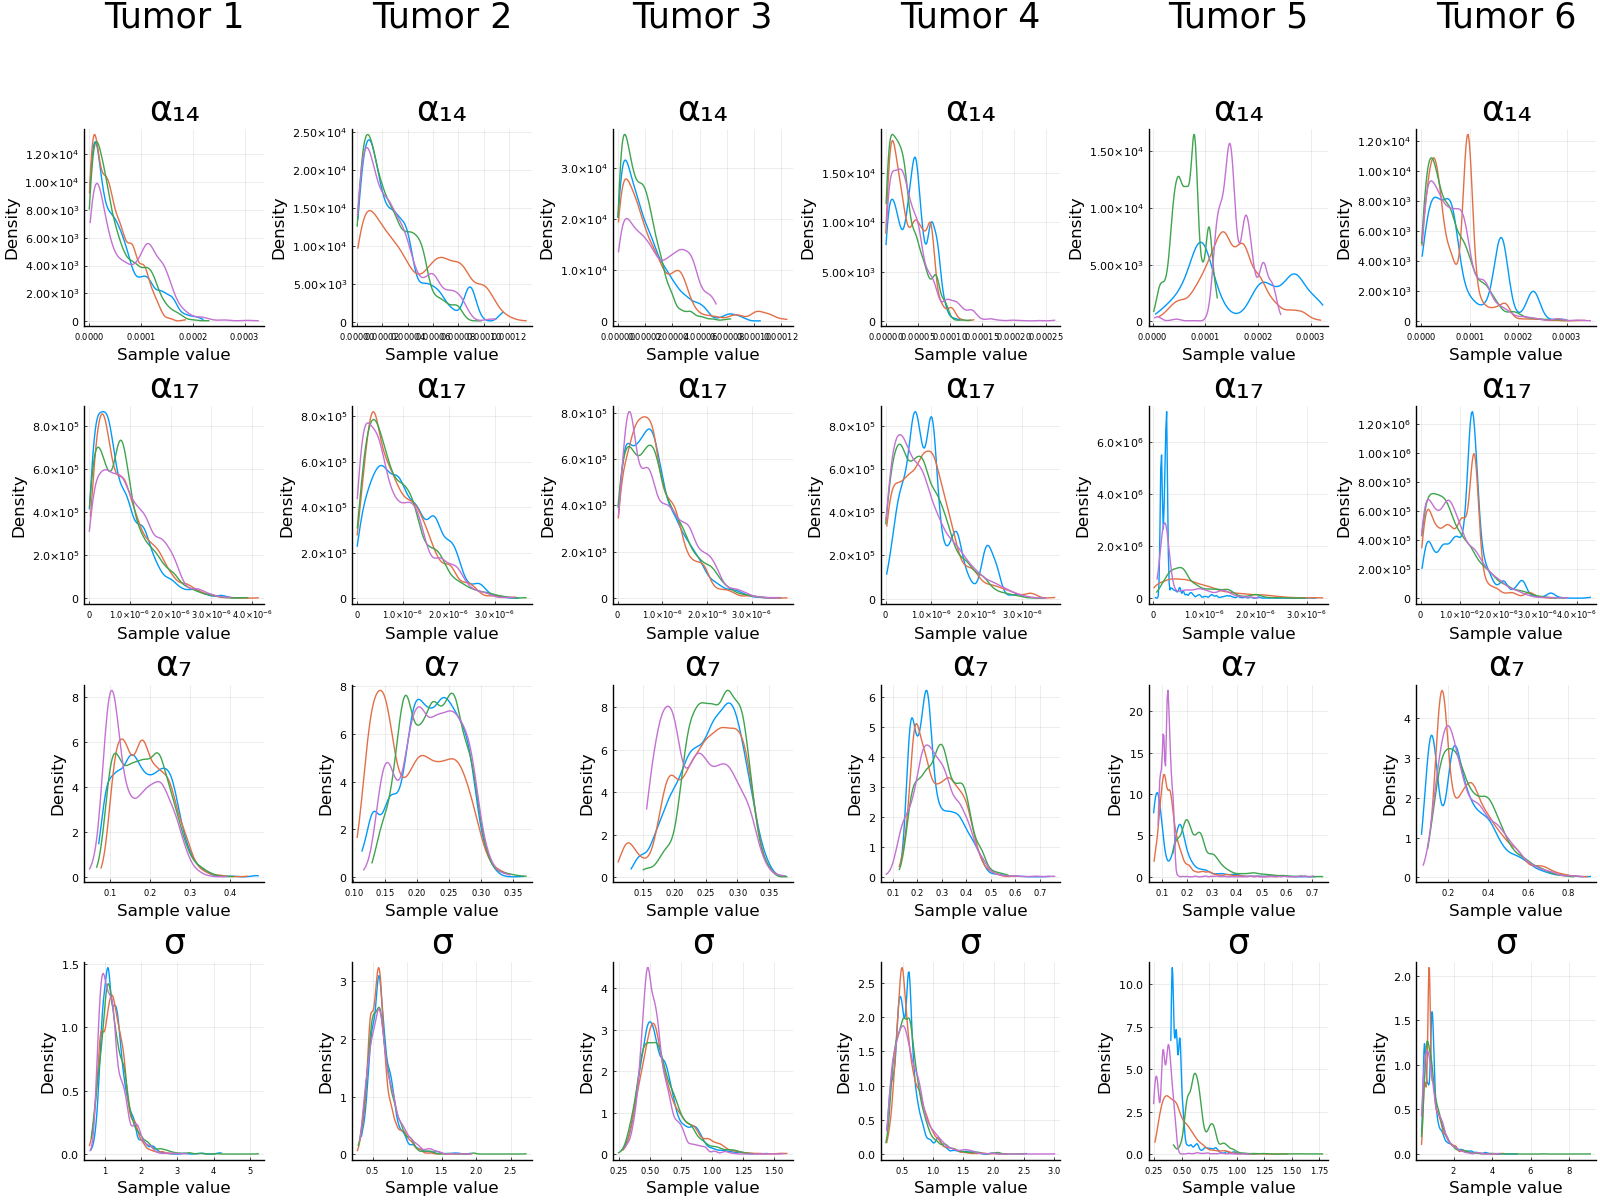

In [120]:
#plot MCMCs
l = @layout [a b c d e f]
a = mixeddensity(chain1, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 1", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
b = mixeddensity(chain2, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 2", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
c = mixeddensity(chain3, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 3", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
d = mixeddensity(chain4, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 4", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
e = mixeddensity(chain5, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 5", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
f = mixeddensity(chain6, size = (1600/2/2,600), font = "Ariel", plot_title="Tumor 6", xtickfontsize=6,ytickfontsize=8,xguidefontsize=12,yguidefontsize=12,titlefontsize=25)
plot(a, b, c, d, e, f, layout = l, size =(1600,1200), plot_title ="", titlefontsize=25)

In [121]:
#plot
plot()

n = 1.0

α₁ = 10.0*(10.0^1.0) #M-MDSCs production rate
α₂ = (10.0^8.0) #M-MDSCs expansion coefficient 
α₃ = 0.2 #M-MDSCs death rate

α₈ = 10.0^(5.0) #tumor maximum size
α₉ = 3.5*(10.0^(-6.0)) #tumor cells kill rate by NK cells
α₁₀ = 1.1*(10.0^(-7.0)) #tumor cells kill rate by T cells
α₁₁ = 0.0 #tumor cell death rate

α₁₂ = 1.4*(10.0^4.0) #NK cells production rate
α₁₃ = 2.5*(10.0^(-2.0)) #NK cells expansion coefficient
α₁₆ = 4.12*(10.0^(-2.0)) #NK cells death rate

α₁₇ = 1.1*(10.0^(-7.0)) #CTL stimulation as a result of tumor-NK cell interaction
α₁₈ = 10.0^(-1.0) #CTL expansion coefficient 
α₁₉ = (10.0^(-4.0)) #(10.0^(-4.0)) #CTL inactivation rate by M-MDSCs
α₂₁ = 2.0*(10.0^(-2.0)) #CTL death rate

γ₁ = (10.0^(10.0)) #steepness coefficient of MDSC production curve
γ₂ = 2.02*(10.0^(7.0)) #steepness coefficient of NK production curve
γ₃ = 2.02*(10.0^(7.0)) #steepness coefficient of CTL production curve

p = (α₁₄, α₁₇, α₇) 

u0 = [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226] #100

α₁₄ = mean(chain_array1[:,1]) 
α₁₇ = mean(chain_array1[:,2]) 
α₇ = mean(chain_array1[:,3]) 
tspan = (0.0,last(time_to_fit1)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth1 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array2[:,1]) 
α₁₇ = mean(chain_array2[:,2]) 
α₇ = mean(chain_array2[:,3]) 
tspan = (0.0,last(time_to_fit2)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth2 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array3[:,1]) 
α₁₇ = mean(chain_array3[:,2]) 
α₇ = mean(chain_array3[:,3]) 
tspan = (0.0,last(time_to_fit3)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth3 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array4[:,1]) 
α₁₇ = mean(chain_array4[:,2]) 
α₇ = mean(chain_array4[:,3]) 
tspan = (0.0,last(time_to_fit4)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth4 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array5[:,1]) 
α₁₇ = mean(chain_array5[:,2]) 
α₇ = mean(chain_array5[:,3])
tspan = (0.0,last(time_to_fit5)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth5 = solve(probplot,alg,saveat=0.1,callback=floor_event)

α₁₄ = mean(chain_array6[:,1]) 
α₁₇ = mean(chain_array6[:,2]) 
α₇ = mean(chain_array6[:,3]) 
tspan = (0.0,last(time_to_fit6)+20)
p = (α₁₄, α₁₇, α₇)
probplot = ODEProblem(ode_system,u0,tspan,p)
solplotsmooth6 = solve(probplot,alg,saveat=0.1,callback=floor_event)

retcode: Success
Interpolation: 1st order linear
t: 1871-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 185.9
 186.0
 186.1
 186.2
 186.3
 186.4
 186.5
 186.6
 186.7
 186.8
 186.9
 187.0
u: 1871-element Vector{Vector{Float64}}:
 [8395.368084462818, 804.0710624094437, 197565.74910954377, 1654.4182572290226]
 [8426.20812536036, 806.3772784326103, 197063.17059449188, 1792.944317945964]
 [8457.714319730381, 808.6686954413157, 196562.32709183157, 1930.2213072552554]
 [8489.872225882193, 810.9462588170163, 196063.23682841, 2066.2662980478312]
 [8522.667813911958, 813.2108782079254, 195565.91620204944, 2201.0959640894857]
 [8556.08740422752, 815.463433813282, 195070.38019398152, 2334.7266303587826]
 [8590.117666469017, 817.7047765013915, 194576.6423765242, 2467.1742740283394]
 [8624.745619508873, 819.9357278096254, 194084.71491308152, 2598.454524464834]
 [8659.95863145179, 822.1570799444218, 193594.60855814387, 2728.58

In [122]:
time_to_fit_plot1 = append!([0.0],time_to_fit1) 
tumor_to_fit_plot1 = append!([0.0],tumor_to_fit1)

time_to_fit_plot2 = append!([0.0],time_to_fit2) 
tumor_to_fit_plot2 = append!([0.0],tumor_to_fit2) 

time_to_fit_plot3 = append!([0.0],time_to_fit3) 
tumor_to_fit_plot3 = append!([0.0],tumor_to_fit3) 

time_to_fit_plot4 = append!([0.0],time_to_fit4) 
tumor_to_fit_plot4 = append!([0.0],tumor_to_fit4) 

time_to_fit_plot5 = append!([0.0],time_to_fit5) 
tumor_to_fit_plot5 = append!([0.0],tumor_to_fit5) 

time_to_fit_plot6 = append!([0.0],time_to_fit6) 
tumor_to_fit_plot6 = append!([0.0],tumor_to_fit6) 

5-element Vector{Float64}:
 0.0
 0.30583470637805477
 0.5721886123234432
 0.5721886123234432
 2.4541109587835033

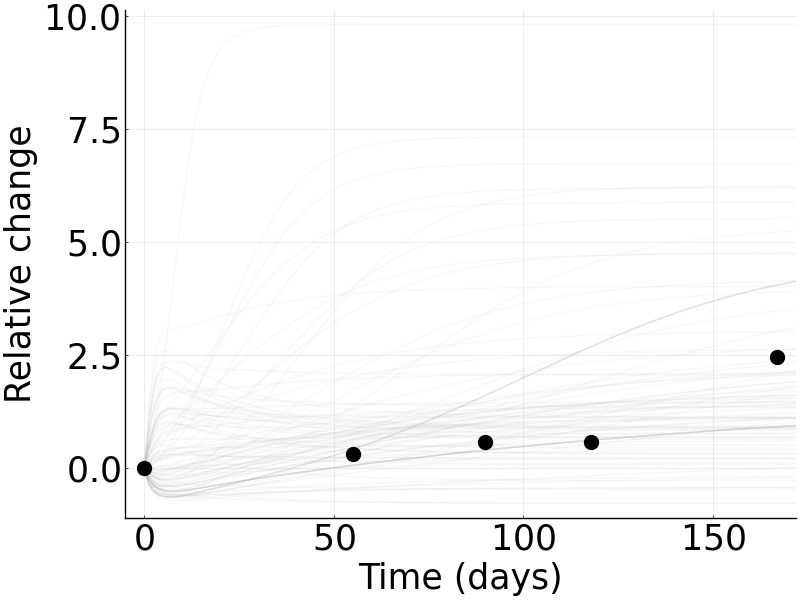

In [123]:
#plot fits
fig_layout = @layout [a b; c d; e f; g h; i j; k l]

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth1, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit1, tumor_curve_fit1, markersize = 15, color = "Black")
a = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
b = scatter!(time_to_fit_plot1, tumor_to_fit_plot1, markersize = 10, xlims = (-5,last(time_to_fit_plot1)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth2, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit2, tumor_curve_fit2, markersize = 15, color = "Black")
c = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
d = scatter!(time_to_fit_plot2, tumor_to_fit_plot2, markersize = 10, xlims = (-5,last(time_to_fit_plot2)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth3, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit3, tumor_curve_fit3, markersize = 15, color = "Black")
e = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
f = scatter!(time_to_fit_plot3, tumor_to_fit_plot3, markersize = 10, xlims = (-5,last(time_to_fit_plot3)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth4, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit4, tumor_curve_fit4, markersize = 15, color = "Black")
g = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
h = scatter!(time_to_fit_plot4, tumor_to_fit_plot4, markersize = 10, xlims = (-5,last(time_to_fit_plot4)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth5, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit5, tumor_curve_fit5, markersize = 15, color = "Black")
i = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
j = scatter!(time_to_fit_plot5, tumor_to_fit_plot5, markersize = 10, xlims = (-5,last(time_to_fit_plot5)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
plot!(solplotsmooth6, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
scatter!(time_to_fit6, tumor_curve_fit6, markersize = 15, color = "Black")
k = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
l = scatter!(time_to_fit_plot6, tumor_to_fit_plot6, markersize = 10, xlims = (-5,last(time_to_fit_plot6)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

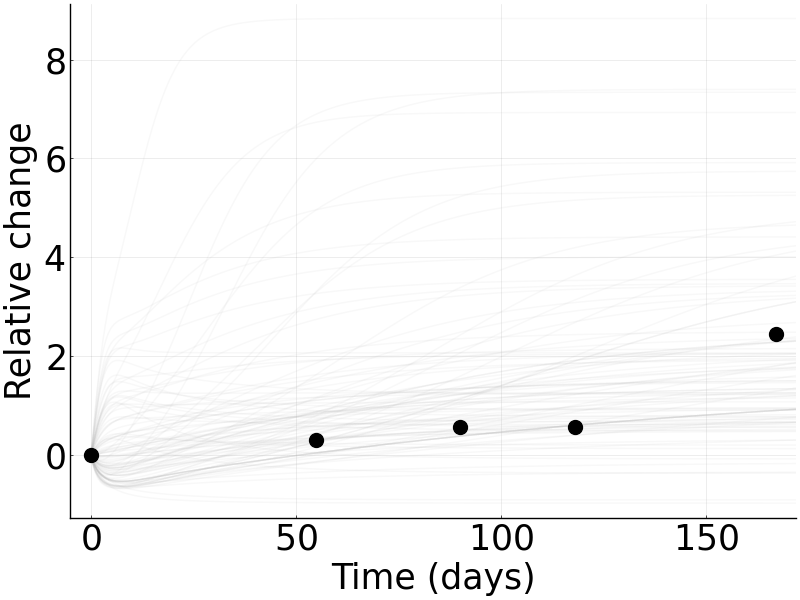

In [124]:
#plot fits without relative number of cells data
fig_layout = @layout [a b; c d; e f; g h; i j; k l]

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
a = plot!(solplotsmooth1, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit1, tumor_curve_fit1, markersize = 15, color = "Black")
#a = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array1[rand(1:length(chain_array1[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
b = scatter!(time_to_fit_plot1, tumor_to_fit_plot1, markersize = 10, xlims = (-5,last(time_to_fit_plot1)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
c = plot!(solplotsmooth2, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit2, tumor_curve_fit2, markersize = 15, color = "Black")
#c = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array2[rand(1:length(chain_array2[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
d = scatter!(time_to_fit_plot2, tumor_to_fit_plot2, markersize = 10, xlims = (-5,last(time_to_fit_plot2)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
e = plot!(solplotsmooth3, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit3, tumor_curve_fit3, markersize = 15, color = "Black")
#e = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array3[rand(1:length(chain_array3[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
f = scatter!(time_to_fit_plot3, tumor_to_fit_plot3, markersize = 10, xlims = (-5,last(time_to_fit_plot3)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
g = plot!(solplotsmooth4, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit4, tumor_curve_fit4, markersize = 15, color = "Black")
#g = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array4[rand(1:length(chain_array4[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
h = scatter!(time_to_fit_plot4, tumor_to_fit_plot4, markersize = 10, xlims = (-5,last(time_to_fit_plot4)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
i = plot!(solplotsmooth5, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit5, tumor_curve_fit5, markersize = 15, color = "Black")
#i = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array5[rand(1:length(chain_array5[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
j = scatter!(time_to_fit_plot5, tumor_to_fit_plot5, markersize = 10, xlims = (-5,last(time_to_fit_plot5)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

plot()
for k in 1:100
    resol = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u))
    plot!(resol, alpha=0.1, color = "#BBBBBB", legend = false, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
k = plot!(solplotsmooth6, w=2, yaxis=:log,size =(1600/2,600), font = "Ariel", ylims = (0.01,10^7.5), color = [logocolors.red "goldenrod2" logocolors.green logocolors.blue], alpha = [0.3 0.3 0.3 0.3], legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "",titlefontsize=25)
#scatter!(time_to_fit6, tumor_curve_fit6, markersize = 15, color = "Black")
#k = scatter!([0.0],[u0[1]], markersize = 10, color = "Black")

scatter()
for k in 1:100
    resol_tumor = solve(remake(prob1,p=chain_array6[rand(1:length(chain_array6[:,1])), 1:4]),Tsit5(),saveat=0.1,callback=floor_event,reltol=1e-6,isoutofdomain=(u,p,t)->any(x->x<0,u)) 
    many_runs = ones(length(resol_tumor)) 
        for i = 1:convert(Int64, length(resol_tumor)) 
            many_runs[i] = (resol_tumor[i][1]-u0[1])./u0[1]
        end
    plot!(resol_tumor.t, many_runs, alpha=0.1, color = "#BBBBBB", legend = false,size =(1600/2,600), font = "Ariel", xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Number of cells",yguidefontsize=25,title = "")
end
l = scatter!(time_to_fit_plot6, tumor_to_fit_plot6, markersize = 10, xlims = (-5,last(time_to_fit_plot6)+5), size =(1600/2,600), font = "Ariel", markercolor = "Black", legend = false, xtickfontsize=25,ytickfontsize=25,xlabel="Time (days)",xguidefontsize=25,ylabel="Relative change",yguidefontsize=25,title = "",titlefontsize=25)

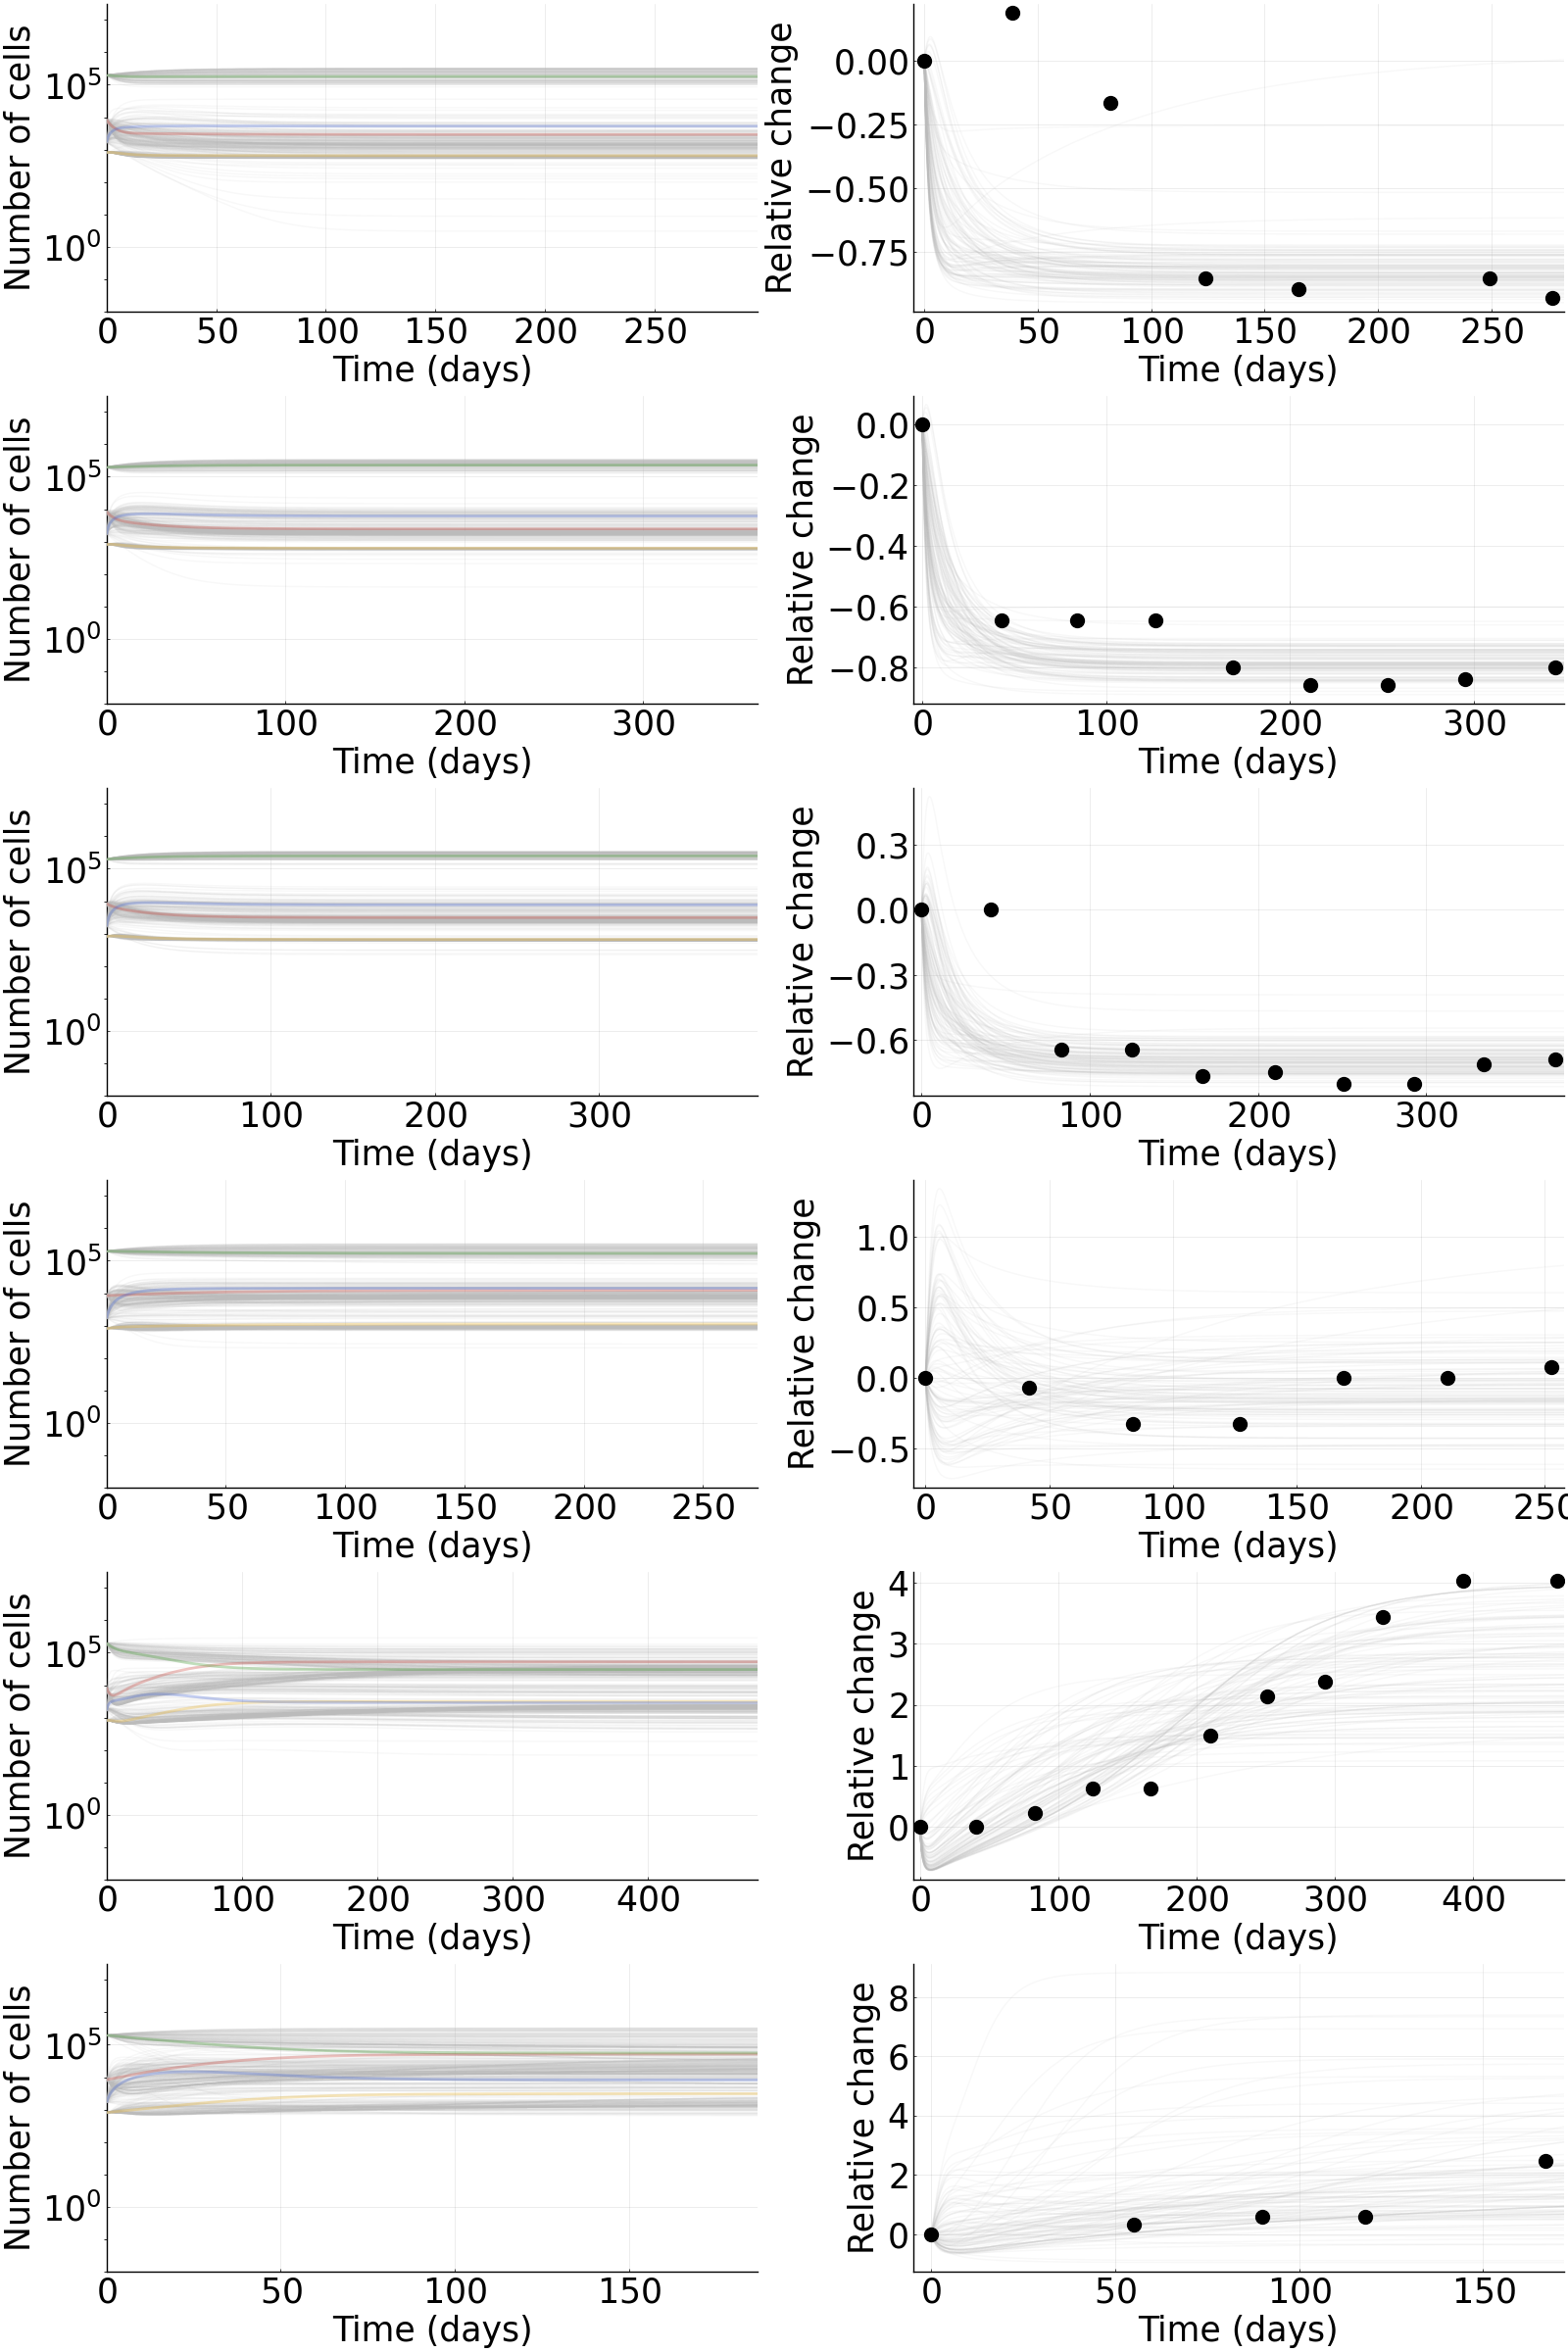

In [125]:
plot(a, b, c, d, e, f, g, h, i, j, k, l, layout = fig_layout, size =(1600,1200*2), plot_title ="", titlefontsize=25)

In [130]:
using DecisionTree
using JLD

In [131]:
chain_data = [chain_array1; chain_array2; chain_array5; chain_array6]

32000×4 Matrix{Float64}:
 1.82489e-5  1.68686e-6  0.244336  1.77781
 7.65434e-6  2.09193e-7  0.231019  1.21527
 7.58528e-6  1.74226e-6  0.291978  1.39485
 9.67143e-7  8.78992e-7  0.249382  0.973163
 1.02477e-5  1.26303e-6  0.172911  2.25416
 9.36574e-7  6.26205e-7  0.253868  1.74452
 4.93362e-5  1.49779e-6  0.175181  1.09725
 1.97573e-5  1.32163e-6  0.21126   0.945166
 7.91402e-5  4.85456e-7  0.130607  1.4024
 7.91402e-5  4.85456e-7  0.130607  1.4024
 6.71558e-5  1.43704e-7  0.163351  1.76774
 3.39088e-5  1.65149e-7  0.156448  1.67151
 4.49275e-5  9.62731e-8  0.17654   1.60098
 ⋮                                 
 2.44656e-5  4.63746e-7  0.406628  1.07385
 1.79377e-5  1.39112e-6  0.45366   0.485564
 1.3288e-5   1.73599e-6  0.417596  0.559032
 7.55792e-6  8.05313e-7  0.546553  1.64014
 2.94585e-5  1.07684e-6  0.452081  1.34377
 1.00133e-5  1.32244e-7  0.404895  1.12444
 1.13594e-5  1.29024e-7  0.431861  1.07564
 1.07629e-5  1.03202e-7  0.623142  0.654831
 2.28063e-5  1.78684e-7  0.815101

In [134]:
only_two = [chain_data[:,1] chain_data[:,3]]

32000×2 Matrix{Float64}:
 1.82489e-5  0.244336
 7.65434e-6  0.231019
 7.58528e-6  0.291978
 9.67143e-7  0.249382
 1.02477e-5  0.172911
 9.36574e-7  0.253868
 4.93362e-5  0.175181
 1.97573e-5  0.21126
 7.91402e-5  0.130607
 7.91402e-5  0.130607
 6.71558e-5  0.163351
 3.39088e-5  0.156448
 4.49275e-5  0.17654
 ⋮           
 2.44656e-5  0.406628
 1.79377e-5  0.45366
 1.3288e-5   0.417596
 7.55792e-6  0.546553
 2.94585e-5  0.452081
 1.00133e-5  0.404895
 1.13594e-5  0.431861
 1.07629e-5  0.623142
 2.28063e-5  0.815101
 2.90092e-5  0.695009
 1.21471e-5  0.676457
 2.30843e-5  0.74183

In [139]:
chain_classification = zeros(String,length(chain_data[:,1]))
for i = 1:16000
    chain_classification[i] = "decreasing"
end
for i = 16001:32000
    chain_classification[i] = "increasing"
end

In [426]:
#run decision tree on parameters from MCMC posteriors
features = float.(only_two)
labels   = string.(chain_classification)

32000-element Vector{String}:
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 "decreasing"
 ⋮
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"
 "increasing"

In [427]:
#train depth-truncated classifier
model = DecisionTreeClassifier(max_depth=3)

DecisionTreeClassifier
max_depth:                3
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  nothing
root:                     nothing

In [428]:
#fit model
fit!(model, features, labels)

DecisionTreeClassifier
max_depth:                3
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  ["decreasing", "increasing"]
root:                     Decision Tree
Leaves: 8
Depth:  3

In [429]:
#print tree
print_tree(model, 3)

Feature 1, Threshold 9.097876596023471e-5
L-> Feature 2, Threshold 0.3150686533879509
    L-> Feature 1, Threshold 3.446991695435108e-5
        L-> decreasing : 8310/8511
        R-> decreasing : 5399/9814
    R-> Feature 1, Threshold 8.871669583956129e-6
        L-> increasing : 635/777
        R-> increasing : 2778/2795
R-> Feature 2, Threshold 0.13730468665554976
    L-> Feature 1, Threshold 0.00012586278642703398
        L-> decreasing : 1332/1361
        R-> increasing : 4795/5585
    R-> Feature 2, Threshold 0.13903061565509256
        L-> increasing : 98/103
        R-> increasing : 3049/3054


In [353]:
#apply model
DecisionTree.predict(model, [2.30843e-5, 0.74183])

"increasing"

In [354]:
predict_proba(model, [2.30843e-5, 0.74183])

2-element Vector{Float64}:
 0.0
 1.0

In [355]:
println(get_classes(model)) 

["decreasing", "increasing"]


In [356]:
#run n-fold cross validation over 3 CV folds
using ScikitLearn.CrossValidation: cross_val_score
accuracy = cross_val_score(model, features, labels, cv=3)

3-element Vector{Float64}:
 0.9873453318335208
 0.9909056816051003
 0.9812488280517533